In [2]:
import os
import sys
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
pdf_file = "/home/workspace/src/log_file/pdf.csv"
gaussian_file = "/home/workspace/src/log_file/gaussian.csv"
joy_file = "/home/workspace/src/log_file/joy.csv"
vacuum_file = "/home/workspace/src/log_file/vacuum.csv"
desired_box_file = "/home/workspace/src/log_file/desired_box.csv"
intersection_length_file = "/home/workspace/src/log_file/intersection_length.csv"

# 헤더를 제외한 데이터 로드드
pdf = pd.read_csv(pdf_file).drop(
    columns=["field.header.seq", "field.header.stamp", "field.header.frame_id"]
)
gaussian = pd.read_csv(gaussian_file).drop(
    columns=[
        "field.header.seq",
        "field.header.stamp",
        "field.header.frame_id",
        "field.pose.pose.orientation.x",
        "field.pose.pose.orientation.y",
        "field.pose.pose.orientation.z",
    ]
)
joy = pd.read_csv(joy_file).drop(
    columns=[
        "field.header.seq",
        "field.header.stamp",
        "field.header.frame_id",
        "field.axes0",
        "field.axes1",
    ]
)
vacuum = pd.read_csv(vacuum_file)
desired_box = pd.read_csv(desired_box_file)
intersection_length = pd.read_csv(intersection_length_file)

# 시간 데이터를 datetime 형식으로 변환
pdf["%time"] = pd.to_datetime(pdf["%time"])
gaussian["%time"] = pd.to_datetime(gaussian["%time"])
joy["%time"] = pd.to_datetime(joy["%time"])
vacuum["%time"] = pd.to_datetime(vacuum["%time"])
desired_box["%time"] = pd.to_datetime(desired_box["%time"])
intersection_length["%time"] = pd.to_datetime(intersection_length["%time"])

# 병합 100ms, 10hz 기준으로 병합합
merged_data = pd.merge_asof(
    pdf, gaussian, on="%time", tolerance=pd.Timedelta("100ms"), direction="nearest"
)
merged_data = pd.merge_asof(
    merged_data, joy, on="%time", tolerance=pd.Timedelta("100ms"), direction="nearest"
)
merged_data = pd.merge_asof(
    merged_data,
    intersection_length,
    on="%time",
    tolerance=pd.Timedelta("100ms"),
    direction="nearest",
)
merged_data = pd.merge_asof(
    merged_data,
    vacuum,
    on="%time",
    tolerance=pd.Timedelta("100ms"),
    direction="nearest",
)
merged_data = pd.merge_asof(
    merged_data,
    desired_box,
    on="%time",
    tolerance=pd.Timedelta("100ms"),
    direction="nearest",
)


# 주기에 맞지 않는 데이터 보간
merged_data["field.buttons0"] = merged_data["field.buttons0"].fillna(method="ffill")
merged_data["field.buttons1"] = merged_data["field.buttons1"].fillna(method="ffill")
merged_data["field.buttons2"] = merged_data["field.buttons2"].fillna(method="ffill")
merged_data["field.buttons3"] = merged_data["field.buttons3"].fillna(method="ffill")
merged_data["intersection_length"] = merged_data["intersection_length"].fillna(
    method="ffill"
)
merged_data["desired_box"] = merged_data["desired_box"].fillna(method="ffill")


display(merged_data)

%time  field.boxes0.header.seq  \
0    2024-12-31 11:52:51.003780546                        0   
1    2024-12-31 11:52:51.104227519                        0   
2    2024-12-31 11:52:51.204465214                        0   
3    2024-12-31 11:52:51.304482702                        0   
4    2024-12-31 11:52:51.404660967                        0   
...                            ...                      ...   
9363 2024-12-31 12:08:27.304156579                        0   
9364 2024-12-31 12:08:27.404132828                        0   
9365 2024-12-31 12:08:27.505220187                        0   
9366 2024-12-31 12:08:27.604303127                        0   
9367 2024-12-31 12:08:27.703988456                        0   

      field.boxes0.header.stamp field.boxes0.header.frame_id  \
0           1735643777088230371                          map   
1           1735643777088230371                          map   
2           1735643777088230371                          map   
3           1735643777088230371                          map   
4           1735643777088230371                          map   
...                         ...                          ...   
9363        1735643777088230371                          map   
9364        1735643777088230371                          map   
9365        1735643777088230371                          map   
9366        1735643777088230371                          map   
9367        1735643777088230371                          map   

      field.boxes0.pose.position.x  field.boxes0.pose.position.y  \
0                         0.984745                     -0.222247   
1                         0.982757                     -0.221805   
2                         0.984863                     -0.222298   
3                         0.983173                     -0.221915   
4                         0.983481                     -0.221972   
...                            ...                           ...   
9363                      0.972480                     -0.218734   
9364                      0.972410                     -0.218682   
9365                      0.972536                     -0.218700   
9366                      0.972322                     -0.218681   
9367                      0.972639                     -0.218732   

      field.boxes0.pose.position.z  field.boxes0.pose.orientation.x  \
0                         0.019913                        -0.471831   
1                         0.020510                        -0.471137   
2                         0.019825                        -0.470910   
3                         0.020406                        -0.469397   
4                         0.020256                        -0.469496   
...                            ...                              ...   
9363                      0.024759                        -0.534040   
9364                      0.024753                        -0.534601   
9365                      0.024709                        -0.534042   
9366                      0.024853                        -0.537678   
9367                      0.024701                        -0.535539   

      field.boxes0.pose.orientation.y  field.boxes0.pose.orientation.z  ...  \
0                            0.762010                        -0.370181  ...   
1                            0.762398                        -0.371854  ...   
2                            0.761411                        -0.373030  ...   
3                            0.763831                        -0.371367  ...   
4                            0.763022                        -0.372552  ...   
...                               ...                              ...  ...   
9363                         0.730723                        -0.339435  ...   
9364                         0.730656                        -0.338843  ...   
9365                         0.730815                        -0.339263  ...   
9366                         0.728547      

In [4]:
# 인덱스 사이 구간을 가지는 데이터프레임으로 분할 (예외 처리 포함)
def split_dataframe_by_indices(df, indices):
    split_dataframes = []

    # 1. 첫 번째 구간: 처음부터 첫 번째 인덱스 이전까지
    if indices[0] > 0:
        split_dataframes.append(df.loc[: indices[0] - 1])

    # 2. 중간 구간: 각 인덱스 사이
    for start, end in zip(indices, indices[1:]):
        if start + 1 < end:  # 인덱스가 붙어 있지 않은 경우만 추가
            split_dataframes.append(df.loc[start + 1 : end - 1])

    # 3. 마지막 구간: 마지막 인덱스 이후부터 끝까지
    if indices[-1] < len(df) - 1:
        split_dataframes.append(df.loc[indices[-1] + 1 :])

    return split_dataframes

In [5]:
merged_data["desired_box"] = merged_data["desired_box"].astype(int)
merged_data["intersection_length"] = merged_data["intersection_length"].astype(int)
merged_data["field.buttons0"] = merged_data["field.buttons0"].astype(int)
merged_data["field.buttons1"] = merged_data["field.buttons1"].astype(int)
merged_data["field.buttons2"] = merged_data["field.buttons2"].astype(int)
merged_data["field.buttons3"] = merged_data["field.buttons3"].astype(int)

# 잡으려는 박스의 번호
desired_box_values = sorted(merged_data["desired_box"].unique().astype(int).tolist())[
    1:
]


tasks = {}

for desired_box in desired_box_values:
    tasks[str(desired_box)] = merged_data[merged_data["desired_box"] == desired_box]


for key, task in tasks.items():

    # 타겟 박스 번호 추출
    target_id = int(key)

    # 시간 순으로 정렬
    task = task.sort_values(by="%time")

    # Vacuum Off 인덱스 추출 및 슬라이싱
    indices = task.index[task["field.buttons1"] == 1].tolist()
    split_dataframes = split_dataframe_by_indices(task, indices)

    for i, splited_df in enumerate(split_dataframes):
        # A 버튼 누른 인덱스 조회
        a_indices = splited_df.index[splited_df["field.buttons0"] == 1].tolist()

        # A 버튼 누른 인덱스가 있으면, 가장 마지막에 누른 이후 데이터만 취급함함
        if len(a_indices) != 0:
            splited_df = splited_df.loc[a_indices[-1] + 1 :]

        # 교차점이 없는 데이터는 제외
        splited_df = splited_df[splited_df["intersection_length"] > 0]

        if splited_df.shape[0] < 20:
            print(f"Box {target_id} has no intersection data.")
            continue

        # 시간을 0부터 시작하는 초단위로 변경
        splited_df["%time"] = splited_df["%time"] - splited_df["%time"].iloc[0]
        splited_df["%time"] = splited_df["%time"].dt.total_seconds()

        vacuum_trigger = splited_df.index[splited_df["vacuum"] == "on"].tolist()
        trigger_times = splited_df.loc[vacuum_trigger, "%time"].tolist()

        # 정규화 수행 (각 필드 값을 그 행의 모든 .pdf 값의 합으로 나눔)
        pdf_columns = [
            f"field.boxes{i}.pdf" for i in range(9)
        ]  # field.boxes0.pdf ~ field.boxes8.pdf

        # 존재하는 필드만 필터링
        pdf_columns = [col for col in pdf_columns if col in splited_df.columns]

        df_sum = splited_df[pdf_columns].sum(axis=1)  # 각 행의 .pdf 값 합

        for col in pdf_columns:
            splited_df[col] = splited_df[col] / df_sum

        plot = False
        export = False

        if export:
            # 데이터 저장
            splited_df.to_csv(
                f"/home/workspace/src/log_file/post_processed/box{target_id}_data{i}.csv",
                index=False,
                encoding="utf-8",
            )

        if plot:
            display(splited_df.info())

            # 그래프 그리기
            plt.figure(figsize=(10, 10))

            # 각 박스의 PDF 그래프 그리기
            for i in range(len(desired_box_values)):
                box_id = splited_df[f"field.boxes{i}.id"].iloc[0]
                plt.plot(
                    splited_df["%time"].to_numpy(),
                    splited_df[f"field.boxes{i}.pdf"].to_numpy(),
                    label=f"box{box_id}",
                    c="r" if box_id == target_id else None,
                )

            # 수직선 추가
            plt.axvline(
                x=trigger_times[-1], color="red", linestyle="--", label="Vacuum Trigger"
            )

            plt.legend()

            plt.xlim(-0.1, 10.0)
            plt.ylim(-0.1, 1.1)

            plt.xlabel("Time (s)")
            plt.ylabel("PDF")

            plt.title(f"PDF of Boxes. Target: {target_id}")

            plt.grid()
            plt.show()

        # break
    # break

Box 17 has no intersection data.
Box 122 has no intersection data.


/tmp/ipykernel_43491/3564637438.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  splited_df["%time"] = splited_df["%time"] - splited_df["%time"].iloc[0]
/tmp/ipykernel_43491/3564637438.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  splited_df["%time"] = splited_df["%time"].dt.total_seconds()
/tmp/ipykernel_43491/3564637438.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

/home/workspace/src/log_file/post_processed/box121_data0.csv


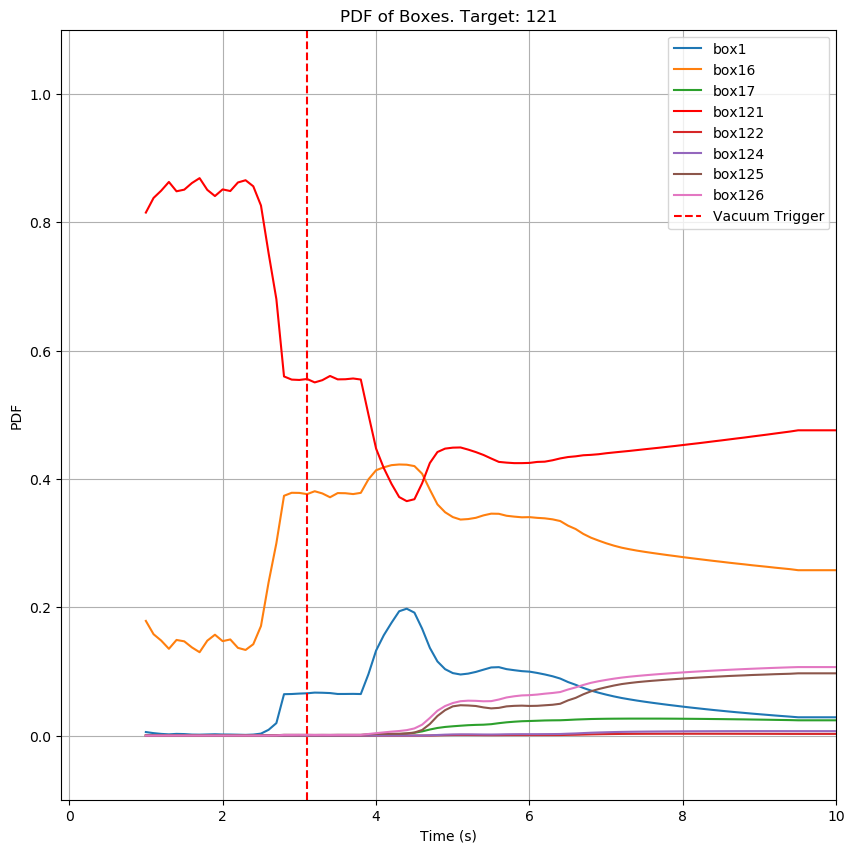

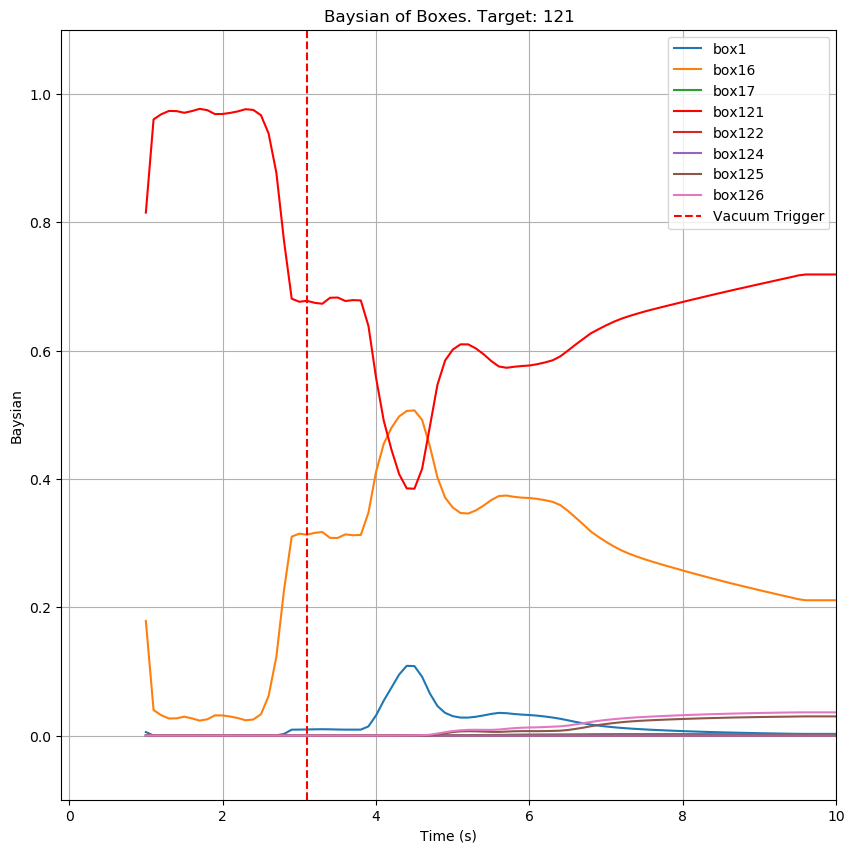

baysian0  baysian1      baysian2  baysian3      baysian4      baysian5  \
10   0.005458  0.178673  2.831337e-07  0.815030  5.055539e-08  6.981644e-09   
11   0.000029  0.039673  3.870122e-14  0.960297  4.992404e-16  1.304464e-17   
12   0.000013  0.031823  4.015861e-15  0.968164  1.955722e-17  5.924995e-19   
13   0.000006  0.026605  3.683292e-16  0.973389  1.550444e-18  3.627985e-20   
14   0.000006  0.026792  2.155133e-16  0.973202  7.236190e-19  1.110735e-20   
..        ...       ...           ...       ...           ...           ...   
107  0.002574  0.210852  1.793335e-03  0.718579  2.132036e-05  1.499647e-04   
108  0.002574  0.210852  1.793335e-03  0.718579  2.132036e-05  1.499647e-04   
109  0.002574  0.210852  1.793335e-03  0.718579  2.132036e-05  1.499647e-04   
110  0.002574  0.210852  1.793335e-03  0.718579  2.132036e-05  1.499647e-04   
111  0.002574  0.210852  1.793335e-03  0.718579  2.132036e-05  1.499647e-04   

         baysian6      baysian7      baysian8  
10   7.484825e-04  9.050714e-05  7.717046e-13  
11   4.433710e-07  6.187601e-09  6.849844e-26  
12   1.244515e-07  1.751210e-09  7.393077e-28  
13   4.280561e-08  4.428643e-10  1.217966e-29  
14   3.364812e-08  3.046746e-10  3.786915e-30  
..            ...           ...           ...  
107  2.986850e-02  3.615751e-02  4.492793e-06  
108  2.986850e-02  3.615751e-02  4.492793e-06  
109  2.986850e-02  3.615751e-02  4.492793e-06  
110  2.986850e-02  3.615751e-02  4.492793e-06  
111  2.986850e-02  3.615751e-02  4.492793e-06  

[102 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10           0.005458          0.178673      2.831337e-07          0.815030   
11           0.003775          0.157899      9.720091e-08          0.837856   
12           0.002583          0.148092      3.035837e-08          0.849082   
13           0.001868          0.135202      9.130940e-09          0.862769   
14           0.002595          0.149008      1.774814e-08          0.848208   
..                ...               ...               ...               ...   
107          0.028470          0.257693      2.376532e-02          0.475719   
108          0.028470          0.257693      2.376532e-02          0.475719   
109          0.028470          0.257693      2.376532e-02          0.475719   
110          0.028470          0.257693      2.376532e-02          0.475719   
111          0.028470          0.257693      2.376532e-02          0.475719   

     field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10       5.055539e-08      6.981644e-09          0.000748          0.000091   
11       7.022301e-09      1.328653e-09          0.000421          0.000049   
12       2.046434e-09      3.276774e-10          0.000217          0.000026   
13       5.701854e-10      8.332528e-11          0.000148          0.000013   
14       9.543070e-10      1.002369e-10          0.000171          0.000018   
..                ...               ...               ...               ...   
107      2.591256e-03      6.872384e-03          0.096988          0.106712   
108      2.591256e-03      6.872384e-03          0.096988          0.106712   
109      2.591256e-03      6.872384e-03          0.096988          0.106712   
110      2.591256e-03      6.872384e-03          0.096988          0.106712   
111      2.591256e-03      6.872384e-03          0.096988          0.106712   

     field.boxes8.pdf  
10       7.717046e-13  
11       6.311998e-14  
12       8.606539e-15  
13       1.065036e-15  
14       2.673717e-15  
..                ...  
107      1.189518e-03  
108      1.189518e-03  
109      1.189518e-03  
110      1.189518e-03  
111      1.189518e-03  

[102 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box121_data1.csv


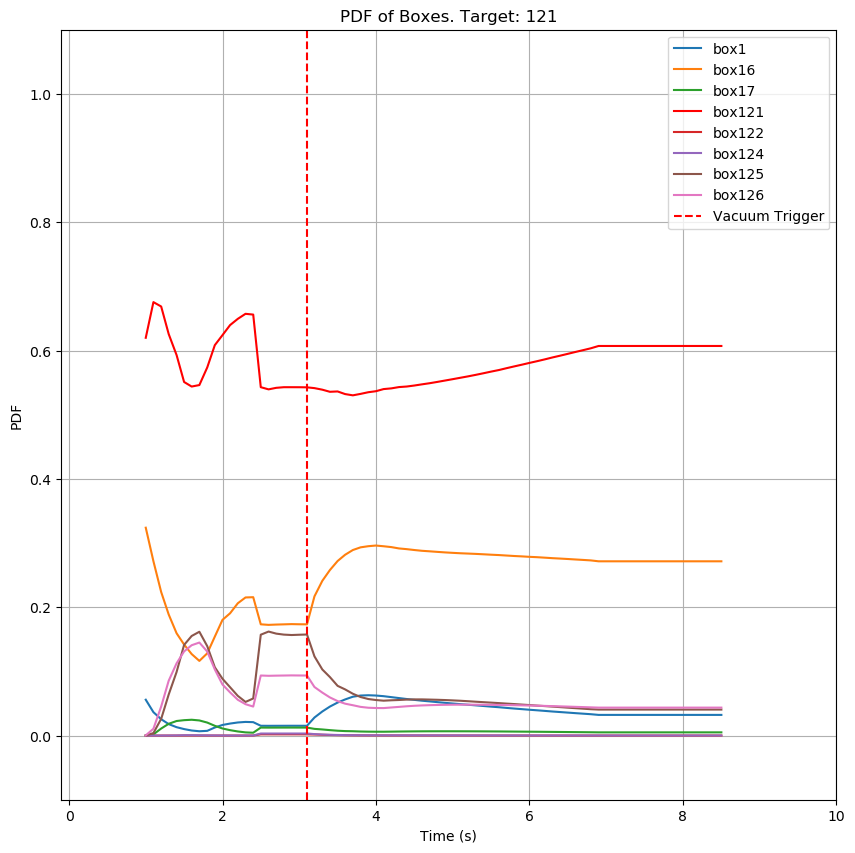

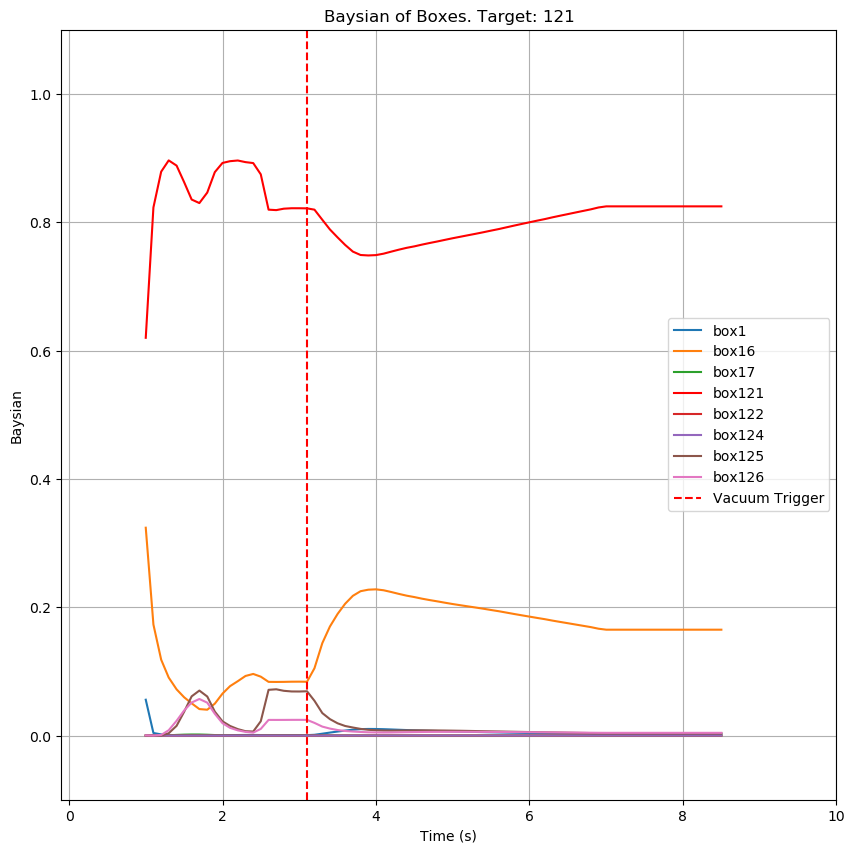

baysian0  baysian1      baysian2  baysian3      baysian4      baysian5  \
10  0.055843  0.323927  1.877710e-05  0.619880  9.787573e-16  3.035586e-13   
11  0.003999  0.172994  6.783978e-08  0.823000  1.707411e-24  2.560249e-20   
12  0.001807  0.118253  3.909816e-05  0.878768  5.440166e-16  5.470563e-13   
13  0.000974  0.090423  4.285189e-04  0.896333  3.531179e-12  8.995677e-10   
14  0.000557  0.072012  9.931836e-04  0.888235  2.295906e-10  2.688100e-08   
..       ...       ...           ...       ...           ...           ...   
81  0.002318  0.164992  5.579892e-05  0.824724  4.509957e-10  9.710061e-09   
82  0.002318  0.164992  5.579892e-05  0.824724  4.509957e-10  9.710061e-09   
83  0.002318  0.164992  5.579892e-05  0.824724  4.509957e-10  9.710061e-09   
84  0.002318  0.164992  5.579892e-05  0.824724  4.509957e-10  9.710061e-09   
85  0.002318  0.164992  5.579892e-05  0.824724  4.509957e-10  9.710061e-09   

        baysian6  baysian7      baysian8  
10  4.265892e-05  0.000288  2.180111e-17  
11  3.279168e-07  0.000006  5.708708e-27  
12  1.977373e-04  0.000935  2.467376e-17  
13  3.560239e-03  0.008282  3.432608e-13  
14  1.517154e-02  0.023031  2.265126e-11  
..           ...       ...           ...  
81  3.668880e-03  0.004241  2.707652e-12  
82  3.668880e-03  0.004241  2.707652e-12  
83  3.668880e-03  0.004241  2.707652e-12  
84  3.668880e-03  0.004241  2.707652e-12  
85  3.668880e-03  0.004241  2.707652e-12  

[76 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10          0.055843          0.323927          0.000019          0.619880   
11          0.036437          0.271709          0.001838          0.675479   
12          0.025482          0.223691          0.010933          0.668655   
13          0.017839          0.188687          0.018296          0.625719   
14          0.013046          0.159419          0.022675          0.592962   
..               ...               ...               ...               ...   
81          0.032187          0.271561          0.004994          0.607142   
82          0.032187          0.271561          0.004994          0.607142   
83          0.032187          0.271561          0.004994          0.607142   
84          0.032187          0.271561          0.004994          0.607142   
85          0.032187          0.271561          0.004994          0.607142   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      9.787573e-16      3.035586e-13          0.000043          0.000288   
11      8.875298e-10      4.291009e-08          0.003911          0.010626   
12      3.150426e-07      6.552585e-06          0.025987          0.045245   
13      5.231940e-06      6.408162e-05          0.063949          0.085438   
14      1.833030e-05      1.752226e-04          0.099100          0.112599   
..               ...               ...               ...               ...   
81      1.419782e-05      6.587894e-05          0.040495          0.043540   
82      1.419782e-05      6.587894e-05          0.040495          0.043540   
83      1.419782e-05      6.587894e-05          0.040495          0.043540   
84      1.419782e-05      6.587894e-05          0.040495          0.043540   
85      1.419782e-05      6.587894e-05          0.040495          0.043540   

    field.boxes8.pdf  
10      2.180111e-17  
11      1.332229e-10  
12      9.519111e-08  
13      1.683217e-06  
14      5.621218e-06  
..               ...  
81      1.100100e-06  
82      1.100100e-06  
83      1.100100e-06  
84      1.100100e-06  
85      1.100100e-06  

[76 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box121_data2.csv


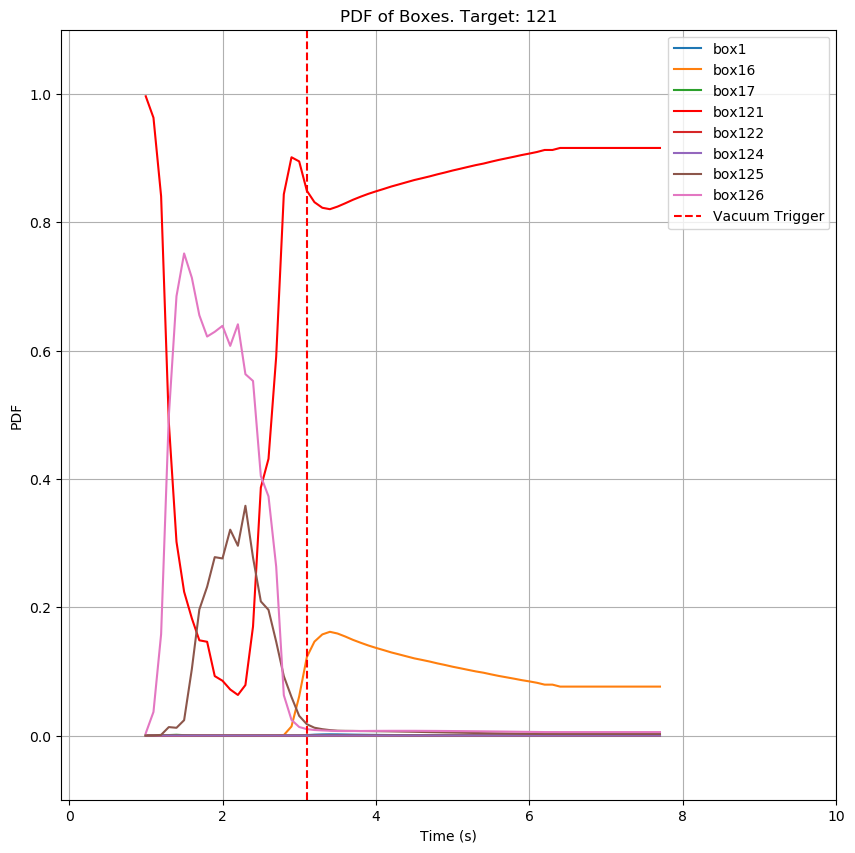

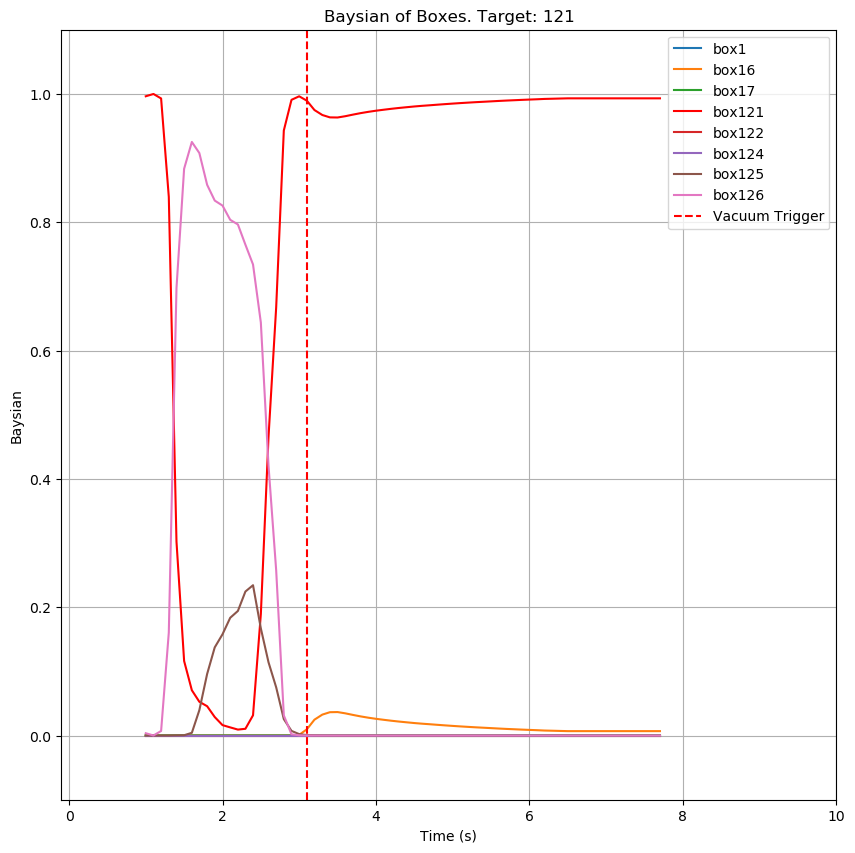

baysian0      baysian1      baysian2  baysian3      baysian4  \
10  4.274647e-16  3.030940e-05  3.644844e-05  0.996297  1.378183e-30   
11  1.493173e-32  4.782691e-10  6.667208e-09  0.999861  9.858394e-56   
12  7.249421e-35  1.165572e-10  1.178893e-07  0.992873  1.939261e-48   
13  3.458868e-37  1.896964e-11  8.529070e-07  0.839481  4.574893e-42   
14  9.144837e-40  5.540162e-13  1.866748e-06  0.302201  1.990477e-39   
..           ...           ...           ...       ...           ...   
73  9.445308e-09  6.890779e-03  3.478371e-09  0.993068  2.273488e-22   
74  9.445308e-09  6.890779e-03  3.478371e-09  0.993068  2.273488e-22   
75  9.445308e-09  6.890779e-03  3.478371e-09  0.993068  2.273488e-22   
76  9.445308e-09  6.890779e-03  3.478371e-09  0.993068  2.273488e-22   
77  9.445308e-09  6.890779e-03  3.478371e-09  0.993068  2.273488e-22   

        baysian5      baysian6  baysian7      baysian8  
10  9.681627e-19  1.917053e-06  0.003635  4.221357e-20  
11  3.336389e-32  2.190086e-10  0.000139  1.229895e-34  
12  2.022939e-25  1.384533e-07  0.007127  3.992985e-27  
13  2.925983e-20  2.779188e-05  0.160490  4.721515e-21  
14  1.302760e-17  3.272048e-04  0.697470  1.617128e-17  
..           ...           ...       ...           ...  
73  1.188770e-17  6.970708e-06  0.000035  5.942915e-25  
74  1.188770e-17  6.970708e-06  0.000035  5.942915e-25  
75  1.188770e-17  6.970708e-06  0.000035  5.942915e-25  
76  1.188770e-17  6.970708e-06  0.000035  5.942915e-25  
77  1.188770e-17  6.970708e-06  0.000035  5.942915e-25  

[68 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      4.274647e-16      3.030940e-05          0.000036          0.996297   
11      3.351490e-17      1.513991e-05          0.000176          0.962895   
12      1.763280e-18      6.275838e-06          0.000548          0.840564   
13      9.597055e-20      1.478811e-06          0.000762          0.488614   
14      4.652967e-21      1.829371e-07          0.001196          0.302010   
..               ...               ...               ...               ...   
73      8.930796e-05      7.628099e-02          0.000054          0.915739   
74      8.930796e-05      7.628099e-02          0.000054          0.915739   
75      8.930796e-05      7.628099e-02          0.000054          0.915739   
76      8.930796e-05      7.628099e-02          0.000054          0.915739   
77      8.930796e-05      7.628099e-02          0.000054          0.915739   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      1.378183e-30      9.681627e-19          0.000002          0.003635   
11      6.863212e-26      3.306409e-14          0.000110          0.036804   
12      2.303376e-23      4.987492e-12          0.001030          0.157853   
13      9.717204e-20      2.870218e-09          0.013205          0.497418   
14      1.000248e-20      2.216366e-09          0.012100          0.684694   
..               ...               ...               ...               ...   
73      1.385570e-11      3.168335e-09          0.002426          0.005411   
74      1.385570e-11      3.168335e-09          0.002426          0.005411   
75      1.385570e-11      3.168335e-09          0.002426          0.005411   
76      1.385570e-11      3.168335e-09          0.002426          0.005411   
77      1.385570e-11      3.168335e-09          0.002426          0.005411   

    field.boxes8.pdf  
10      4.221357e-20  
11      2.795402e-15  
12      1.164419e-12  
13      1.983797e-09  
14      3.980513e-09  
..               ...  
73      7.084054e-13  
74      7.084054e-13  
75      7.084054e-13  
76      7.084054e-13  
77      7.084054e-13  

[68 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box121_data3.csv


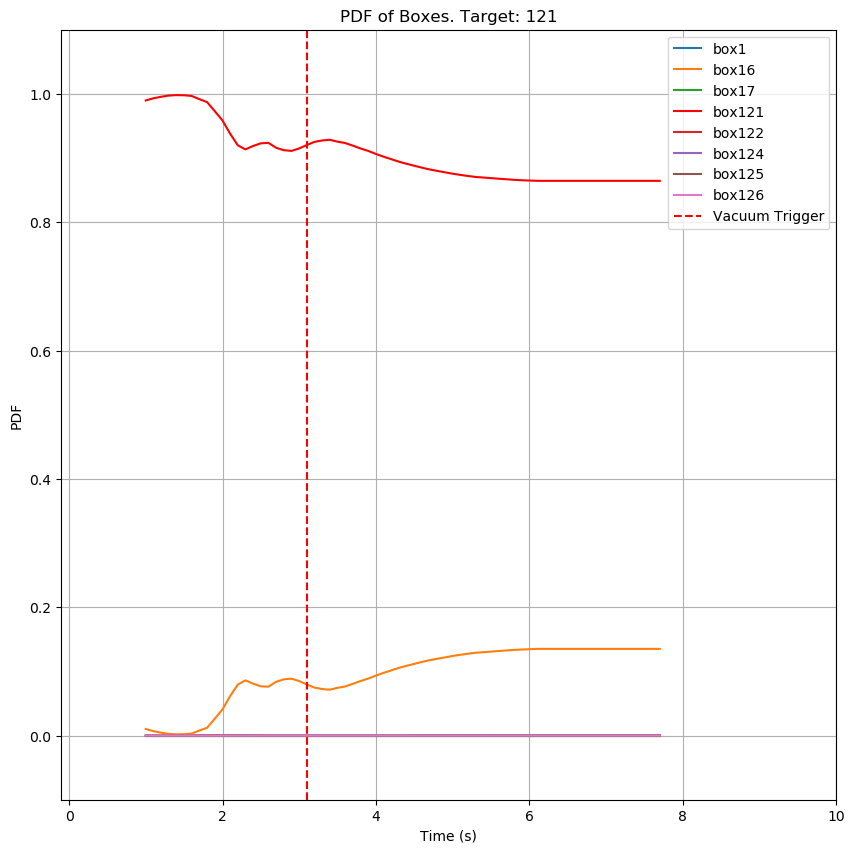

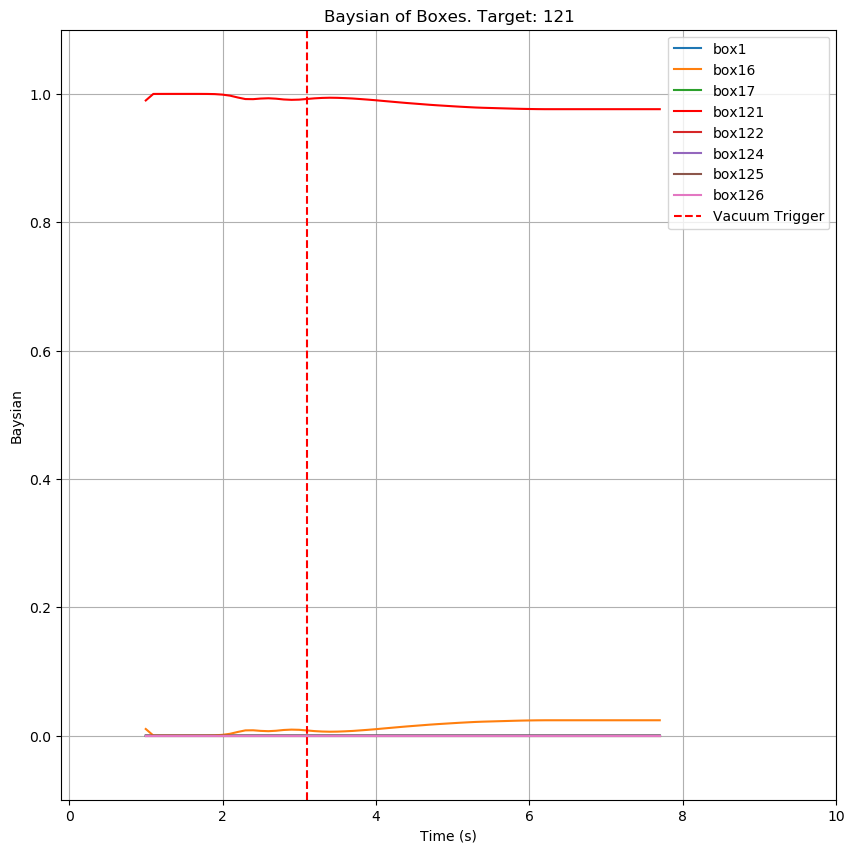

baysian0  baysian1      baysian2  baysian3      baysian4  \
10  1.859584e-07  0.010243  2.638698e-20  0.989757  2.929252e-24   
11  9.141626e-15  0.000072  8.854529e-39  0.999928  4.799699e-43   
12  7.240552e-16  0.000031  6.748834e-37  0.999969  1.460053e-35   
13  5.632586e-17  0.000012  9.123463e-37  0.999988  2.308321e-31   
14  3.748170e-18  0.000005  3.127133e-38  0.999995  7.744581e-30   
..           ...       ...           ...       ...           ...   
73  2.675121e-07  0.023830  4.544469e-29  0.976169  2.777132e-42   
74  2.675121e-07  0.023830  4.544469e-29  0.976169  2.777132e-42   
75  2.675121e-07  0.023830  4.544469e-29  0.976169  2.777132e-42   
76  2.675121e-07  0.023830  4.544469e-29  0.976169  2.777132e-42   
77  2.675121e-07  0.023830  4.544469e-29  0.976169  2.777132e-42   

        baysian5      baysian6      baysian7      baysian8  
10  7.906915e-28  3.753667e-08  3.160666e-11  1.000000e-10  
11  1.786736e-50  3.553191e-14  1.552556e-20  3.640520e-49  
12  9.914479e-44  6.438049e-12  9.014500e-19  1.129450e-74  
13  1.059633e-40  8.064893e-11  1.647386e-18  2.825770e-71  
14  2.676633e-40  1.308773e-10  3.880948e-19  9.359012e-72  
..           ...           ...           ...           ...  
73  3.061912e-46  5.682907e-12  2.344851e-15  1.352609e-76  
74  3.061912e-46  5.682907e-12  2.344851e-15  1.352609e-76  
75  3.061912e-46  5.682907e-12  2.344851e-15  1.352609e-76  
76  3.061912e-46  5.682907e-12  2.344851e-15  1.352609e-76  
77  3.061912e-46  5.682907e-12  2.344851e-15  1.352609e-76  

[68 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      1.859584e-07          0.010243      2.638698e-20          0.989757   
11      4.832322e-08          0.006909      3.298557e-19          0.993090   
12      1.481360e-08          0.004490      2.022785e-18          0.995504   
13      3.775327e-09          0.002611      4.478345e-19          0.997377   
14      9.883238e-10          0.001891      6.951259e-20          0.998097   
..               ...               ...               ...               ...   
73      4.525454e-04          0.135069      5.898370e-15          0.864476   
74      4.525454e-04          0.135069      5.898370e-15          0.864476   
75      4.525454e-04          0.135069      5.898370e-15          0.864476   
76      4.525454e-04          0.135069      5.898370e-15          0.864476   
77      4.525454e-04          0.135069      5.898370e-15          0.864476   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      2.929252e-24      7.906915e-28      3.753667e-08      3.160666e-11   
11      1.610666e-19      2.221271e-23      9.304885e-07      4.828553e-10   
12      8.962059e-17      4.412790e-21      6.840504e-06      1.845736e-09   
13      2.557384e-15      2.384239e-20      1.170625e-05      8.862030e-10   
14      3.014648e-15      1.117567e-20      1.112963e-05      4.359525e-10   
..               ...               ...               ...               ...   
73      1.458105e-21      1.531041e-23      2.085815e-06      4.236899e-08   
74      1.458105e-21      1.531041e-23      2.085815e-06      4.236899e-08   
75      1.458105e-21      1.531041e-23      2.085815e-06      4.236899e-08   
76      1.458105e-21      1.531041e-23      2.085815e-06      4.236899e-08   
77      1.458105e-21      1.531041e-23      2.085815e-06      4.236899e-08   

    field.boxes8.pdf  
10      1.000000e-10  
11      3.578588e-39  
12      3.120327e-36  
13      8.991750e-36  
14      1.036145e-36  
..               ...  
73      1.017599e-38  
74      1.017599e-38  
75      1.017599e-38  
76      1.017599e-38  
77      1.017599e-38  

[68 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box121_data4.csv


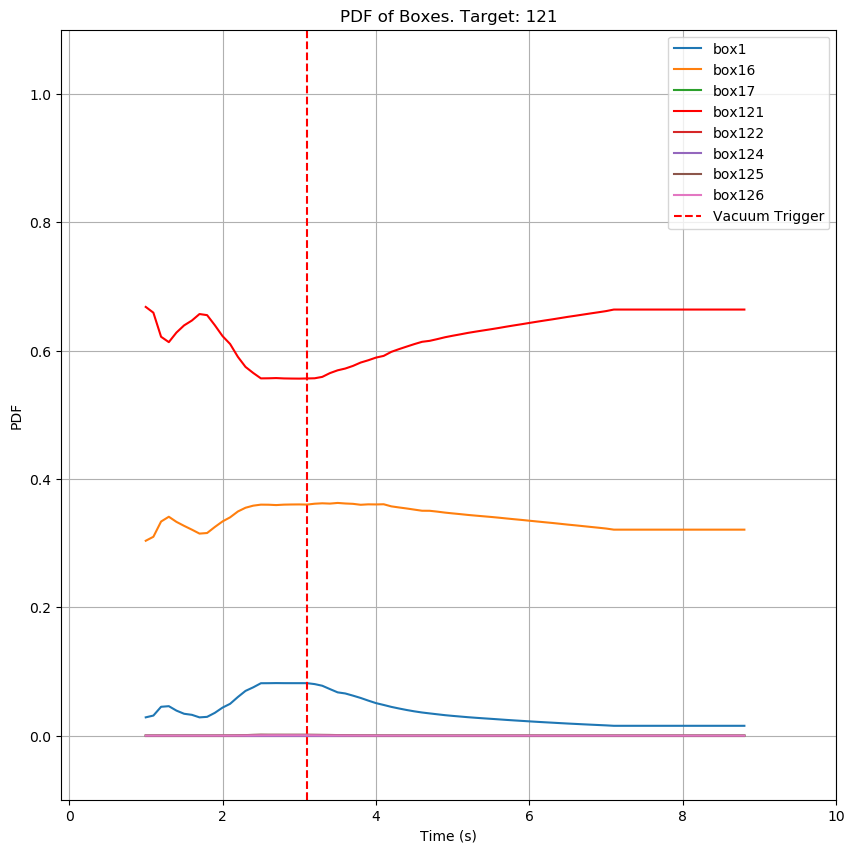

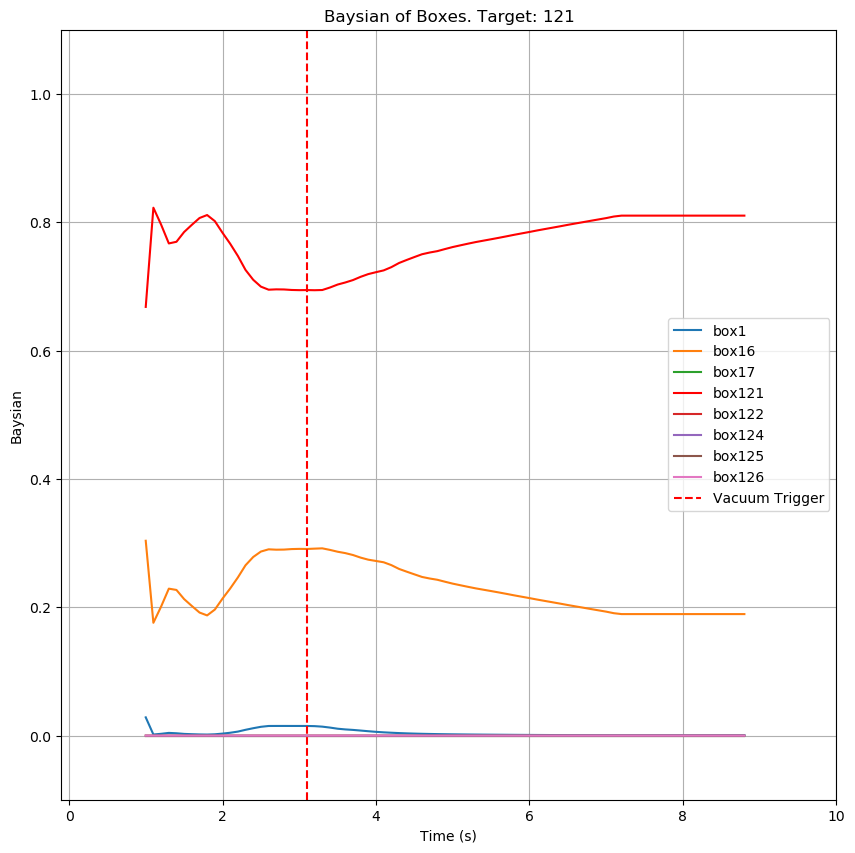

baysian0  baysian1      baysian2  baysian3      baysian4      baysian5  \
10  0.028374  0.303574  7.731115e-10  0.668007  3.175240e-14  4.471380e-15   
11  0.001651  0.175732  1.334647e-18  0.822616  3.313860e-27  2.576382e-29   
12  0.002716  0.200925  6.851024e-18  0.796359  3.069115e-26  1.998874e-28   
13  0.004133  0.228940  2.586045e-17  0.766927  8.538938e-26  1.234634e-27   
14  0.003557  0.226919  4.975856e-18  0.769524  5.359175e-27  6.378201e-29   
..       ...       ...           ...       ...           ...           ...   
84  0.000425  0.189301  1.103260e-23  0.810274  9.801205e-39  8.840710e-40   
85  0.000425  0.189301  1.103260e-23  0.810274  9.801205e-39  8.840710e-40   
86  0.000425  0.189301  1.103260e-23  0.810274  9.801205e-39  8.840710e-40   
87  0.000425  0.189301  1.103260e-23  0.810274  9.801205e-39  8.840710e-40   
88  0.000425  0.189301  1.103260e-23  0.810274  9.801205e-39  8.840710e-40   

        baysian6      baysian7      baysian8  
10  4.077420e-05  3.899159e-06  1.689172e-23  
11  3.478931e-09  4.476503e-11  4.493799e-46  
12  8.471332e-09  2.059113e-10  1.832097e-44  
13  1.438451e-08  4.502094e-10  1.898317e-43  
14  6.811646e-09  1.472075e-10  1.127284e-45  
..           ...           ...           ...  
84  3.231900e-11  2.320334e-13  5.932318e-65  
85  3.231900e-11  2.320334e-13  5.932318e-65  
86  3.231900e-11  2.320334e-13  5.932318e-65  
87  3.231900e-11  2.320334e-13  5.932318e-65  
88  3.231900e-11  2.320334e-13  5.932318e-65  

[79 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10          0.028374          0.303574      7.731115e-10          0.668007   
11          0.031144          0.309789      9.238536e-10          0.659015   
12          0.044846          0.333565      3.813851e-09          0.621477   
13          0.045787          0.341003      3.368912e-09          0.613122   
14          0.038871          0.333003      7.391180e-10          0.628075   
..               ...               ...               ...               ...   
84          0.015202          0.320895      2.449768e-12          0.663899   
85          0.015202          0.320895      2.449768e-12          0.663899   
86          0.015202          0.320895      2.449768e-12          0.663899   
87          0.015202          0.320895      2.449768e-12          0.663899   
88          0.015202          0.320895      2.449768e-12          0.663899   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      3.175240e-14      4.471380e-15          0.000041      3.899159e-06   
11      5.585173e-14      3.083526e-15          0.000046      6.143939e-06   
12      2.826103e-13      3.333874e-14          0.000095      1.723633e-05   
13      1.501182e-13      1.839951e-14          0.000075      1.297738e-05   
14      1.786489e-14      1.734713e-15          0.000046      5.676469e-06   
..               ...               ...               ...               ...   
84      7.301731e-20      2.192955e-20          0.000004      3.552723e-07   
85      7.301731e-20      2.192955e-20          0.000004      3.552723e-07   
86      7.301731e-20      2.192955e-20          0.000004      3.552723e-07   
87      7.301731e-20      2.192955e-20          0.000004      3.552723e-07   
88      7.301731e-20      2.192955e-20          0.000004      3.552723e-07   

    field.boxes8.pdf  
10      1.689172e-23  
11      1.423701e-23  
12      6.618220e-22  
13      1.425098e-22  
14      3.958441e-24  
..               ...  
84      5.680653e-33  
85      5.680653e-33  
86      5.680653e-33  
87      5.680653e-33  
88      5.680653e-33  

[79 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box122_data0.csv


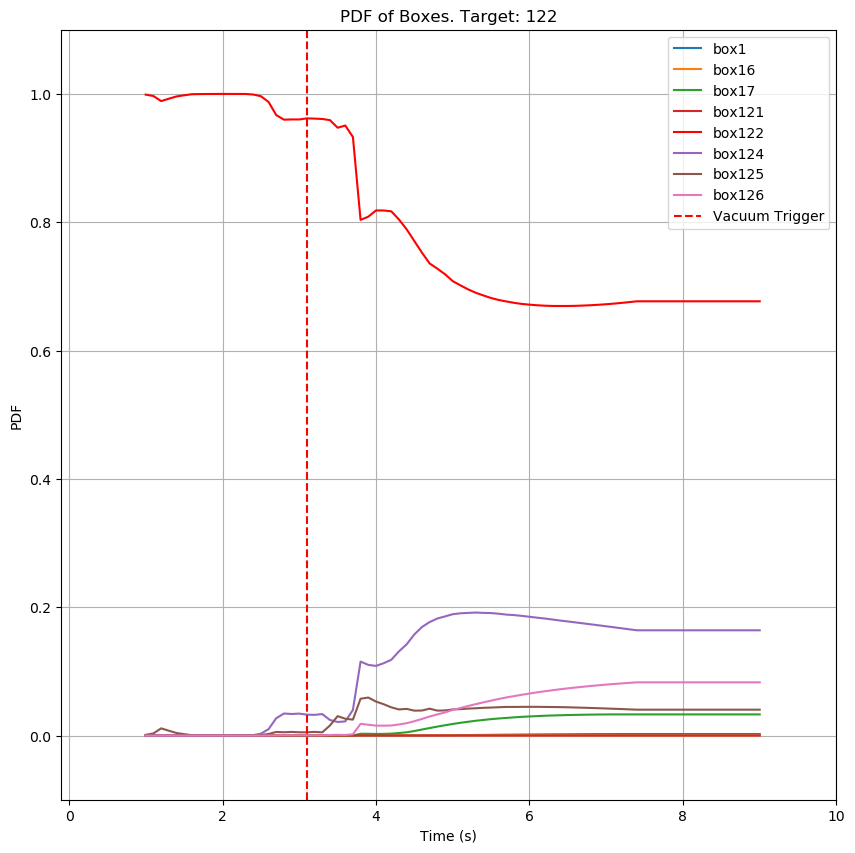

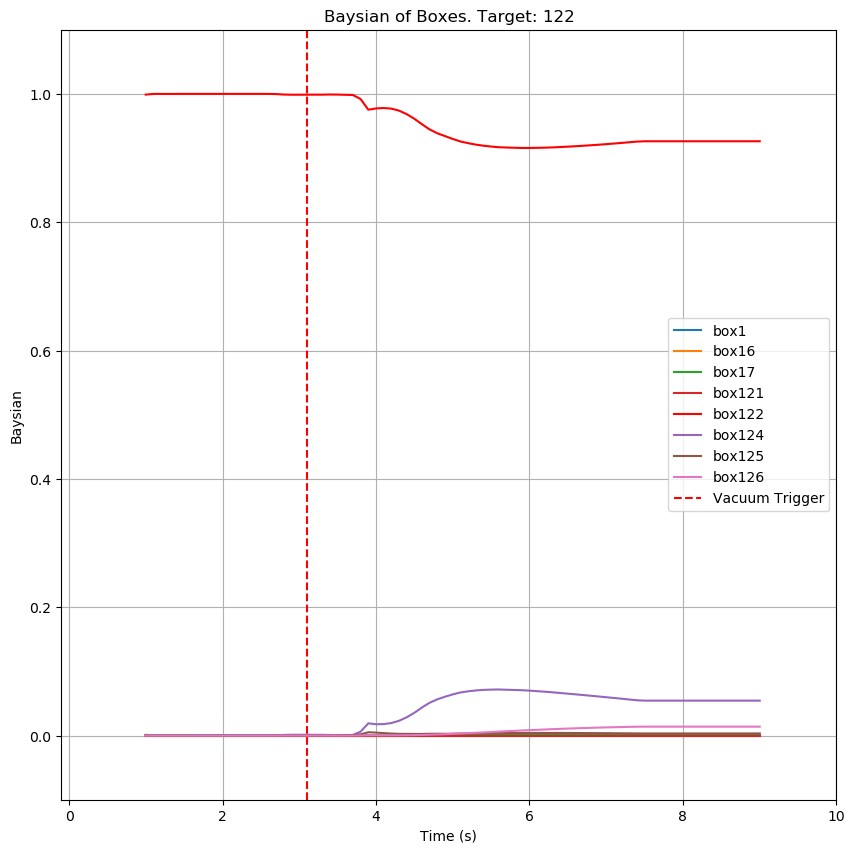

baysian0      baysian1      baysian2      baysian3  baysian4  \
10  2.291686e-26  1.669598e-14  3.847251e-20  9.453485e-09  0.998874   
11  7.671875e-52  2.001965e-27  1.369314e-40  6.234805e-16  0.999996   
12  3.632028e-48  7.965518e-25  4.022701e-40  7.432780e-14  0.999962   
13  3.059314e-47  1.312110e-23  6.560011e-40  5.167868e-13  0.999914   
14  6.813831e-50  4.421779e-25  5.673867e-41  3.972208e-14  0.999970   
..           ...           ...           ...           ...       ...   
86  1.156385e-05  1.451581e-07  2.196576e-03  6.337034e-10  0.926183   
87  1.156385e-05  1.451581e-07  2.196576e-03  6.337034e-10  0.926183   
88  1.156385e-05  1.451581e-07  2.196576e-03  6.337034e-10  0.926183   
89  1.156385e-05  1.451581e-07  2.196576e-03  6.337034e-10  0.926183   
90  1.156385e-05  1.451581e-07  2.196576e-03  6.337034e-10  0.926183   

        baysian5  baysian6      baysian7      baysian8  
10  1.023148e-07  0.001126  1.793900e-10  2.495016e-17  
11  5.709047e-15  0.000004  3.615010e-20  1.119982e-35  
12  8.340180e-15  0.000038  7.216127e-19  4.147397e-37  
13  1.036787e-14  0.000086  2.622618e-18  6.352462e-37  
14  5.353487e-15  0.000030  1.851846e-19  4.052432e-37  
..           ...       ...           ...           ...  
86  5.441246e-02  0.003292  1.390452e-02  1.798379e-07  
87  5.441246e-02  0.003292  1.390452e-02  1.798379e-07  
88  5.441246e-02  0.003292  1.390452e-02  1.798379e-07  
89  5.441246e-02  0.003292  1.390452e-02  1.798379e-07  
90  5.441246e-02  0.003292  1.390452e-02  1.798379e-07  

[81 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      2.291686e-26      1.669598e-14      3.847251e-20      9.453485e-09   
11      3.332761e-26      1.193720e-13      3.543319e-21      6.565817e-08   
12      1.073978e-22      6.576000e-12      1.118814e-19      1.115611e-06   
13      2.795682e-25      1.958248e-12      5.754478e-21      4.546296e-07   
14      2.409455e-25      2.232259e-13      9.747393e-21      8.637529e-08   
..               ...               ...               ...               ...   
86      2.391328e-03      2.679221e-04      3.295802e-02      1.770235e-05   
87      2.391328e-03      2.679221e-04      3.295802e-02      1.770235e-05   
88      2.391328e-03      2.679221e-04      3.295802e-02      1.770235e-05   
89      2.391328e-03      2.679221e-04      3.295802e-02      1.770235e-05   
90      2.391328e-03      2.679221e-04      3.295802e-02      1.770235e-05   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10          0.998874      1.023148e-07          0.001126      1.793900e-10   
11          0.996657      5.554985e-08          0.003343      2.006176e-10   
12          0.988754      1.479595e-07          0.011245      3.544748e-09   
13          0.992507      6.877109e-08          0.007492      7.261207e-10   
14          0.996021      7.695664e-08          0.003979      2.521224e-10   
..               ...               ...               ...               ...   
86          0.676762      1.640352e-01          0.040348      8.292126e-02   
87          0.676762      1.640352e-01          0.040348      8.292126e-02   
88          0.676762      1.640352e-01          0.040348      8.292126e-02   
89          0.676762      1.640352e-01          0.040348      8.292126e-02   
90          0.676762      1.640352e-01          0.040348      8.292126e-02   

    field.boxes8.pdf  
10      2.495016e-17  
11      4.468847e-19  
12      9.145984e-19  
13      6.816647e-19  
14      5.877062e-19  
..               ...  
86      2.982143e-04  
87      2.982143e-04  
88      2.982143e-04  
89      2.982143e-04  
90      2.982143e-04  

[81 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box122_data1.csv


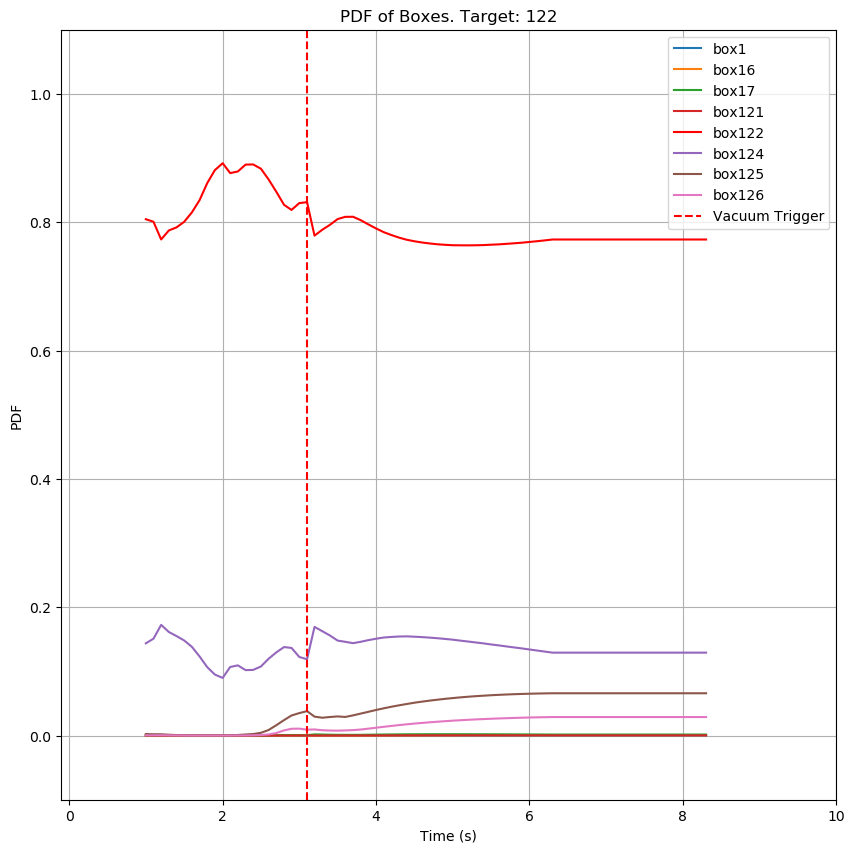

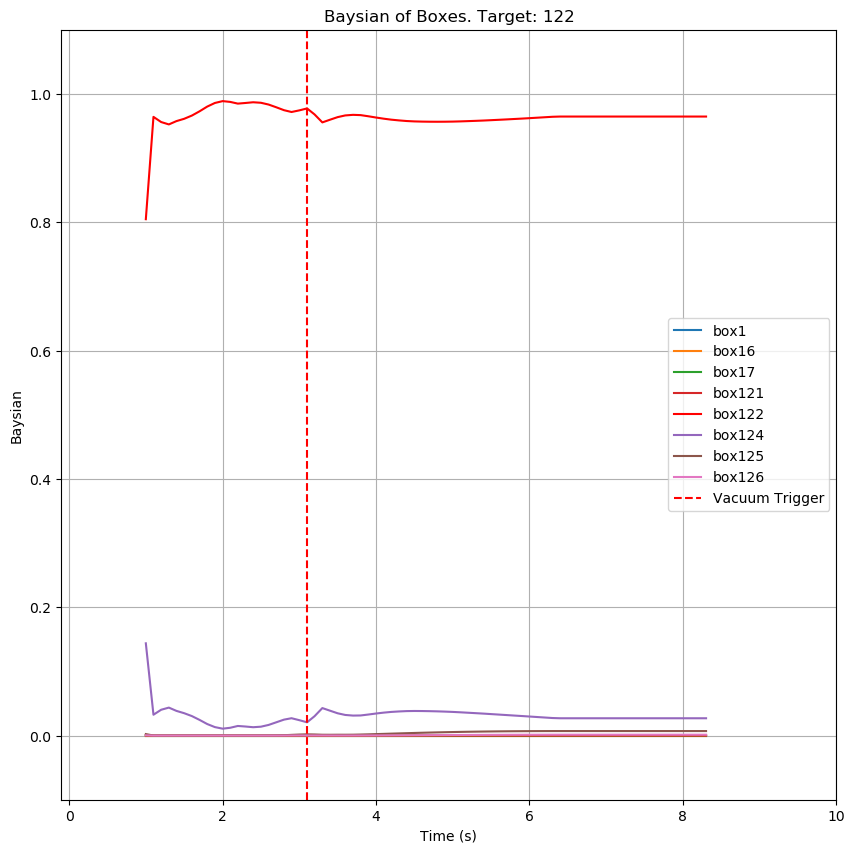

baysian0      baysian1      baysian2      baysian3  baysian4  \
10  8.267562e-10  5.352114e-08  8.503353e-05  1.815785e-07  0.804709   
11  3.044536e-18  2.874543e-15  1.653336e-08  4.008527e-14  0.964179   
12  1.649960e-17  4.472742e-15  4.910654e-08  3.469682e-14  0.956126   
13  9.752200e-18  2.835228e-15  6.176627e-08  1.267155e-14  0.952419   
14  7.293048e-19  3.174365e-16  2.857228e-08  1.432188e-15  0.957589   
..           ...           ...           ...           ...       ...   
79  2.356102e-09  3.806780e-07  4.093728e-06  1.997661e-07  0.964688   
80  2.356102e-09  3.806780e-07  4.093728e-06  1.997661e-07  0.964688   
81  2.356102e-09  3.806780e-07  4.093728e-06  1.997661e-07  0.964688   
82  2.356102e-09  3.806780e-07  4.093728e-06  1.997661e-07  0.964688   
83  2.356102e-09  3.806780e-07  4.093728e-06  1.997661e-07  0.964688   

    baysian5  baysian6      baysian7      baysian8  
10  0.143756  0.002314  3.015472e-04  4.883421e-02  
11  0.032463  0.000007  1.537124e-07  3.351241e-03  
12  0.040211  0.000006  2.499623e-07  3.656451e-03  
13  0.043562  0.000004  2.217950e-07  4.014608e-03  
14  0.038442  0.000002  7.353714e-08  3.967306e-03  
..       ...       ...           ...           ...  
79  0.026952  0.007012  1.343410e-03  3.928379e-07  
80  0.026952  0.007012  1.343410e-03  3.928379e-07  
81  0.026952  0.007012  1.343410e-03  3.928379e-07  
82  0.026952  0.007012  1.343410e-03  3.928379e-07  
83  0.026952  0.007012  1.343410e-03  3.928379e-07  

[74 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      8.267562e-10      5.352114e-08          0.000085      1.815785e-07   
11      2.461045e-09      3.589380e-08          0.000130      1.475355e-07   
12      4.341018e-09      8.068485e-08          0.000245      1.522758e-07   
13      1.435573e-09      2.245485e-08          0.000161      5.317567e-08   
14      3.307114e-10      9.202631e-09          0.000115      1.753285e-08   
..               ...               ...               ...               ...   
79      3.820493e-05      4.856252e-04          0.001593      3.517898e-04   
80      3.820493e-05      4.856252e-04          0.001593      3.517898e-04   
81      3.820493e-05      4.856252e-04          0.001593      3.517898e-04   
82      3.820493e-05      4.856252e-04          0.001593      3.517898e-04   
83      3.820493e-05      4.856252e-04          0.001593      3.517898e-04   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10          0.804709          0.143756          0.002314          0.000302   
11          0.800746          0.150916          0.002005          0.000341   
12          0.773140          0.172523          0.001995          0.000475   
13          0.787199          0.161353          0.001293          0.000298   
14          0.791881          0.155095          0.000779          0.000160   
..               ...               ...               ...               ...   
79          0.773065          0.129215          0.065910          0.028849   
80          0.773065          0.129215          0.065910          0.028849   
81          0.773065          0.129215          0.065910          0.028849   
82          0.773065          0.129215          0.065910          0.028849   
83          0.773065          0.129215          0.065910          0.028849   

    field.boxes8.pdf  
10          0.048834  
11          0.045862  
12          0.051623  
13          0.049696  
14          0.051969  
..               ...  
79          0.000493  
80          0.000493  
81          0.000493  
82          0.000493  
83          0.000493  

[74 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box122_data3.csv


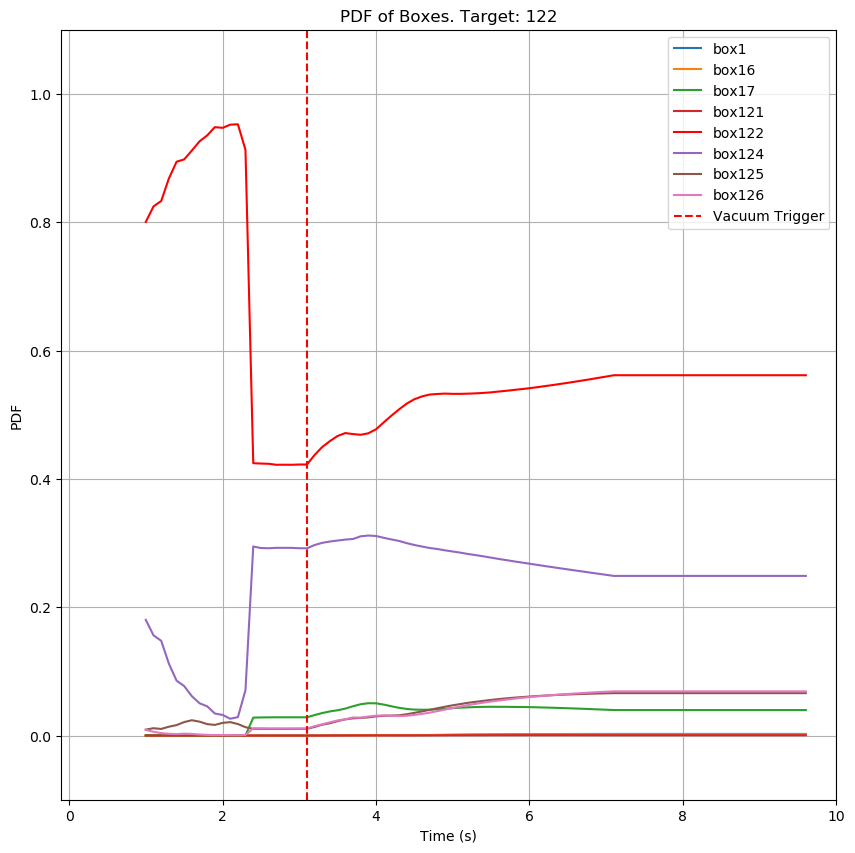

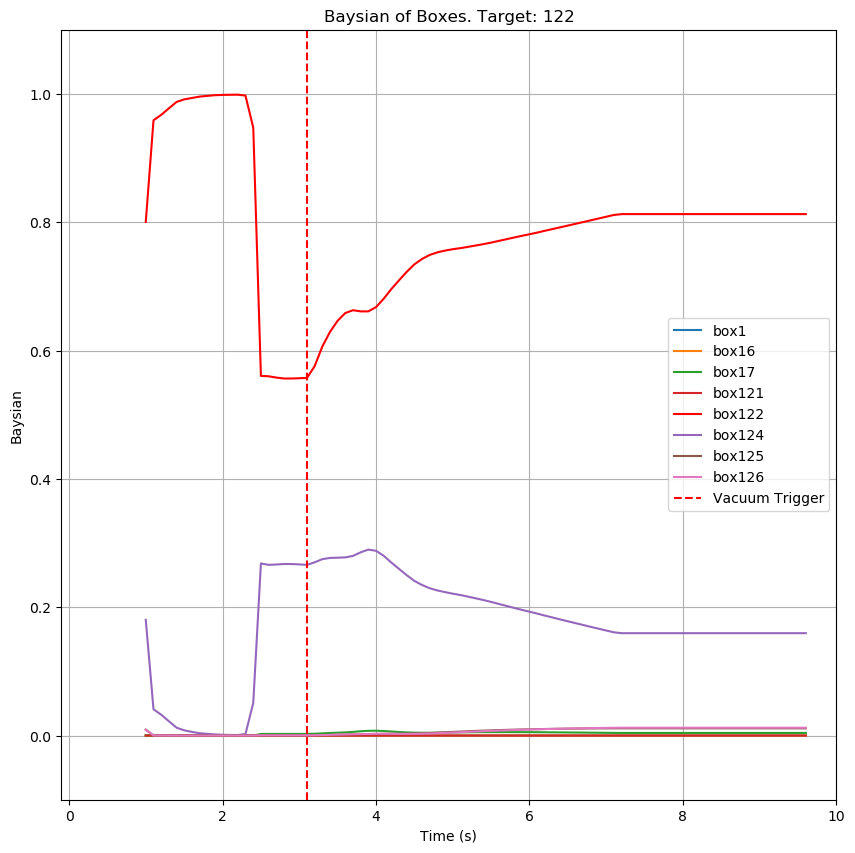

baysian0      baysian1      baysian2      baysian3  baysian4  \
10  7.018765e-06  4.455986e-05  4.116698e-04  9.281762e-06  0.800440   
11  2.596941e-11  1.529496e-09  2.446246e-07  1.704156e-10  0.958850   
12  2.776374e-12  3.836898e-10  2.380583e-07  2.081436e-10  0.967327   
13  4.060893e-13  1.836792e-10  1.042299e-07  3.089538e-10  0.977347   
14  1.373309e-13  1.542101e-10  2.276835e-08  7.625248e-10  0.987476   
..           ...           ...           ...           ...       ...   
92  1.597331e-05  1.075945e-05  4.070706e-03  8.508635e-07  0.812648   
93  1.597331e-05  1.075945e-05  4.070706e-03  8.508635e-07  0.812648   
94  1.597331e-05  1.075945e-05  4.070706e-03  8.508635e-07  0.812648   
95  1.597331e-05  1.075945e-05  4.070706e-03  8.508635e-07  0.812648   
96  1.597331e-05  1.075945e-05  4.070706e-03  8.508635e-07  0.812648   

    baysian5  baysian6  baysian7  baysian8  
10  0.180351  0.009241  0.008865  0.000631  
11  0.040918  0.000154  0.000076  0.000001  
12  0.032466  0.000166  0.000031  0.000010  
13  0.022428  0.000192  0.000014  0.000020  
14  0.012225  0.000285  0.000008  0.000006  
..       ...       ...       ...       ...  
92  0.159531  0.011258  0.012213  0.000251  
93  0.159531  0.011258  0.012213  0.000251  
94  0.159531  0.011258  0.012213  0.000251  
95  0.159531  0.011258  0.012213  0.000251  
96  0.159531  0.011258  0.012213  0.000251  

[87 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      7.018765e-06          0.000045          0.000412          0.000009   
11      2.546866e-06          0.000024          0.000409          0.000013   
12      7.741777e-07          0.000012          0.000413          0.000012   
13      3.880384e-07          0.000012          0.000187          0.000020   
14      2.781553e-07          0.000010          0.000096          0.000031   
..               ...               ...               ...               ...   
92      2.489601e-03          0.002043          0.039744          0.000575   
93      2.489601e-03          0.002043          0.039744          0.000575   
94      2.489601e-03          0.002043          0.039744          0.000575   
95      2.489601e-03          0.002043          0.039744          0.000575   
96      2.489601e-03          0.002043          0.039744          0.000575   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10          0.800440          0.180351          0.009241          0.008865   
11          0.824569          0.156172          0.011441          0.005910   
12          0.833134          0.147637          0.010294          0.003756   
13          0.867816          0.112379          0.013764          0.002756   
14          0.894320          0.085496          0.016285          0.002323   
..               ...               ...               ...               ...   
92          0.561544          0.248803          0.066095          0.068840   
93          0.561544          0.248803          0.066095          0.068840   
94          0.561544          0.248803          0.066095          0.068840   
95          0.561544          0.248803          0.066095          0.068840   
96          0.561544          0.248803          0.066095          0.068840   

    field.boxes8.pdf  
10          0.000631  
11          0.001460  
12          0.004741  
13          0.003066  
14          0.001439  
..               ...  
92          0.009868  
93          0.009868  
94          0.009868  
95          0.009868  
96          0.009868  

[87 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box122_data4.csv


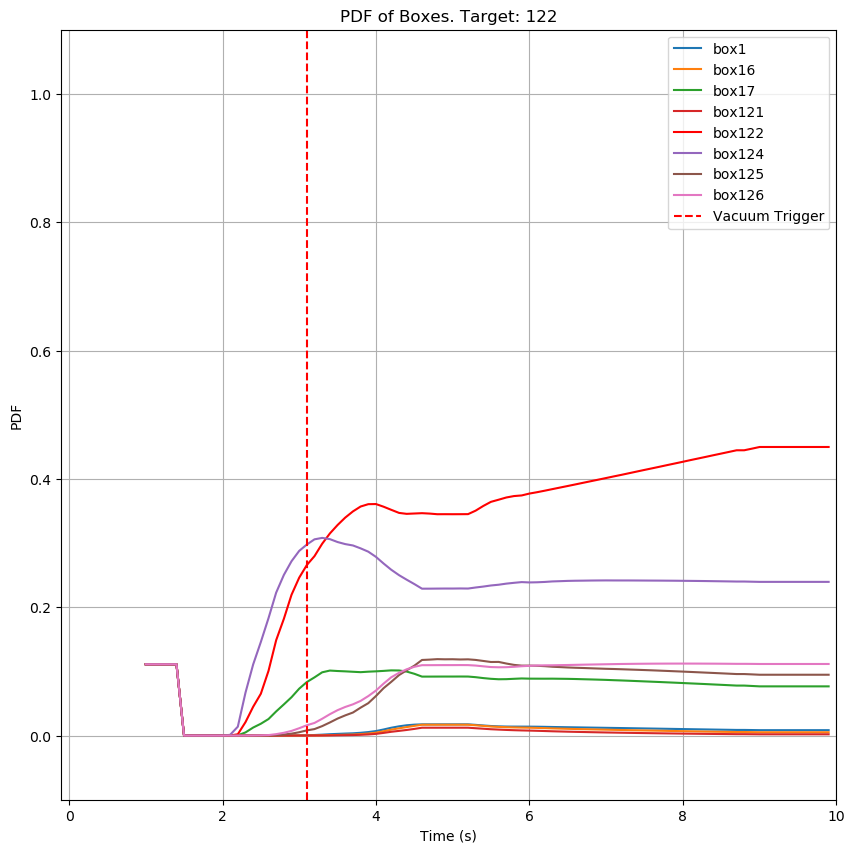

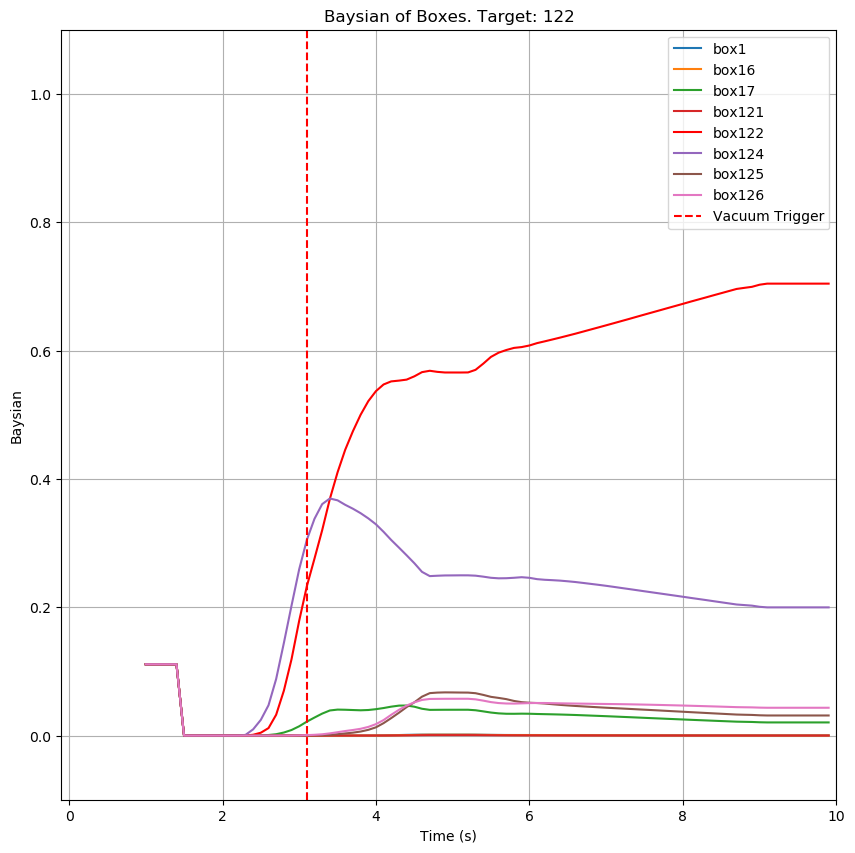

baysian0  baysian1  baysian2  baysian3  baysian4  baysian5  baysian6  \
10  0.111111  0.111111  0.111111  0.111111  0.111111  0.111111  0.111111   
11  0.111111  0.111111  0.111111  0.111111  0.111111  0.111111  0.111111   
12  0.111111  0.111111  0.111111  0.111111  0.111111  0.111111  0.111111   
13  0.111111  0.111111  0.111111  0.111111  0.111111  0.111111  0.111111   
14  0.111111  0.111111  0.111111  0.111111  0.111111  0.111111  0.111111   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.000246  0.000092  0.020464  0.000013  0.704291  0.199760  0.031282   
96  0.000246  0.000092  0.020464  0.000013  0.704291  0.199760  0.031282   
97  0.000246  0.000092  0.020464  0.000013  0.704291  0.199760  0.031282   
98  0.000246  0.000092  0.020464  0.000013  0.704291  0.199760  0.031282   
99  0.000246  0.000092  0.020464  0.000013  0.704291  0.199760  0.031282   

    baysian7  baysian8  
10  0.111111  0.111111  
11  0.111111  0.111111  
12  0.111111  0.111111  
13  0.111111  0.111111  
14  0.111111  0.111111  
..       ...       ...  
95  0.043326  0.000525  
96  0.043326  0.000525  
97  0.043326  0.000525  
98  0.043326  0.000525  
99  0.043326  0.000525  

[90 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10          0.111111          0.111111          0.111111          0.111111   
11          0.111111          0.111111          0.111111          0.111111   
12          0.111111          0.111111          0.111111          0.111111   
13          0.111111          0.111111          0.111111          0.111111   
14          0.111111          0.111111          0.111111          0.111111   
..               ...               ...               ...               ...   
95          0.008401          0.005152          0.076658          0.001966   
96          0.008401          0.005152          0.076658          0.001966   
97          0.008401          0.005152          0.076658          0.001966   
98          0.008401          0.005152          0.076658          0.001966   
99          0.008401          0.005152          0.076658          0.001966   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10          0.111111          0.111111          0.111111          0.111111   
11          0.111111          0.111111          0.111111          0.111111   
12          0.111111          0.111111          0.111111          0.111111   
13          0.111111          0.111111          0.111111          0.111111   
14          0.111111          0.111111          0.111111          0.111111   
..               ...               ...               ...               ...   
95          0.449718          0.239507          0.094778          0.111542   
96          0.449718          0.239507          0.094778          0.111542   
97          0.449718          0.239507          0.094778          0.111542   
98          0.449718          0.239507          0.094778          0.111542   
99          0.449718          0.239507          0.094778          0.111542   

    field.boxes8.pdf  
10          0.111111  
11          0.111111  
12          0.111111  
13          0.111111  
14          0.111111  
..               ...  
95          0.012277  
96          0.012277  
97          0.012277  
98          0.012277  
99          0.012277  

[90 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box124_data0.csv


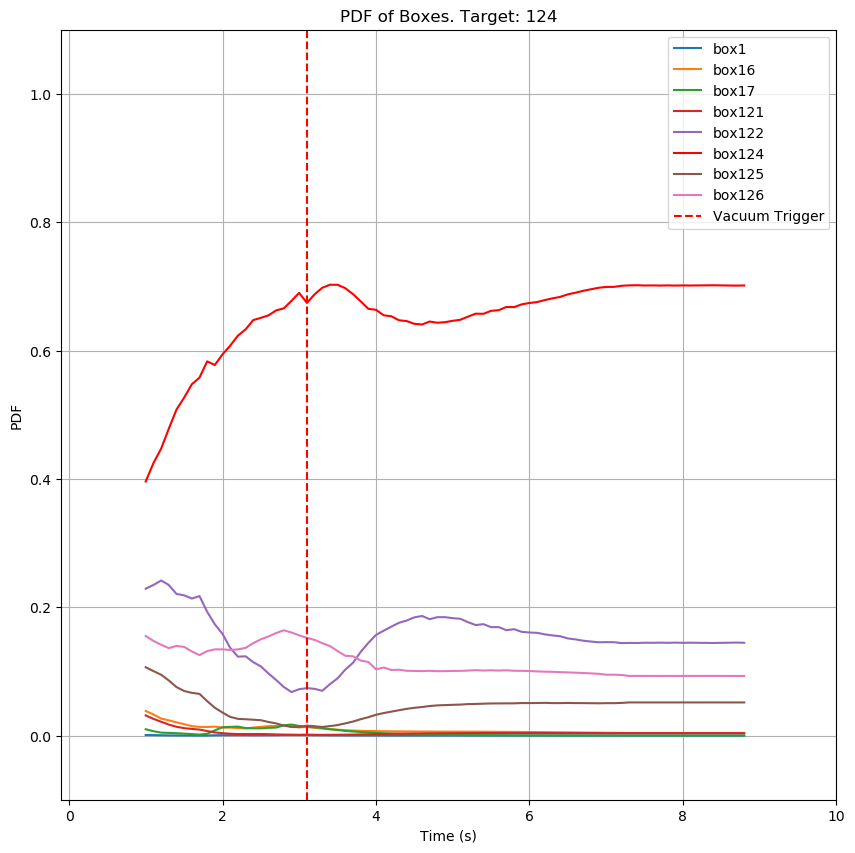

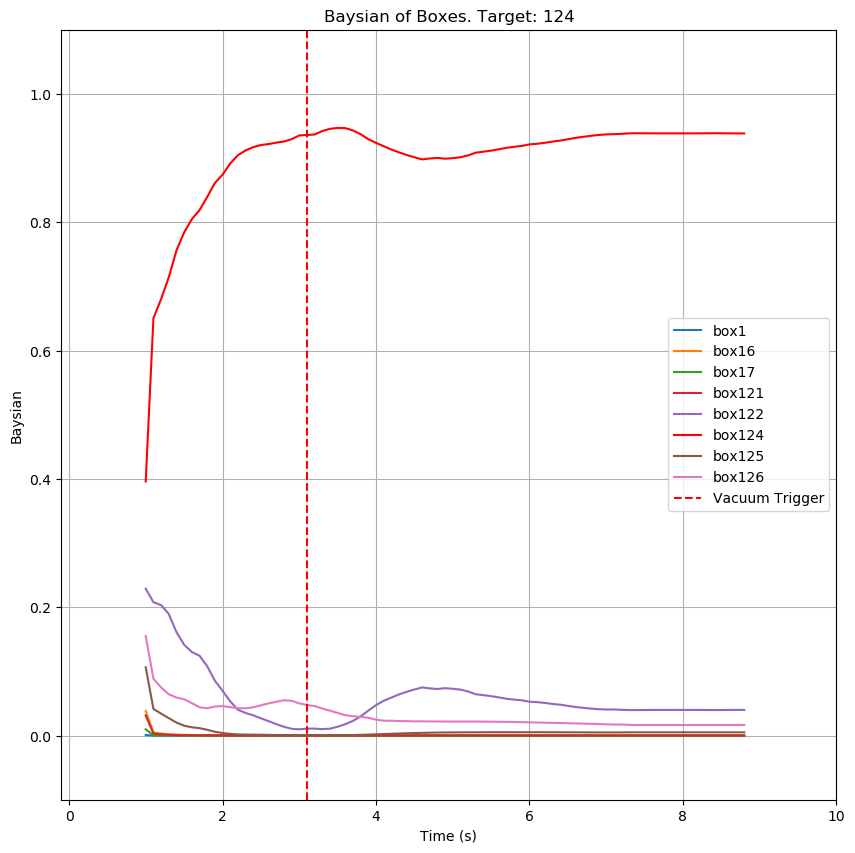

baysian0  baysian1      baysian2  baysian3  baysian4  baysian5  \
10  8.264767e-04  0.038376  9.840068e-03  0.031305  0.228848  0.395962   
11  2.312894e-06  0.004880  2.585026e-04  0.003149  0.207804  0.650532   
12  1.209573e-06  0.003112  1.101131e-04  0.001997  0.203218  0.680608   
13  4.324762e-07  0.002093  6.252285e-05  0.001225  0.189410  0.714221   
14  1.613432e-07  0.001522  4.649692e-05  0.000729  0.161224  0.755922   
..           ...       ...           ...       ...       ...       ...   
84  2.258290e-13  0.000032  8.585696e-09  0.000028  0.039718  0.938666   
85  2.258224e-13  0.000032  8.585442e-09  0.000028  0.039747  0.938639   
86  2.257904e-13  0.000032  8.584226e-09  0.000028  0.039883  0.938506   
87  2.257605e-13  0.000032  8.583089e-09  0.000028  0.040010  0.938381   
88  2.257678e-13  0.000032  8.583368e-09  0.000028  0.039979  0.938412   

    baysian6  baysian7  baysian8  
10  0.106491  0.155169  0.033182  
11  0.041404  0.088580  0.003390  
12  0.034109  0.074763  0.002081  
13  0.027180  0.064357  0.001451  
14  0.020196  0.059252  0.001108  
..       ...       ...       ...  
84  0.005083  0.016469  0.000004  
85  0.005083  0.016468  0.000004  
86  0.005082  0.016466  0.000004  
87  0.005082  0.016464  0.000004  
88  0.005082  0.016464  0.000004  

[79 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      8.264767e-04          0.038376          0.009840          0.031305   
11      7.231985e-04          0.032862          0.006789          0.025993   
12      4.667238e-04          0.026422          0.004526          0.021442   
13      2.774763e-04          0.023724          0.004137          0.017106   
14      1.868131e-04          0.020613          0.003611          0.013695   
..               ...               ...               ...               ...   
84      3.441935e-07          0.004094          0.000067          0.003806   
85      3.441052e-07          0.004093          0.000067          0.003805   
86      3.440167e-07          0.004092          0.000067          0.003804   
87      3.439402e-07          0.004091          0.000067          0.003803   
88      3.440571e-07          0.004093          0.000067          0.003805   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10          0.228848          0.395962          0.106491          0.155169   
11          0.234659          0.424568          0.100477          0.147524   
12          0.241663          0.447338          0.094731          0.141419   
13          0.234701          0.478102          0.085918          0.136274   
14          0.220697          0.507971          0.075522          0.139693   
..               ...               ...               ...               ...   
84          0.144272          0.701727          0.051640          0.092948   
85          0.144492          0.701547          0.051627          0.092924   
86          0.144712          0.701367          0.051613          0.092901   
87          0.144902          0.701211          0.051602          0.092880   
88          0.144612          0.701449          0.051619          0.092911   

    field.boxes8.pdf  
10          0.033182  
11          0.026404  
12          0.021992  
13          0.019761  
14          0.018011  
..               ...  
84          0.001444  
85          0.001444  
86          0.001443  
87          0.001443  
88          0.001444  

[79 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box124_data1.csv


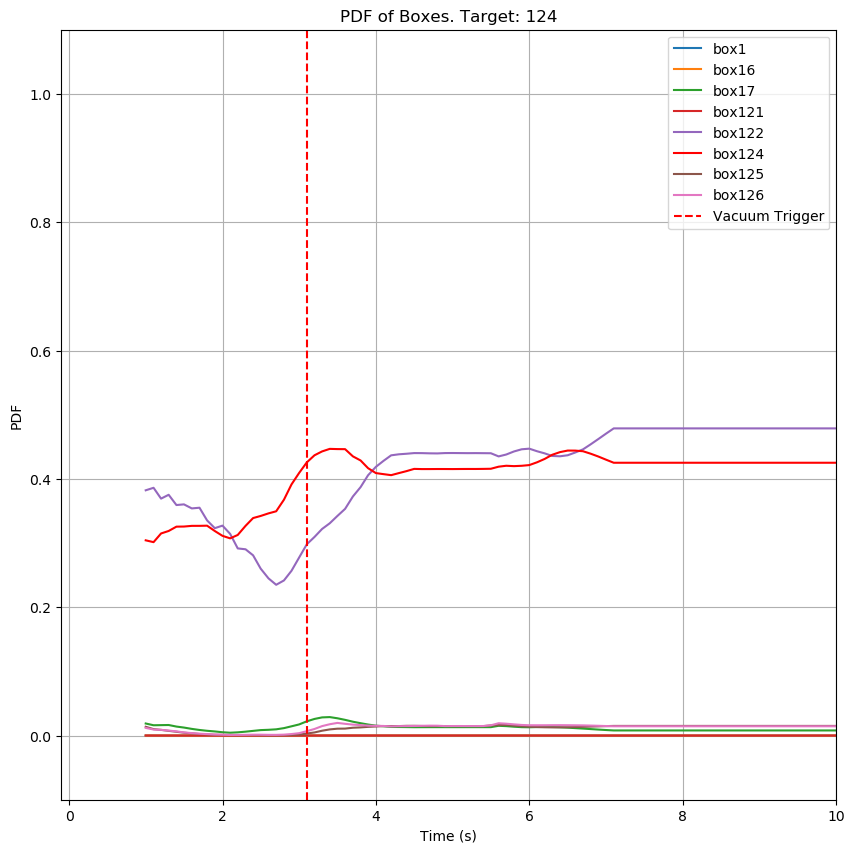

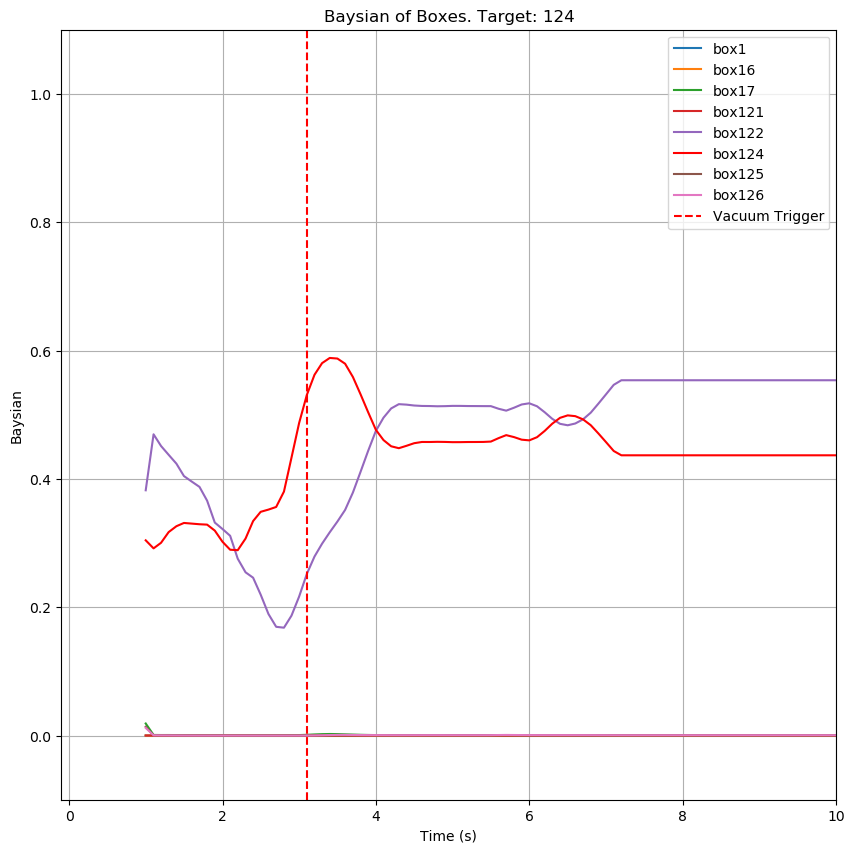

baysian0      baysian1  baysian2      baysian3  baysian4  baysian5  \
10   3.681594e-05  4.551368e-05  0.018781  4.241054e-05  0.382215  0.304253   
11   2.715423e-09  3.255783e-09  0.000959  2.767544e-09  0.469478  0.291730   
12   1.181068e-09  1.264486e-09  0.000826  8.470956e-10  0.451217  0.300432   
13   6.223275e-10  7.742325e-10  0.000843  3.363797e-10  0.437513  0.317081   
14   2.655896e-10  3.533002e-10  0.000724  1.120179e-10  0.423710  0.326257   
..            ...           ...       ...           ...       ...       ...   
98   7.582771e-11  1.602878e-09  0.000153  5.734532e-10  0.553718  0.436761   
99   7.582771e-11  1.602878e-09  0.000153  5.734532e-10  0.553718  0.436761   
100  7.582771e-11  1.602878e-09  0.000153  5.734532e-10  0.553718  0.436761   
101  7.582771e-11  1.602878e-09  0.000153  5.734532e-10  0.553718  0.436761   
102  7.582771e-11  1.602878e-09  0.000153  5.734532e-10  0.553718  0.436761   

     baysian6  baysian7  baysian8  
10   0.013633  0.011944  0.269049  
11   0.000435  0.000356  0.237041  
12   0.000281  0.000264  0.246980  
13   0.000205  0.000218  0.244140  
14   0.000136  0.000160  0.249014  
..        ...       ...       ...  
98   0.000545  0.000505  0.008319  
99   0.000545  0.000505  0.008319  
100  0.000545  0.000505  0.008319  
101  0.000545  0.000505  0.008319  
102  0.000545  0.000505  0.008319  

[93 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10           0.000037          0.000046          0.018781          0.000042   
11           0.000023          0.000022          0.016055          0.000021   
12           0.000016          0.000018          0.016247          0.000013   
13           0.000012          0.000014          0.016439          0.000008   
14           0.000007          0.000008          0.014008          0.000004   
..                ...               ...               ...               ...   
98           0.000006          0.000026          0.007959          0.000015   
99           0.000006          0.000026          0.007959          0.000015   
100          0.000006          0.000026          0.007959          0.000015   
101          0.000006          0.000026          0.007959          0.000015   
102          0.000006          0.000026          0.007959          0.000015   

     field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10           0.382215          0.304253          0.013633          0.011944   
11           0.386114          0.301408          0.010026          0.009381   
12           0.369241          0.314944          0.008859          0.008886   
13           0.375233          0.318829          0.007324          0.007758   
14           0.359243          0.325553          0.005891          0.006558   
..                ...               ...               ...               ...   
98           0.478698          0.425147          0.015013          0.014463   
99           0.478698          0.425147          0.015013          0.014463   
100          0.478698          0.425147          0.015013          0.014463   
101          0.478698          0.425147          0.015013          0.014463   
102          0.478698          0.425147          0.015013          0.014463   

     field.boxes8.pdf  
10           0.269049  
11           0.276949  
12           0.281776  
13           0.274383  
14           0.288726  
..                ...  
98           0.058673  
99           0.058673  
100          0.058673  
101          0.058673  
102          0.058673  

[93 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box124_data2.csv


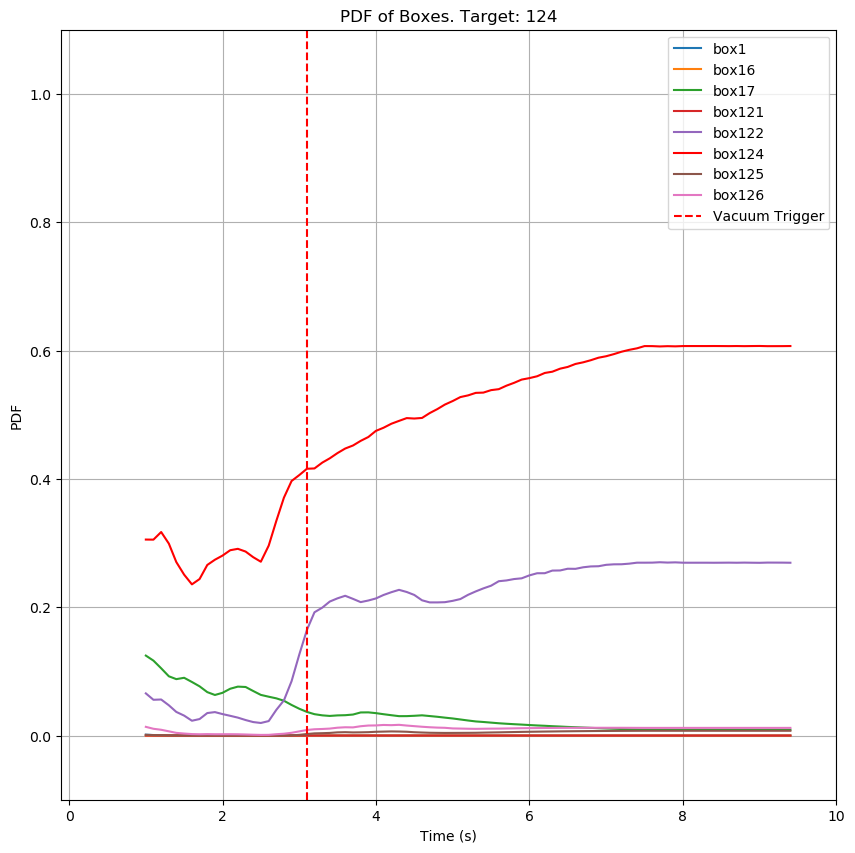

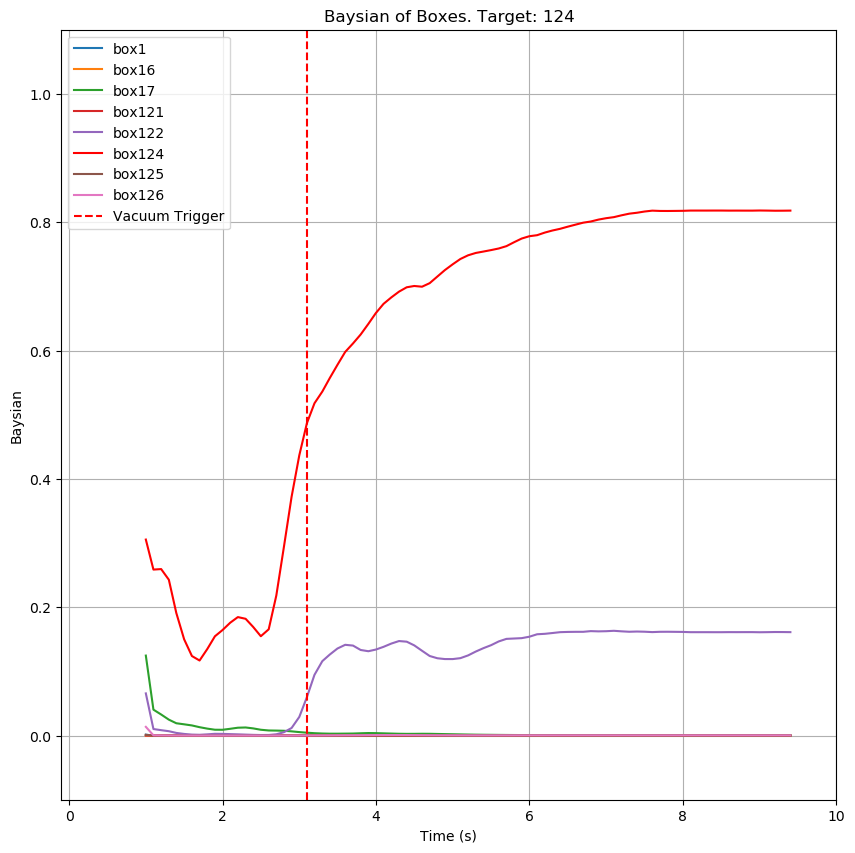

baysian0      baysian1  baysian2      baysian3  baysian4  baysian5  \
10  1.351141e-03  6.680273e-05  0.124630  2.916701e-06  0.065718  0.305451   
11  3.006244e-06  5.593582e-09  0.040368  7.865248e-12  0.010163  0.258661   
12  1.106399e-06  1.641253e-09  0.032795  1.486434e-12  0.008392  0.259437   
13  4.012211e-07  4.550427e-10  0.024777  2.824577e-13  0.006782  0.242817   
14  1.380505e-07  7.208807e-11  0.019181  2.717686e-14  0.004103  0.191072   
..           ...           ...       ...           ...       ...       ...   
90  1.055316e-12  6.327223e-11  0.000180  1.266851e-11  0.160996  0.818258   
91  1.055129e-12  6.326104e-11  0.000180  1.266627e-11  0.161145  0.818113   
92  1.054864e-12  6.324513e-11  0.000180  1.266309e-11  0.161356  0.817907   
93  1.054931e-12  6.324916e-11  0.000180  1.266390e-11  0.161302  0.817959   
94  1.055109e-12  6.325984e-11  0.000180  1.266603e-11  0.161161  0.818098   

        baysian6  baysian7  baysian8  
10  1.174535e-03  0.013560  0.488045  
11  2.271586e-06  0.000397  0.690405  
12  1.066806e-06  0.000255  0.699118  
13  5.099971e-07  0.000152  0.725471  
14  1.478152e-07  0.000065  0.785579  
..           ...       ...       ...  
90  1.232530e-04  0.000317  0.020125  
91  1.232312e-04  0.000317  0.020121  
92  1.232002e-04  0.000317  0.020116  
93  1.232081e-04  0.000317  0.020117  
94  1.232289e-04  0.000317  0.020121  

[85 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      1.351141e-03          0.000067          0.124630      2.916701e-06   
11      8.022119e-04          0.000030          0.116782      9.722679e-07   
12      5.148402e-04          0.000020          0.104830      5.707020e-07   
13      3.045403e-04          0.000009          0.092362      1.934094e-07   
14      1.919171e-04          0.000003          0.087920      5.948978e-08   
..               ...               ...               ...               ...   
90      6.894922e-07          0.000005          0.009017      2.388916e-06   
91      6.891724e-07          0.000005          0.009013      2.387808e-06   
92      6.892026e-07          0.000005          0.009013      2.387913e-06   
93      6.892457e-07          0.000005          0.009014      2.388062e-06   
94      6.893971e-07          0.000005          0.009016      2.388587e-06   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10          0.065718          0.305451          0.001175          0.013560   
11          0.055760          0.305320          0.000697          0.010561   
12          0.056183          0.317195          0.000571          0.009014   
13          0.047170          0.299148          0.000349          0.006589   
14          0.036830          0.270415          0.000179          0.004190   
..               ...               ...               ...               ...   
90          0.269222          0.607132          0.007451          0.011954   
91          0.269561          0.606850          0.007448          0.011949   
92          0.269529          0.606877          0.007448          0.011949   
93          0.269483          0.606915          0.007449          0.011950   
94          0.269323          0.607048          0.007450          0.011953   

    field.boxes8.pdf  
10          0.488045  
11          0.510047  
12          0.511670  
13          0.554068  
14          0.600271  
..               ...  
90          0.095215  
91          0.095171  
92          0.095175  
93          0.095181  
94          0.095202  

[85 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box124_data3.csv


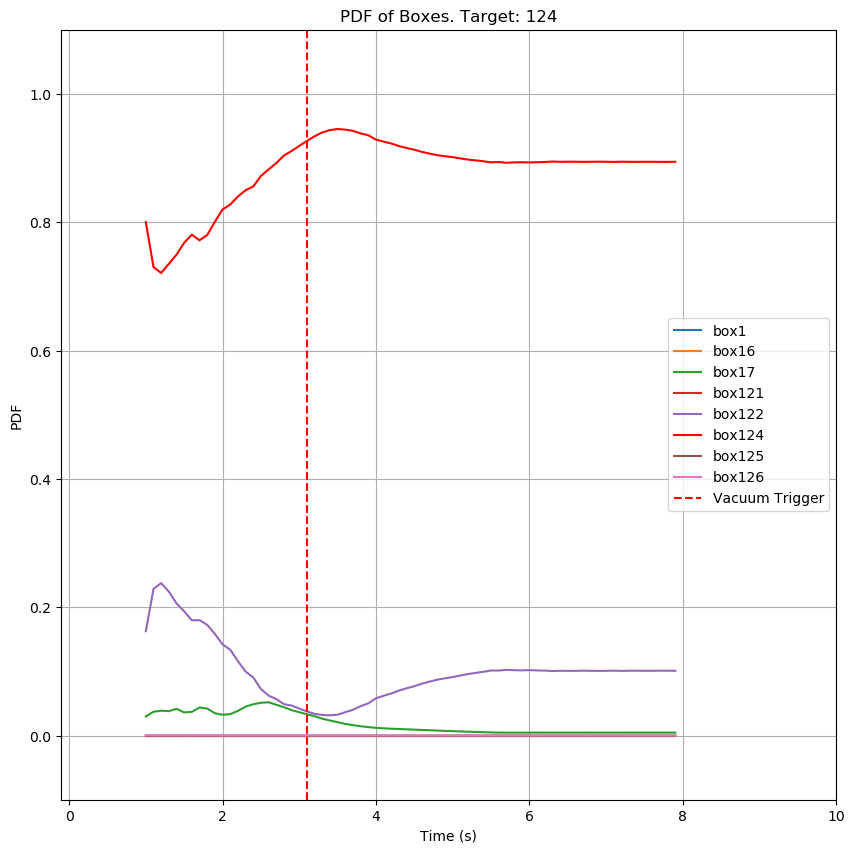

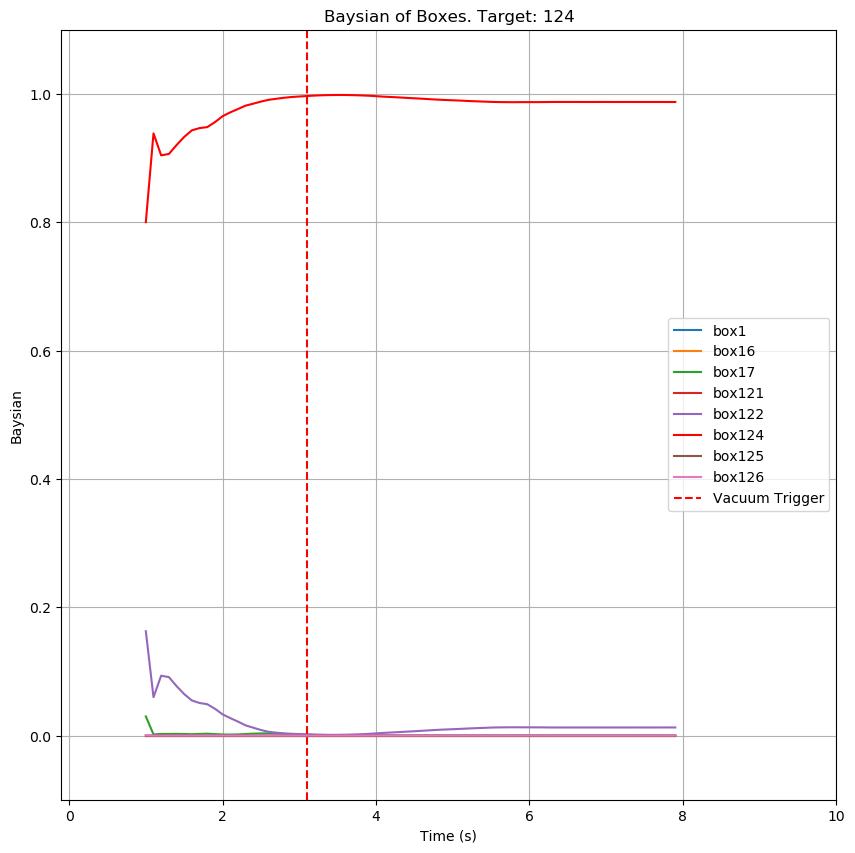

baysian0      baysian1  baysian2      baysian3  baysian4  baysian5  \
10  1.203354e-11  1.806738e-14  0.029815  4.858026e-17  0.162594  0.800147   
11  3.033714e-22  5.279274e-29  0.001777  9.976025e-35  0.059714  0.938464   
12  4.717920e-22  3.490972e-30  0.002465  5.057263e-37  0.093274  0.904241   
13  8.188818e-22  1.322583e-30  0.002514  3.530040e-38  0.091084  0.906389   
14  7.150048e-21  5.025141e-30  0.002650  5.989002e-38  0.077135  0.920203   
..           ...           ...       ...           ...       ...       ...   
75  3.604235e-27  1.692013e-36  0.000026  2.170359e-46  0.012590  0.987384   
76  3.604268e-27  1.692029e-36  0.000026  2.170380e-46  0.012581  0.987393   
77  3.604197e-27  1.691995e-36  0.000026  2.170337e-46  0.012600  0.987374   
78  3.604128e-27  1.691963e-36  0.000026  2.170295e-46  0.012619  0.987355   
79  3.604217e-27  1.692005e-36  0.000026  2.170349e-46  0.012595  0.987379   

        baysian6      baysian7      baysian8  
10  6.851552e-06  2.792094e-04  7.157294e-03  
11  2.102414e-11  5.545715e-08  4.557997e-05  
12  2.706015e-12  1.855099e-08  1.941438e-05  
13  6.162039e-13  1.032972e-08  1.167776e-05  
14  3.704008e-13  1.175469e-08  1.140731e-05  
..           ...           ...           ...  
75  3.238949e-17  1.324335e-11  1.137866e-07  
76  3.238979e-17  1.324347e-11  1.137877e-07  
77  3.238915e-17  1.324321e-11  1.137854e-07  
78  3.238853e-17  1.324296e-11  1.137833e-07  
79  3.238933e-17  1.324329e-11  1.137861e-07  

[70 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      1.203354e-11      1.806738e-14          0.029815      4.858026e-17   
11      1.569489e-11      1.819098e-15          0.037101      1.278423e-18   
12      1.749877e-11      1.117135e-15          0.038680      2.302798e-19   
13      2.736534e-11      6.923161e-16          0.038012      8.964184e-20   
14      1.564426e-10      4.346010e-15          0.041744      4.000282e-19   
..               ...               ...               ...               ...   
75      5.402345e-14      1.170517e-18          0.004592      1.325689e-23   
76      5.402372e-14      1.170523e-18          0.004592      1.325695e-23   
77      5.401489e-14      1.170331e-18          0.004592      1.325479e-23   
78      5.401546e-14      1.170344e-18          0.004592      1.325493e-23   
79      5.402555e-14      1.170562e-18          0.004592      1.325740e-23   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10          0.162594          0.800147      6.851552e-06          0.000279   
11          0.228638          0.730171      1.910321e-06          0.000124   
12          0.237481          0.720900      8.245916e-07          0.000087   
13          0.224286          0.735237      4.369910e-07          0.000069   
14          0.205920          0.749382      5.075120e-07          0.000102   
..               ...               ...               ...               ...   
75          0.100933          0.894167      5.121272e-09          0.000003   
76          0.100929          0.894172      5.121297e-09          0.000003   
77          0.101076          0.894026      5.120460e-09          0.000003   
78          0.101066          0.894035      5.120514e-09          0.000003   
79          0.100898          0.894202      5.121471e-09          0.000003   

    field.boxes8.pdf  
10          0.007157  
11          0.003965  
12          0.002851  
13          0.002396  
14          0.002851  
..               ...  
75          0.000304  
76          0.000304  
77          0.000303  
78          0.000303  
79          0.000304  

[70 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box124_data4.csv


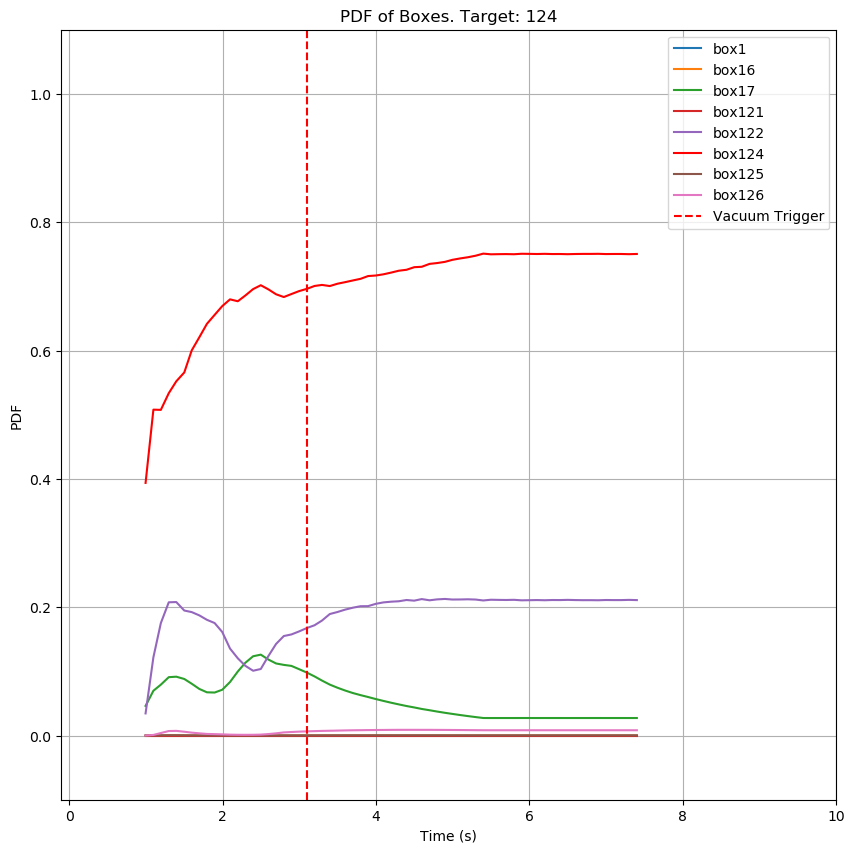

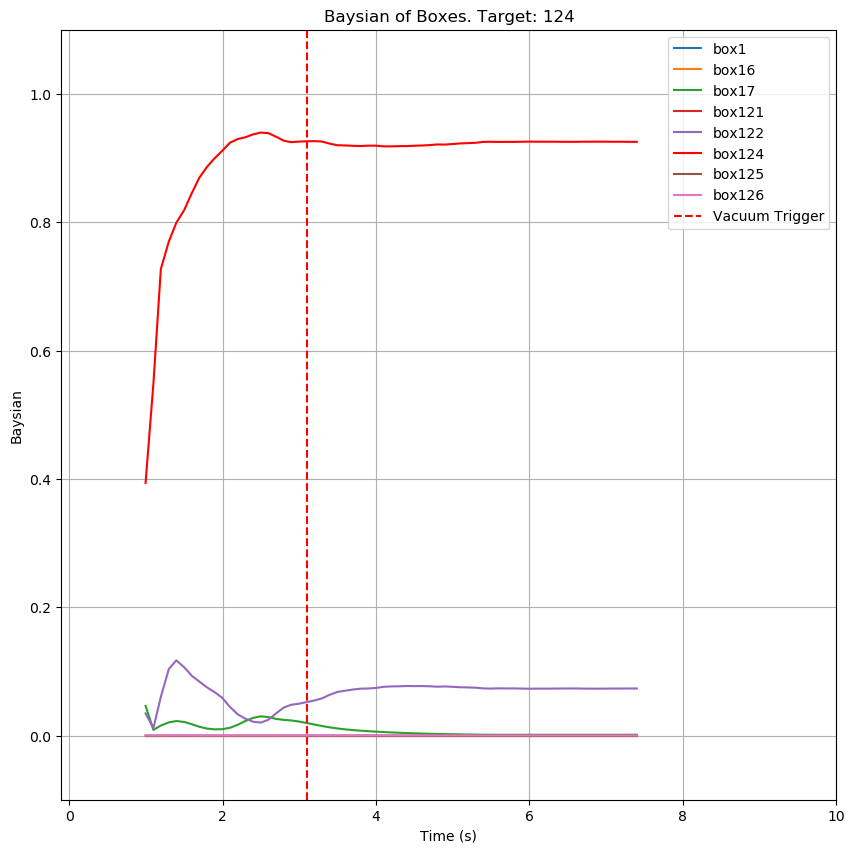

baysian0      baysian1  baysian2      baysian3  baysian4  baysian5  \
10  2.869783e-08  1.169555e-12  0.046256  4.751106e-16  0.034500  0.393736   
11  2.215155e-13  2.838403e-20  0.008856  8.498454e-26  0.011537  0.548355   
12  2.120358e-10  8.683823e-15  0.015615  7.321197e-19  0.060263  0.726894   
13  5.756190e-09  1.277840e-12  0.020510  2.451832e-16  0.103427  0.769644   
14  1.593454e-08  4.030261e-12  0.022644  9.557242e-16  0.117213  0.799106   
..           ...           ...       ...           ...       ...       ...   
70  2.637270e-10  1.320909e-13  0.001227  9.120635e-19  0.073176  0.925474   
71  2.636972e-10  1.320760e-13  0.001227  9.119605e-19  0.073280  0.925369   
72  2.637107e-10  1.320827e-13  0.001227  9.120071e-19  0.073233  0.925417   
73  2.636727e-10  1.320637e-13  0.001227  9.118758e-19  0.073366  0.925283   
74  2.636764e-10  1.320656e-13  0.001227  9.118886e-19  0.073353  0.925296   

        baysian6      baysian7  baysian8  
10  1.341992e-07  3.636075e-05  0.525471  
11  1.100081e-11  9.804640e-08  0.431252  
12  2.124089e-08  1.083687e-05  0.197218  
13  3.874307e-07  7.826947e-05  0.106341  
14  7.498757e-07  1.395433e-04  0.060897  
..           ...           ...       ...  
70  8.561123e-08  1.127081e-04  0.000010  
71  8.560156e-08  1.126953e-04  0.000010  
72  8.560593e-08  1.127011e-04  0.000010  
73  8.559361e-08  1.126849e-04  0.000010  
74  8.559481e-08  1.126865e-04  0.000010  

[65 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      2.869783e-08      1.169555e-12          0.046256      4.751106e-16   
11      2.815019e-06      8.850741e-09          0.069822      6.523361e-11   
12      2.671344e-05      3.479632e-07          0.079313      3.980273e-09   
13      7.582064e-05      1.292186e-06          0.090992      2.167505e-08   
14      7.747301e-05      1.149758e-06          0.091736      1.625440e-08   
..               ...               ...               ...               ...   
70      1.266713e-05      2.834898e-07          0.027327      7.449268e-10   
71      1.266929e-05      2.835381e-07          0.027331      7.450536e-10   
72      1.266900e-05      2.835316e-07          0.027331      7.450366e-10   
73      1.266403e-05      2.834205e-07          0.027320      7.447445e-10   
74      1.266951e-05      2.835431e-07          0.027332      7.450668e-10   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10          0.034500          0.393736      1.341992e-07          0.000036   
11          0.121956          0.507905      2.989515e-05          0.000983   
12          0.175246          0.507564      2.519847e-04          0.003908   
13          0.207667          0.533557      5.410060e-04          0.007047   
14          0.208069          0.552105      5.109584e-04          0.007300   
..               ...               ...               ...               ...   
70          0.211249          0.750383      2.282267e-04          0.008281   
71          0.211114          0.750511      2.282655e-04          0.008282   
72          0.211132          0.750494      2.282603e-04          0.008282   
73          0.211442          0.750200      2.281708e-04          0.008279   
74          0.211100          0.750524      2.282696e-04          0.008282   

    field.boxes8.pdf  
10          0.525471  
11          0.299302  
12          0.233689  
13          0.160119  
14          0.140200  
..               ...  
70          0.002519  
71          0.002520  
72          0.002520  
73          0.002519  
74          0.002520  

[65 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box125_data0.csv


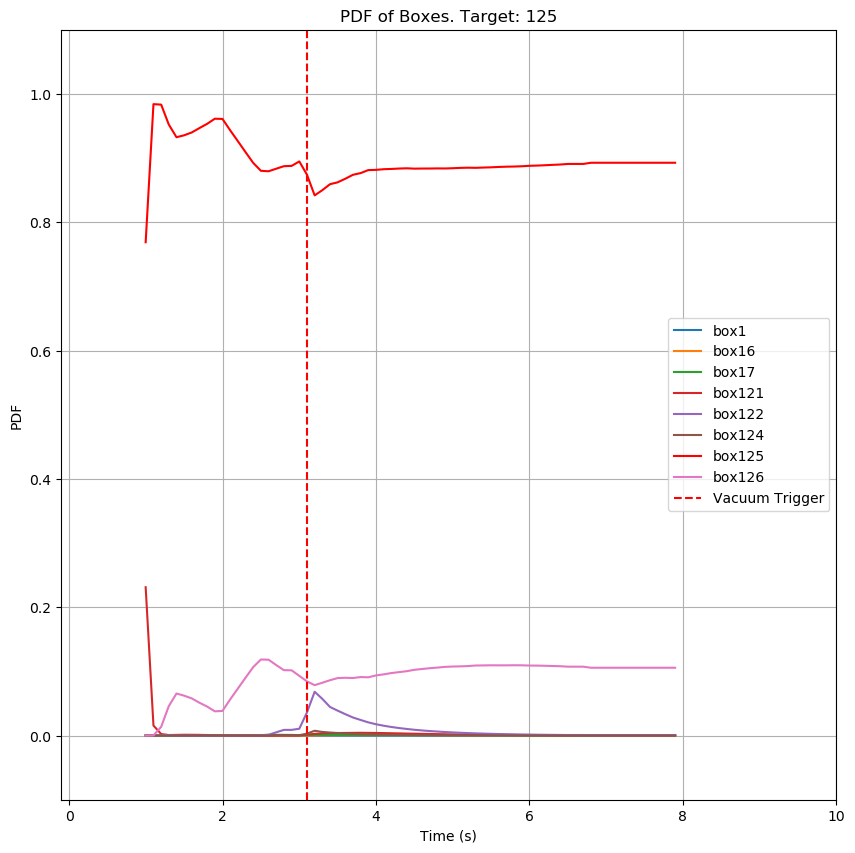

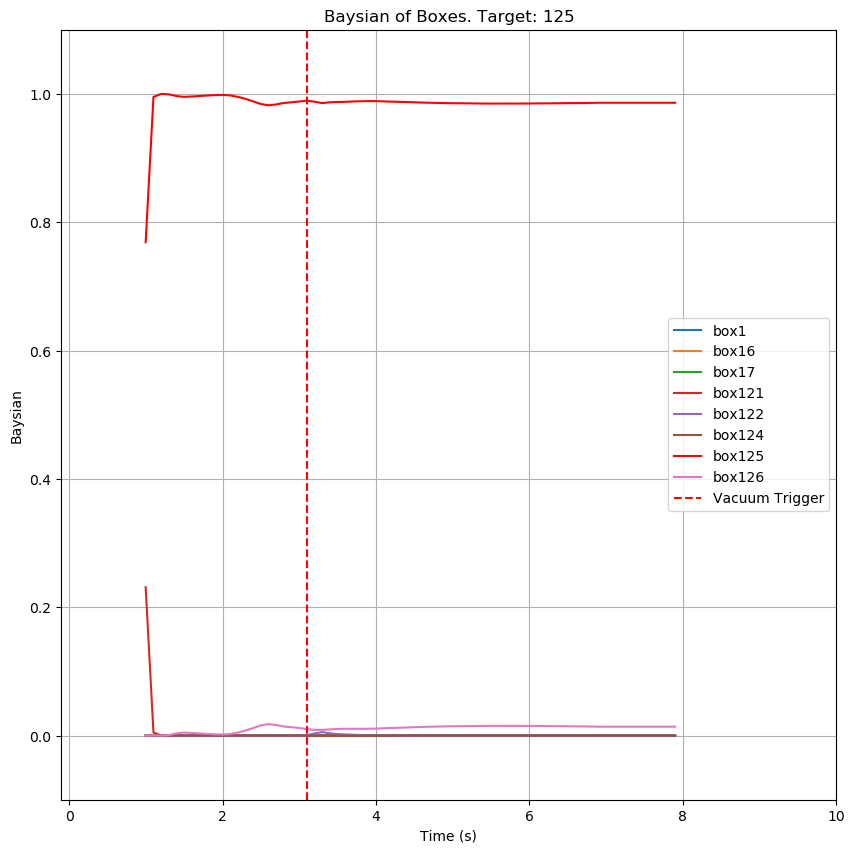

baysian0      baysian1      baysian2      baysian3      baysian4  \
10  2.178190e-14  4.163470e-05  4.129793e-19  2.311777e-01  2.692662e-06   
11  2.956895e-23  5.764023e-09  4.588867e-30  4.741538e-03  2.375781e-10   
12  8.565031e-16  2.657532e-08  6.625652e-18  3.747801e-05  3.718912e-08   
13  7.226755e-12  6.179355e-08  2.874643e-11  2.060523e-06  4.247204e-07   
14  5.522497e-10  1.551373e-07  2.665345e-09  9.631276e-07  2.346165e-07   
..           ...           ...           ...           ...           ...   
75  7.502099e-11  2.535582e-08  1.081391e-07  1.913630e-07  6.995116e-07   
76  7.502099e-11  2.535582e-08  1.081391e-07  1.913630e-07  6.995116e-07   
77  7.502099e-11  2.535582e-08  1.081391e-07  1.913630e-07  6.995116e-07   
78  7.502099e-11  2.535582e-08  1.081391e-07  1.913630e-07  6.995116e-07   
79  7.502099e-11  2.535582e-08  1.081391e-07  1.913630e-07  6.995116e-07   

        baysian5  baysian6      baysian7      baysian8  
10  1.651872e-13  0.768777  6.885289e-07  9.114827e-32  
11  1.069671e-21  0.995258  1.904745e-10  4.143782e-53  
12  1.289017e-14  0.999959  2.963350e-06  2.665353e-36  
13  4.227792e-11  0.999331  6.660655e-04  1.723773e-27  
14  1.094111e-10  0.996634  3.364148e-03  7.352634e-27  
..           ...       ...           ...           ...  
75  2.835065e-09  0.986176  1.382336e-02  1.491194e-23  
76  2.835065e-09  0.986176  1.382336e-02  1.491194e-23  
77  2.835065e-09  0.986176  1.382336e-02  1.491194e-23  
78  2.835065e-09  0.986176  1.382336e-02  1.491194e-23  
79  2.835065e-09  0.986176  1.382336e-02  1.491194e-23  

[70 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      2.178190e-14          0.000042      4.129793e-19          0.231178   
11      1.031839e-09          0.000105      8.445960e-12          0.015590   
12      8.031691e-07          0.000244      7.590487e-07          0.002326   
13      8.431283e-06          0.000237      3.548719e-05          0.000830   
14      5.836408e-05          0.000583      6.692457e-05          0.001034   
..               ...               ...               ...               ...   
75      7.785865e-06          0.000143      2.956016e-04          0.000393   
76      7.785865e-06          0.000143      2.956016e-04          0.000393   
77      7.785865e-06          0.000143      2.956016e-04          0.000393   
78      7.785865e-06          0.000143      2.956016e-04          0.000393   
79      7.785865e-06          0.000143      2.956016e-04          0.000393   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10          0.000003      1.651872e-13          0.768777      6.885289e-07   
11          0.000067      4.922047e-09          0.984027      2.102745e-04   
12          0.000537      2.533978e-06          0.983253      1.363598e-02   
13          0.000742      1.563393e-05          0.952361      4.577073e-02   
14          0.000282      6.235872e-06          0.932477      6.549243e-02   
..               ...               ...               ...               ...   
75          0.000752      4.786267e-05          0.892673      1.056872e-01   
76          0.000752      4.786267e-05          0.892673      1.056872e-01   
77          0.000752      4.786267e-05          0.892673      1.056872e-01   
78          0.000752      4.786267e-05          0.892673      1.056872e-01   
79          0.000752      4.786267e-05          0.892673      1.056872e-01   

    field.boxes8.pdf  
10      9.114827e-32  
11      3.455575e-22  
12      7.463190e-15  
13      2.164277e-13  
14      3.027149e-14  
..               ...  
75      3.471223e-12  
76      3.471223e-12  
77      3.471223e-12  
78      3.471223e-12  
79      3.471223e-12  

[70 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box125_data1.csv


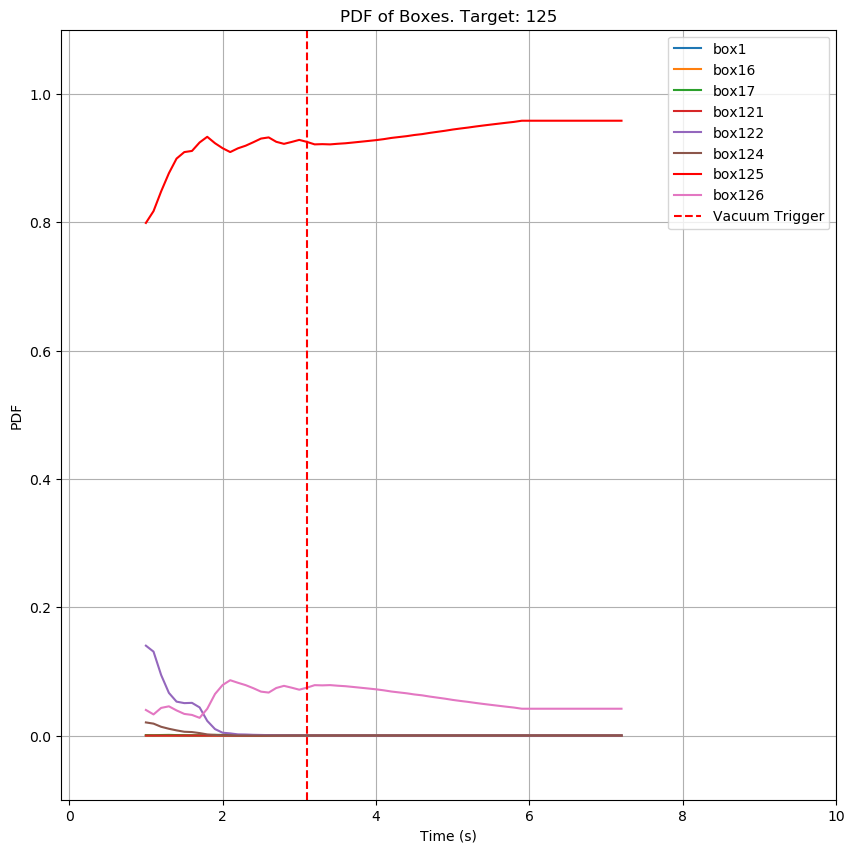

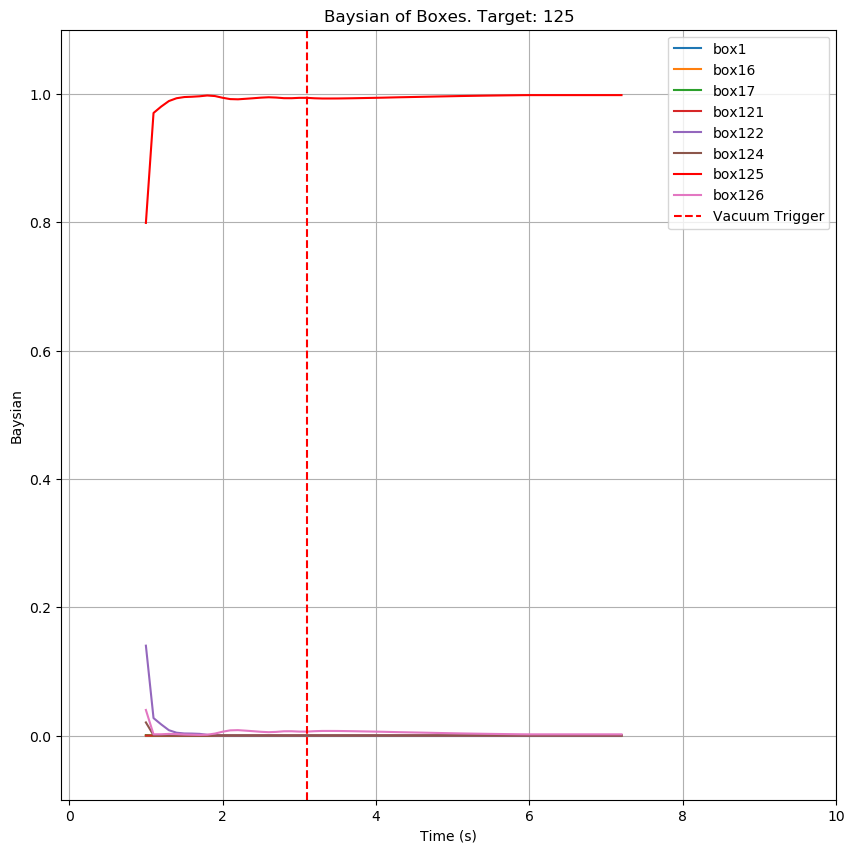

baysian0      baysian1      baysian2      baysian3      baysian4  \
10  9.025130e-10  1.979938e-07  6.712445e-04  4.780179e-06  1.400866e-01   
11  2.467992e-19  2.002436e-14  3.904062e-07  1.132172e-11  2.722302e-02   
12  8.365195e-20  5.047438e-15  4.495003e-07  1.773998e-12  1.744651e-02   
13  1.078526e-19  1.315644e-15  1.094561e-06  2.777395e-13  8.343000e-03   
14  2.005785e-20  1.249040e-16  9.346423e-07  3.194506e-14  4.429682e-03   
..           ...           ...           ...           ...           ...   
68  1.482079e-12  1.439534e-13  5.799249e-15  5.374256e-16  8.781885e-17   
69  1.482079e-12  1.439534e-13  5.799249e-15  5.374256e-16  8.781885e-17   
70  1.482079e-12  1.439534e-13  5.799249e-15  5.374256e-16  8.781885e-17   
71  1.482079e-12  1.439534e-13  5.799249e-15  5.374256e-16  8.781885e-17   
72  1.482079e-12  1.439534e-13  5.799249e-15  5.374256e-16  8.781885e-17   

        baysian5  baysian6  baysian7      baysian8  
10  2.046391e-02  0.798893  0.039879  1.264123e-06  
11  5.652180e-04  0.970258  0.001953  9.644781e-13  
12  3.593399e-04  0.980185  0.002009  2.204598e-13  
13  1.923086e-04  0.988851  0.002612  5.377893e-14  
14  1.075515e-04  0.993212  0.002250  8.405636e-15  
..           ...       ...       ...           ...  
68  2.143481e-23  0.998099  0.001901  8.142588e-63  
69  2.143481e-23  0.998099  0.001901  8.142588e-63  
70  2.143481e-23  0.998099  0.001901  8.142588e-63  
71  2.143481e-23  0.998099  0.001901  8.142588e-63  
72  2.143481e-23  0.998099  0.001901  8.142588e-63  

[63 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      9.025130e-10      1.979938e-07      6.712445e-04      4.780179e-06   
11      1.840208e-10      6.805871e-08      3.913926e-04      1.593840e-06   
12      3.214508e-10      5.244360e-08      8.121244e-04      7.870703e-07   
13      2.521838e-10      1.885588e-08      1.013020e-03      2.652313e-07   
14      6.310259e-11      5.255444e-09      7.319934e-04      9.555616e-08   
..               ...               ...               ...               ...   
68      1.167612e-06      3.638930e-07      7.303797e-08      2.223422e-08   
69      1.167612e-06      3.638930e-07      7.303797e-08      2.223422e-08   
70      1.167612e-06      3.638930e-07      7.303797e-08      2.223422e-08   
71      1.167612e-06      3.638930e-07      7.303797e-08      2.223422e-08   
72      1.167612e-06      3.638930e-07      7.303797e-08      2.223422e-08   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      1.400866e-01      2.046391e-02          0.798893          0.039879   
11      1.307725e-01      1.858677e-02          0.817288          0.032959   
12      9.434033e-02      1.367120e-02          0.848083          0.043092   
13      6.646999e-02      1.057287e-02          0.876382          0.045561   
14      5.287212e-02      8.070553e-03          0.899142          0.039184   
..               ...               ...               ...               ...   
68      8.987868e-09      4.440406e-12          0.958186          0.041813   
69      8.987868e-09      4.440406e-12          0.958186          0.041813   
70      8.987868e-09      4.440406e-12          0.958186          0.041813   
71      8.987868e-09      4.440406e-12          0.958186          0.041813   
72      8.987868e-09      4.440406e-12          0.958186          0.041813   

    field.boxes8.pdf  
10      1.264123e-06  
11      5.134280e-07  
12      3.036372e-07  
13      1.331245e-07  
14      5.009479e-08  
..               ...  
68      8.654541e-32  
69      8.654541e-32  
70      8.654541e-32  
71      8.654541e-32  
72      8.654541e-32  

[63 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box125_data2.csv


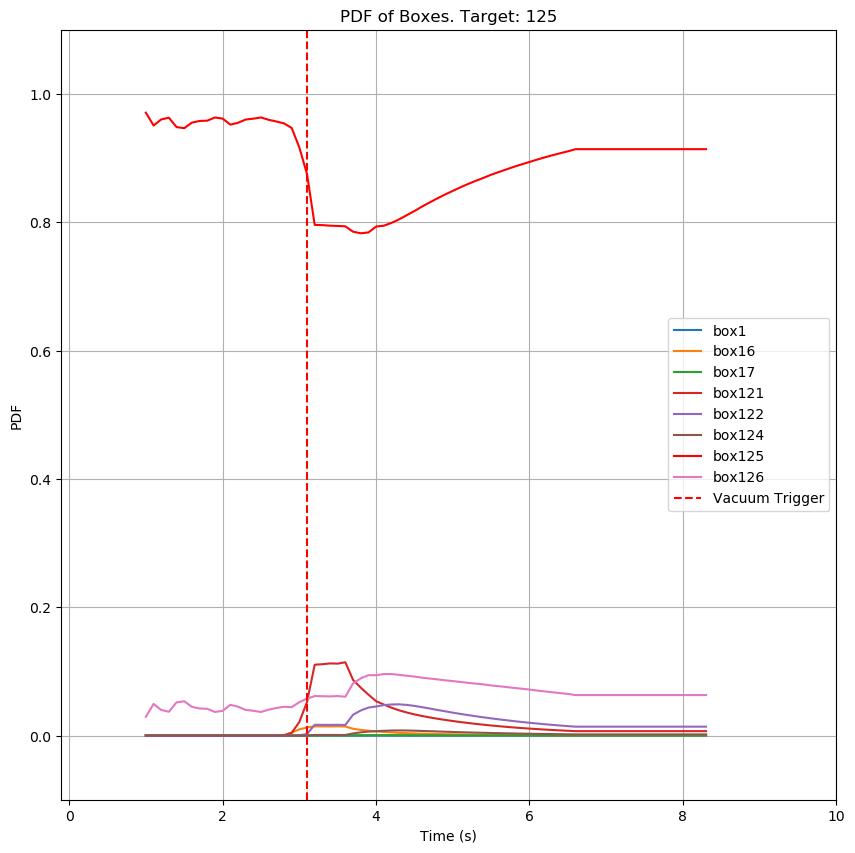

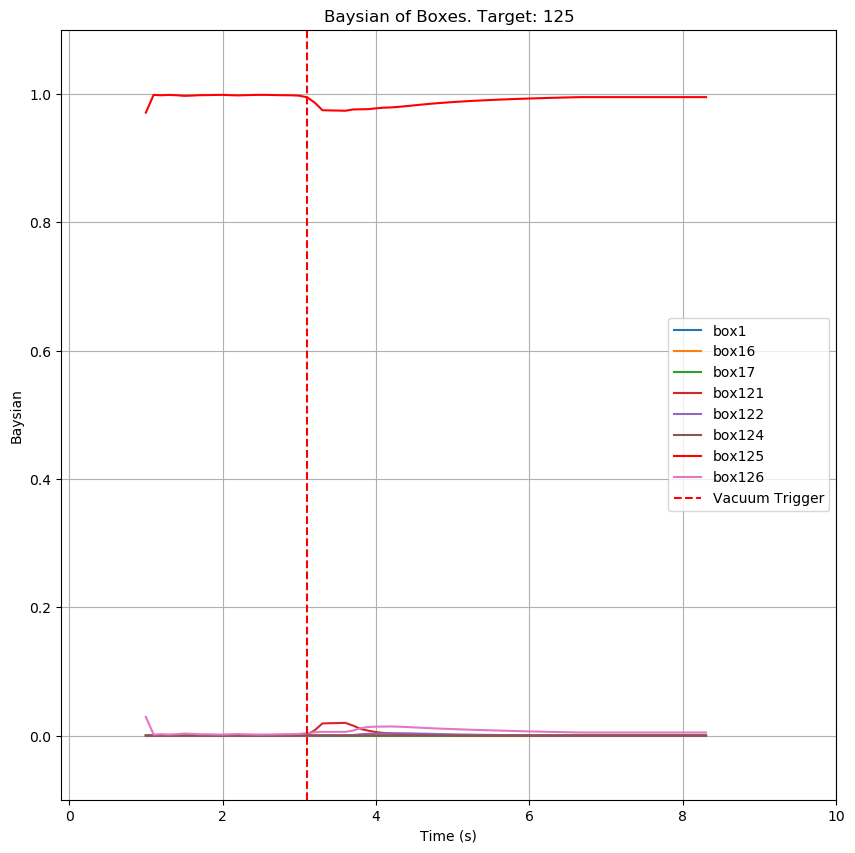

baysian0      baysian1      baysian2      baysian3      baysian4  \
10  7.668798e-13  4.510799e-26  1.758439e-18  7.682337e-35  2.545733e-41   
11  8.623945e-21  8.126366e-43  5.596000e-32  2.017685e-58  1.276100e-68   
12  3.357009e-17  9.900372e-36  1.104890e-28  7.908253e-50  1.129940e-56   
13  4.065796e-18  3.261274e-37  1.950560e-29  3.451288e-52  4.379756e-59   
14  1.382524e-18  2.584299e-36  1.840237e-27  5.039240e-50  7.264082e-57   
..           ...           ...           ...           ...           ...   
79  1.297698e-13  1.541672e-07  9.219307e-09  5.655976e-05  2.288318e-04   
80  1.297698e-13  1.541672e-07  9.219307e-09  5.655976e-05  2.288318e-04   
81  1.297698e-13  1.541672e-07  9.219307e-09  5.655976e-05  2.288318e-04   
82  1.297698e-13  1.541672e-07  9.219307e-09  5.655976e-05  2.288318e-04   
83  1.297698e-13  1.541672e-07  9.219307e-09  5.655976e-05  2.288318e-04   

        baysian5  baysian6  baysian7      baysian8  
10  1.000000e-10  0.970784  0.029216  1.000000e-10  
11  3.020535e-45  0.998443  0.001557  1.081800e-20  
12  1.224952e-71  0.997853  0.002147  1.093138e-20  
13  2.507838e-74  0.998402  0.001598  1.079942e-20  
14  1.351571e-70  0.997901  0.002099  1.092923e-20  
..           ...       ...       ...           ...  
79  3.991853e-06  0.994963  0.004747  2.815081e-15  
80  3.991853e-06  0.994963  0.004747  2.815081e-15  
81  3.991853e-06  0.994963  0.004747  2.815081e-15  
82  3.991853e-06  0.994963  0.004747  2.815081e-15  
83  3.991853e-06  0.994963  0.004747  2.815081e-15  

[74 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      7.668798e-13      4.510799e-26      1.758439e-18      7.682337e-35   
11      1.039517e-08      1.665313e-17      2.941734e-14      2.427800e-24   
12      2.954242e-09      5.438521e-19      3.435903e-15      2.979839e-26   
13      1.274380e-09      5.552723e-19      5.256756e-15      1.072477e-26   
14      9.926229e-10      4.258409e-18      3.203070e-13      4.299200e-24   
..               ...               ...               ...               ...   
79      3.300337e-07      3.597224e-04      8.796717e-05      6.890096e-03   
80      3.300337e-07      3.597224e-04      8.796717e-05      6.890096e-03   
81      3.300337e-07      3.597224e-04      8.796717e-05      6.890096e-03   
82      3.300337e-07      3.597224e-04      8.796717e-05      6.890096e-03   
83      3.300337e-07      3.597224e-04      8.796717e-05      6.890096e-03   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      2.545733e-41      1.000000e-10          0.970784          0.029216   
11      4.633666e-28      2.792137e-35          0.950722          0.049278   
12      2.230776e-29      4.013353e-37          0.960148          0.039852   
13      1.817999e-30      5.786175e-38          0.962868          0.037132   
14      3.655929e-27      2.137262e-33          0.948268          0.051732   
..               ...               ...               ...               ...   
79      1.385893e-02      1.830454e-03          0.913850          0.063122   
80      1.385893e-02      1.830454e-03          0.913850          0.063122   
81      1.385893e-02      1.830454e-03          0.913850          0.063122   
82      1.385893e-02      1.830454e-03          0.913850          0.063122   
83      1.385893e-02      1.830454e-03          0.913850          0.063122   

    field.boxes8.pdf  
10      1.000000e-10  
11      1.000000e-10  
12      1.000000e-10  
13      1.000000e-10  
14      1.000000e-10  
..               ...  
79      4.860903e-08  
80      4.860903e-08  
81      4.860903e-08  
82      4.860903e-08  
83      4.860903e-08  

[74 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box125_data3.csv


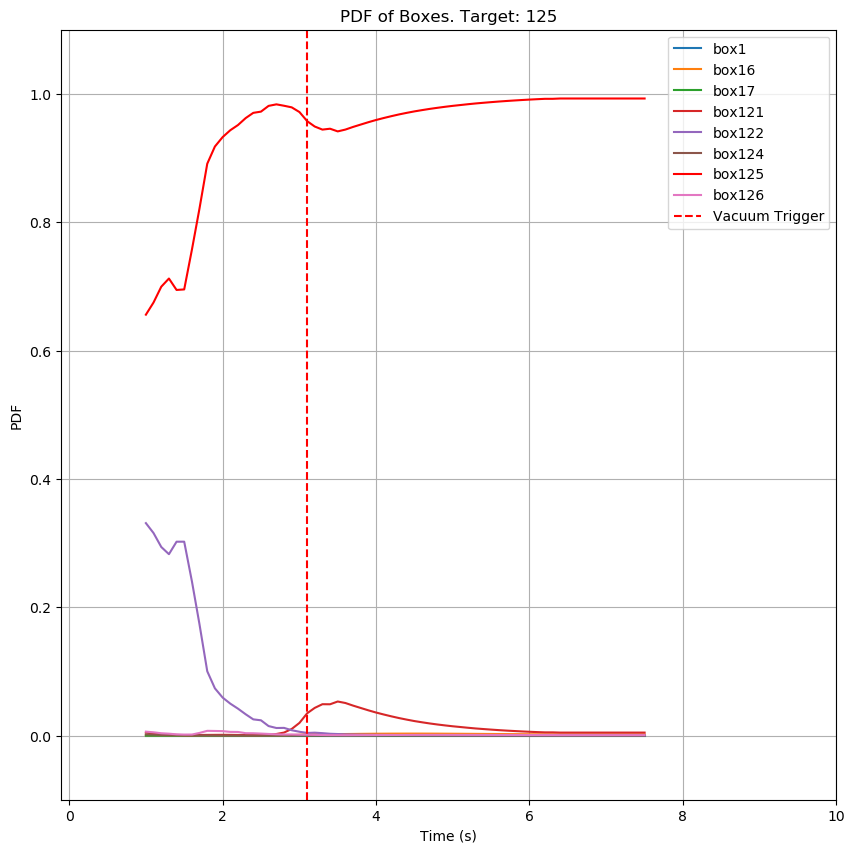

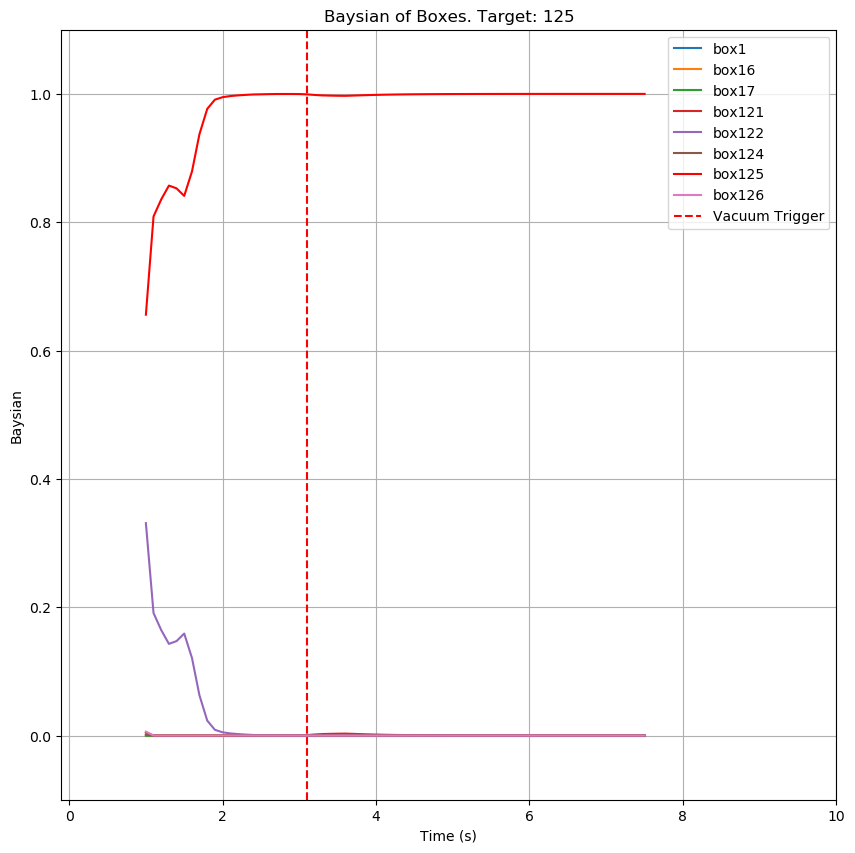

baysian0      baysian1      baysian2  baysian3      baysian4  \
10  6.055287e-09  1.335998e-04  4.196553e-07  0.004872  3.310571e-01   
11  2.677113e-17  1.790736e-08  1.193537e-13  0.000026  1.909401e-01   
12  5.236711e-18  5.420843e-09  2.352207e-14  0.000010  1.641784e-01   
13  4.435954e-19  1.761908e-09  6.729639e-15  0.000005  1.428776e-01   
14  3.093545e-20  3.734313e-10  1.316189e-15  0.000003  1.472173e-01   
..           ...           ...           ...       ...           ...   
71  4.089226e-17  3.186638e-06  1.461459e-27  0.000022  2.609816e-09   
72  4.089226e-17  3.186638e-06  1.461459e-27  0.000022  2.609816e-09   
73  4.089226e-17  3.186638e-06  1.461459e-27  0.000022  2.609816e-09   
74  4.089226e-17  3.186638e-06  1.461459e-27  0.000022  2.609816e-09   
75  4.089226e-17  3.186638e-06  1.461459e-27  0.000022  2.609816e-09   

        baysian5  baysian6      baysian7      baysian8  
10  1.926659e-03  0.655915  6.095698e-03  5.027231e-09  
11  5.228376e-06  0.808973  5.648052e-05  1.340985e-17  
12  2.443557e-06  0.835777  3.217004e-05  9.591660e-19  
13  1.102109e-06  0.857098  1.803262e-05  8.510921e-20  
14  6.244272e-07  0.852770  9.578844e-06  1.025881e-20  
..           ...       ...           ...           ...  
71  2.765950e-20  0.999975  5.582322e-07  1.769191e-57  
72  2.765950e-20  0.999975  5.582322e-07  1.769191e-57  
73  2.765950e-20  0.999975  5.582322e-07  1.769191e-57  
74  2.765950e-20  0.999975  5.582322e-07  1.769191e-57  
75  2.765950e-20  0.999975  5.582322e-07  1.769191e-57  

[66 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      6.055287e-09          0.000134      4.196553e-07          0.004872   
11      2.419256e-09          0.000073      1.556298e-07          0.002871   
12      1.222737e-09          0.000042      8.537662e-08          0.002057   
13      2.108976e-10          0.000025      4.582162e-08          0.001449   
14      8.508200e-11          0.000009      1.666099e-08          0.001002   
..               ...               ...               ...               ...   
71      6.348824e-09          0.001772      3.795475e-14          0.004623   
72      6.348824e-09          0.001772      3.795475e-14          0.004623   
73      6.348824e-09          0.001772      3.795475e-14          0.004623   
74      6.348824e-09          0.001772      3.795475e-14          0.004623   
75      6.348824e-09          0.001772      3.795475e-14          0.004623   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10          0.331057      1.926659e-03          0.655915          0.006096   
11          0.315605      1.484950e-03          0.674895          0.005070   
12          0.293852      9.295374e-04          0.699536          0.003584   
13          0.282653      6.892474e-04          0.712259          0.002925   
14          0.302105      5.254841e-04          0.694459          0.001900   
..               ...               ...               ...               ...   
71          0.000051      1.651182e-10          0.992812          0.000742   
72          0.000051      1.651182e-10          0.992812          0.000742   
73          0.000051      1.651182e-10          0.992812          0.000742   
74          0.000051      1.651182e-10          0.992812          0.000742   
75          0.000051      1.651182e-10          0.992812          0.000742   

    field.boxes8.pdf  
10      5.027231e-09  
11      1.459637e-09  
12      3.711976e-10  
13      1.332874e-10  
14      4.464378e-11  
..               ...  
71      4.175996e-29  
72      4.175996e-29  
73      4.175996e-29  
74      4.175996e-29  
75      4.175996e-29  

[66 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box125_data4.csv


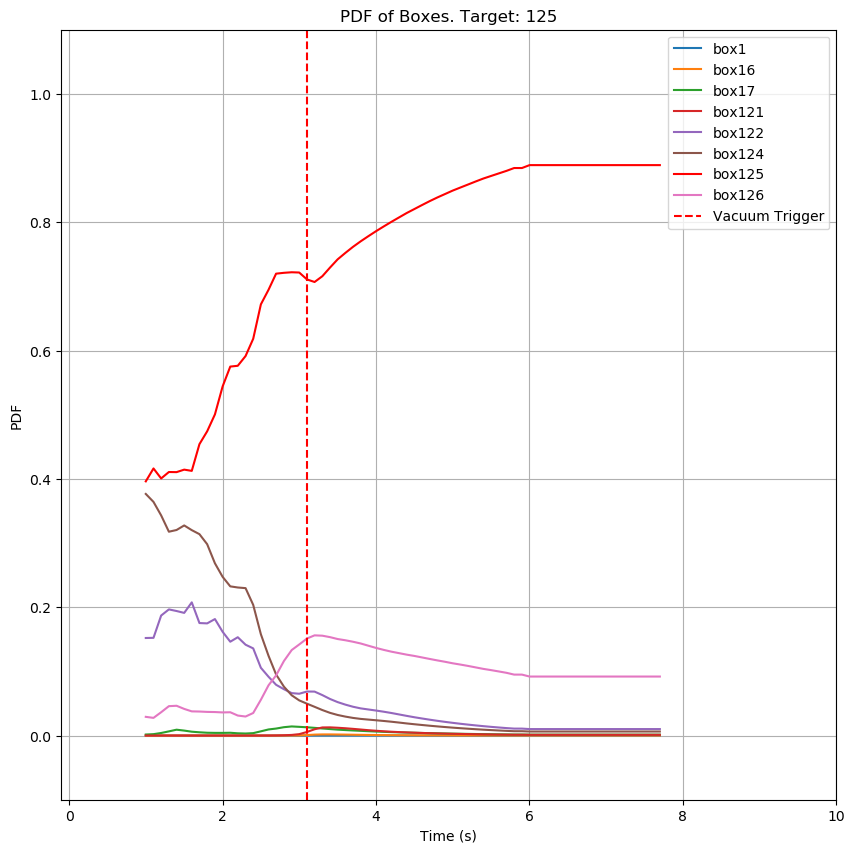

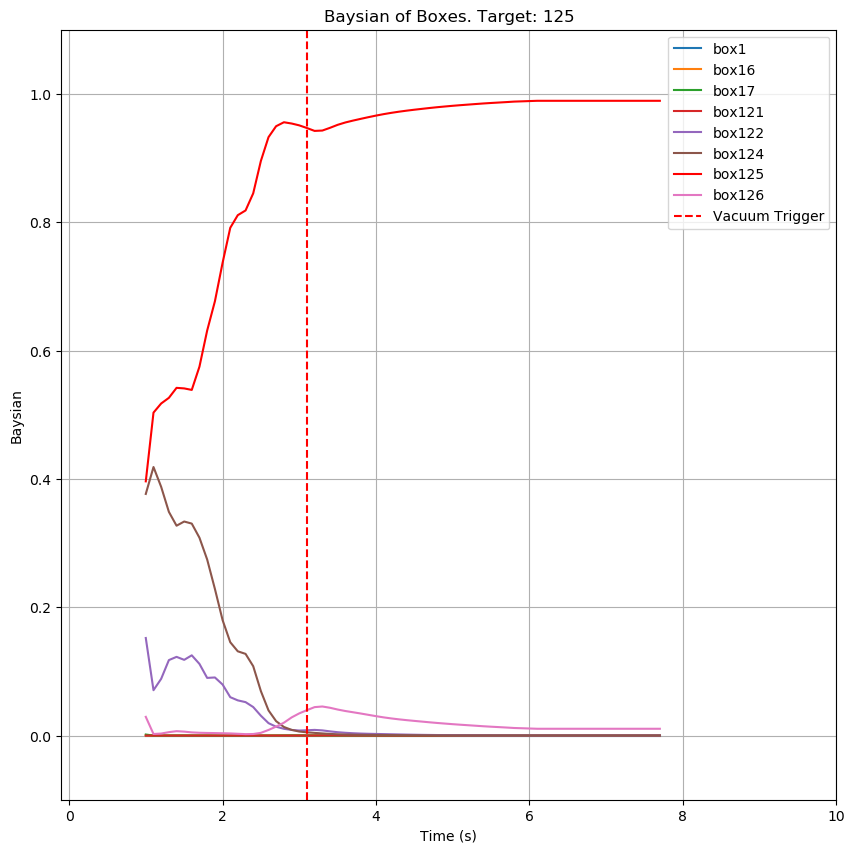

baysian0      baysian1  baysian2      baysian3  baysian4  baysian5  \
10  1.739292e-11  1.629210e-07  0.001608  3.185388e-05  0.152041  0.376539   
11  1.987857e-21  4.725300e-14  0.000011  1.694056e-09  0.070670  0.418480   
12  3.026835e-20  1.338964e-13  0.000027  1.507957e-09  0.088378  0.387641   
13  1.017430e-18  5.901820e-13  0.000083  2.418826e-09  0.117608  0.348588   
14  7.949497e-18  7.086222e-13  0.000191  1.750914e-09  0.122638  0.327051   
..           ...           ...       ...           ...       ...       ...   
73  1.520800e-14  4.178354e-09  0.000003  1.632639e-06  0.000128  0.000049   
74  1.520800e-14  4.178354e-09  0.000003  1.632639e-06  0.000128  0.000049   
75  1.520800e-14  4.178354e-09  0.000003  1.632639e-06  0.000128  0.000049   
76  1.520800e-14  4.178354e-09  0.000003  1.632639e-06  0.000128  0.000049   
77  1.520800e-14  4.178354e-09  0.000003  1.632639e-06  0.000128  0.000049   

    baysian6  baysian7      baysian8  
10  0.396153  0.029154  4.447262e-02  
11  0.503289  0.002453  5.097851e-03  
12  0.517489  0.003109  3.355311e-03  
13  0.526309  0.005326  2.086150e-03  
14  0.541869  0.006834  1.417135e-03  
..       ...       ...           ...  
73  0.989233  0.010585  3.964901e-12  
74  0.989233  0.010585  3.964901e-12  
75  0.989233  0.010585  3.964901e-12  
76  0.989233  0.010585  3.964901e-12  
77  0.989233  0.010585  3.964901e-12  

[68 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      1.739292e-11      1.629210e-07          0.001608          0.000032   
11      3.744674e-11      9.502841e-08          0.002180          0.000017   
12      2.605137e-10      4.541206e-07          0.004007          0.000028   
13      1.221155e-09      4.063606e-07          0.006509          0.000027   
14      2.025608e-09      5.426126e-07          0.009131          0.000020   
..               ...               ...               ...               ...   
73      1.102264e-07      5.777664e-05          0.001450          0.001142   
74      1.102264e-07      5.777664e-05          0.001450          0.001142   
75      1.102264e-07      5.777664e-05          0.001450          0.001142   
76      1.102264e-07      5.777664e-05          0.001450          0.001142   
77      1.102264e-07      5.777664e-05          0.001450          0.001142   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10          0.152041          0.376539          0.396153          0.029154   
11          0.152291          0.364138          0.416251          0.027565   
12          0.187036          0.343099          0.400684          0.036352   
13          0.196612          0.317680          0.410710          0.045808   
14          0.194090          0.320341          0.410530          0.046421   
..               ...               ...               ...               ...   
73          0.010111          0.006282          0.888994          0.091961   
74          0.010111          0.006282          0.888994          0.091961   
75          0.010111          0.006282          0.888994          0.091961   
76          0.010111          0.006282          0.888994          0.091961   
77          0.010111          0.006282          0.888994          0.091961   

    field.boxes8.pdf  
10          0.044473  
11          0.037557  
12          0.028793  
13          0.022654  
14          0.019465  
..               ...  
73          0.000002  
74          0.000002  
75          0.000002  
76          0.000002  
77          0.000002  

[68 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box126_data0.csv


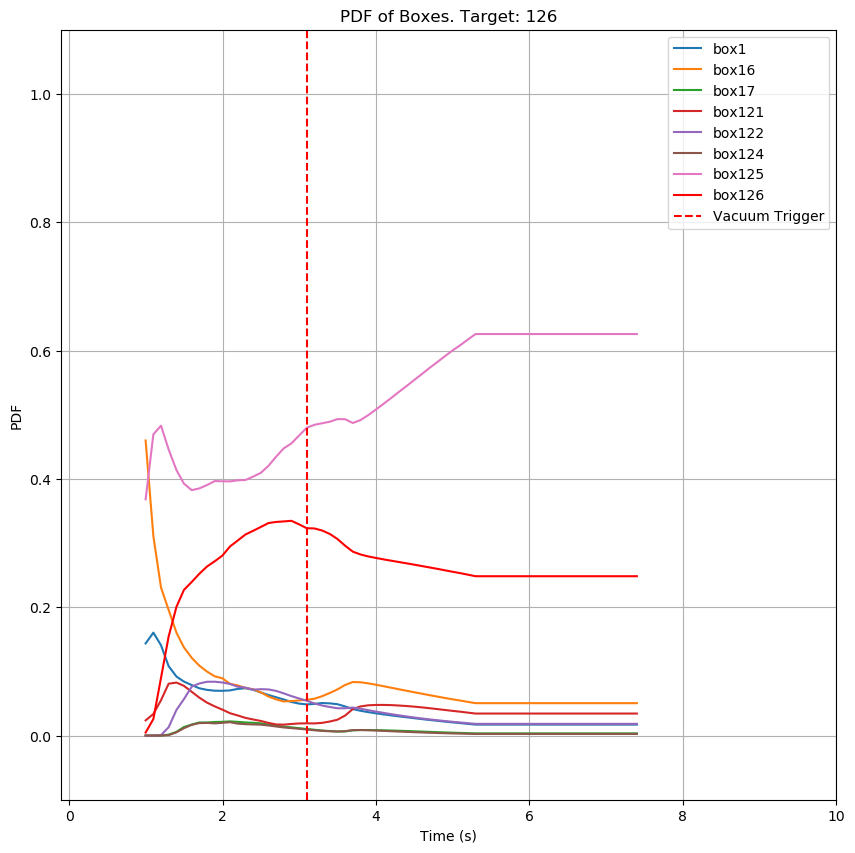

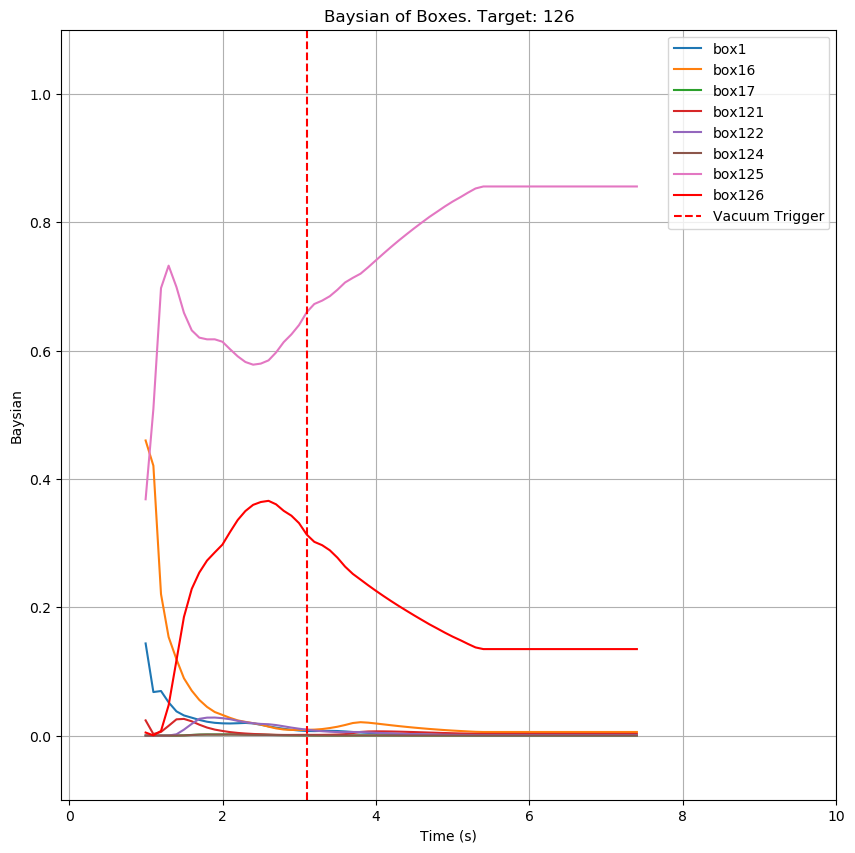

baysian0  baysian1      baysian2  baysian3      baysian4      baysian5  \
10  0.143556  0.459867  4.573978e-11  0.023663  3.730649e-09  3.520496e-14   
11  0.067782  0.420575  2.065512e-17  0.002343  4.971743e-14  2.267542e-22   
12  0.069418  0.220387  2.594839e-11  0.005701  9.119307e-09  4.971292e-14   
13  0.051780  0.153601  2.664486e-07  0.015139  2.881285e-05  1.675572e-08   
14  0.037676  0.118905  3.129522e-05  0.025277  1.958959e-03  1.276300e-05   
..       ...       ...           ...       ...           ...           ...   
70  0.000638  0.005565  2.557964e-05  0.002570  7.254508e-04  1.335395e-05   
71  0.000638  0.005565  2.557964e-05  0.002570  7.254508e-04  1.335395e-05   
72  0.000638  0.005565  2.557964e-05  0.002570  7.254508e-04  1.335395e-05   
73  0.000638  0.005565  2.557964e-05  0.002570  7.254508e-04  1.335395e-05   
74  0.000638  0.005565  2.557964e-05  0.002570  7.254508e-04  1.335395e-05   

    baysian6  baysian7      baysian8  
10  0.368238  0.004676  7.193183e-34  
11  0.508945  0.000355  3.673678e-55  
12  0.697355  0.007139  3.501030e-35  
13  0.732297  0.047153  1.736944e-21  
14  0.698939  0.117201  3.720209e-14  
..       ...       ...           ...  
70  0.855717  0.134745  4.368405e-15  
71  0.855717  0.134745  4.368405e-15  
72  0.855717  0.134745  4.368405e-15  
73  0.855717  0.134745  4.368405e-15  
74  0.855717  0.134745  4.368405e-15  

[65 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10          0.143556          0.459867      4.573978e-11          0.023663   
11          0.160393          0.310672      1.533996e-07          0.033629   
12          0.140707          0.230628      5.499391e-05          0.055115   
13          0.108218          0.195854      1.424786e-03          0.080773   
14          0.091903          0.160263      5.798239e-03          0.082609   
..               ...               ...               ...               ...   
70          0.017087          0.050463      3.421174e-03          0.034295   
71          0.017087          0.050463      3.421174e-03          0.034295   
72          0.017087          0.050463      3.421174e-03          0.034295   
73          0.017087          0.050463      3.421174e-03          0.034295   
74          0.017087          0.050463      3.421174e-03          0.034295   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      3.730649e-09      3.520496e-14          0.368238          0.004676   
11      4.527046e-06      2.187974e-09          0.469497          0.025805   
12      6.549006e-04      7.386787e-06          0.482891          0.089941   
13      1.293783e-02      6.670497e-04          0.445952          0.154173   
14      3.996975e-02      5.050826e-03          0.413731          0.200673   
..               ...               ...               ...               ...   
70      1.821931e-02      2.471911e-03          0.625739          0.248305   
71      1.821931e-02      2.471911e-03          0.625739          0.248305   
72      1.821931e-02      2.471911e-03          0.625739          0.248305   
73      1.821931e-02      2.471911e-03          0.625739          0.248305   
74      1.821931e-02      2.471911e-03          0.625739          0.248305   

    field.boxes8.pdf  
10      7.193183e-34  
11      1.734884e-22  
12      6.560754e-14  
13      7.785435e-09  
14      1.261398e-06  
..               ...  
70      4.470842e-08  
71      4.470842e-08  
72      4.470842e-08  
73      4.470842e-08  
74      4.470842e-08  

[65 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box126_data1.csv


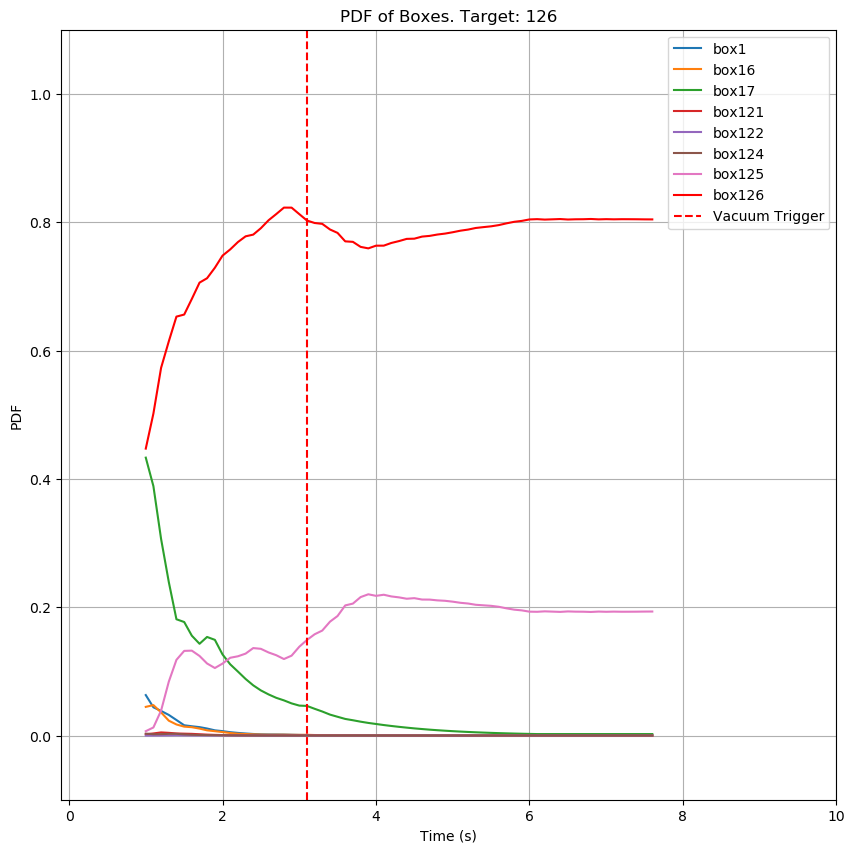

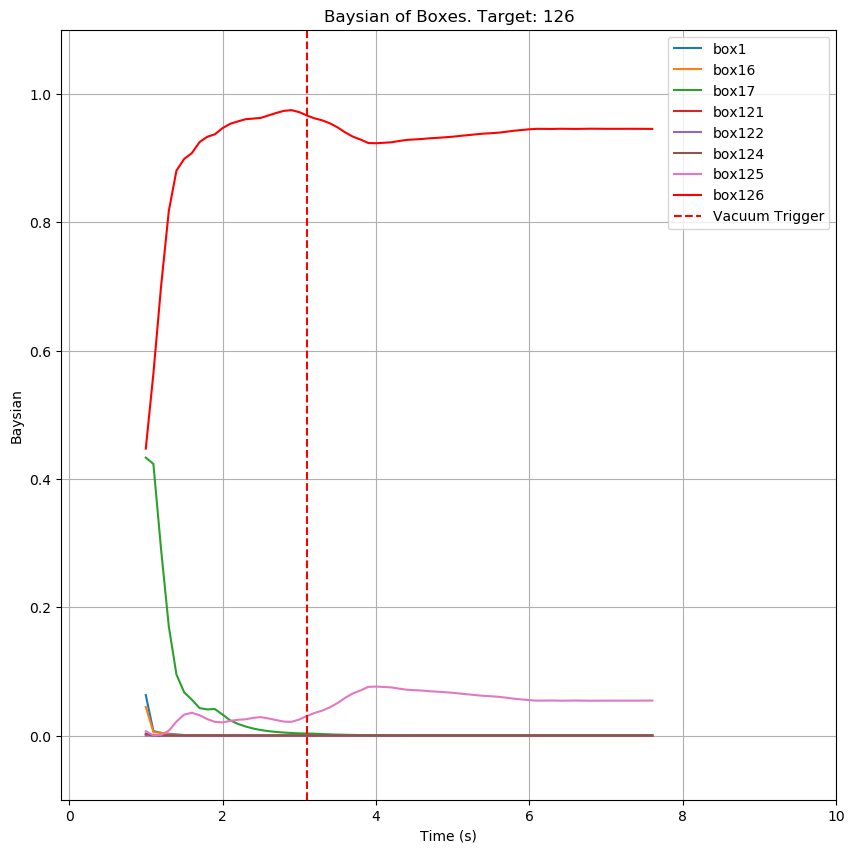

baysian0      baysian1  baysian2      baysian3      baysian4  \
10  6.308114e-02  4.469677e-02  0.433116  1.994532e-03  2.024821e-05   
11  6.985747e-03  5.331946e-03  0.423269  1.653076e-05  1.087607e-09   
12  4.117540e-03  4.169219e-03  0.290104  3.924655e-05  4.258356e-09   
13  2.864626e-03  1.941478e-03  0.170177  4.790445e-05  4.470654e-08   
14  1.709043e-03  8.793012e-04  0.095161  3.032539e-05  2.055992e-07   
..           ...           ...       ...           ...           ...   
72  2.792399e-10  1.617151e-11  0.000008  3.397058e-14  1.570034e-13   
73  2.792554e-10  1.617241e-11  0.000008  3.397247e-14  1.570121e-13   
74  2.792446e-10  1.617179e-11  0.000008  3.397115e-14  1.570060e-13   
75  2.792223e-10  1.617049e-11  0.000008  3.396844e-14  1.569935e-13   
76  2.792006e-10  1.616923e-11  0.000008  3.396579e-14  1.569812e-13   

        baysian5  baysian6  baysian7      baysian8  
10  3.027481e-03  0.006803  0.447186  7.488613e-05  
11  1.581567e-05  0.000216  0.564165  5.670404e-09  
12  1.129757e-05  0.001194  0.700365  7.862633e-10  
13  1.368780e-05  0.007585  0.817370  1.095160e-10  
14  1.569313e-05  0.021756  0.880448  1.918253e-11  
..           ...       ...       ...           ...  
72  1.276025e-13  0.054432  0.945560  1.972663e-36  
73  1.276096e-13  0.054380  0.945613  1.972772e-36  
74  1.276046e-13  0.054416  0.945576  1.972696e-36  
75  1.275945e-13  0.054492  0.945500  1.972538e-36  
76  1.275845e-13  0.054565  0.945427  1.972385e-36  

[67 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10          0.063081          0.044697          0.433116      1.994532e-03   
11          0.044046          0.047447          0.388694      3.296456e-03   
12          0.038379          0.036076          0.306417      4.887889e-03   
13          0.032148          0.023179          0.239204      4.221175e-03   
14          0.024219          0.017282          0.181239      3.272920e-03   
..               ...               ...               ...               ...   
72          0.000014          0.000003          0.002311      1.525283e-07   
73          0.000014          0.000003          0.002310      1.525213e-07   
74          0.000014          0.000003          0.002310      1.525073e-07   
75          0.000014          0.000003          0.002310      1.524782e-07   
76          0.000014          0.000003          0.002310      1.524652e-07   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      2.024821e-05      3.027481e-03          0.006803          0.447186   
11      2.136392e-05      2.077789e-03          0.012607          0.501780   
12      8.183290e-05      2.232289e-03          0.038885          0.573030   
13      2.353000e-04      2.640961e-03          0.084012          0.614356   
14      3.980722e-04      2.707134e-03          0.117979          0.652899   
..               ...               ...               ...               ...   
72      3.279091e-07      2.956164e-07          0.192954          0.804718   
73      3.278941e-07      2.956029e-07          0.192991          0.804681   
74      3.278639e-07      2.955757e-07          0.193065          0.804607   
75      3.278013e-07      2.955192e-07          0.193219          0.804453   
76      3.277735e-07      2.954942e-07          0.193288          0.804385   

    field.boxes8.pdf  
10      7.488613e-05  
11      3.011675e-05  
12      1.071832e-05  
13      4.400779e-06  
14      1.985815e-06  
..               ...  
72      1.162319e-18  
73      1.162266e-18  
74      1.162159e-18  
75      1.161937e-18  
76      1.161838e-18  

[67 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box126_data2.csv


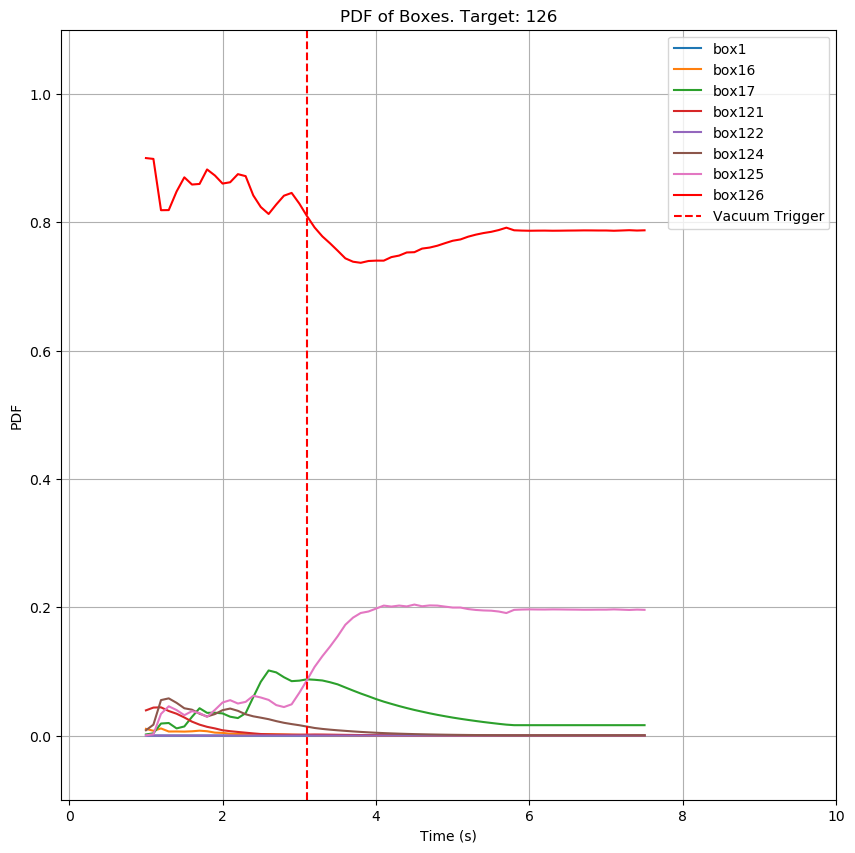

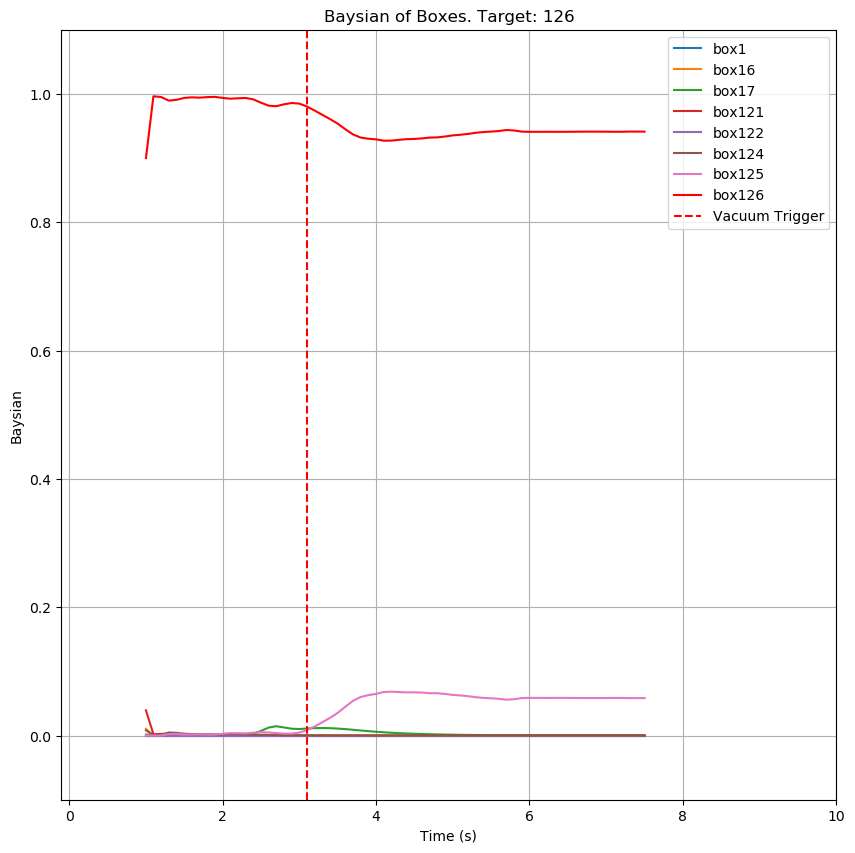

baysian0      baysian1  baysian2      baysian3      baysian4  \
10  6.929765e-12  1.042873e-02  0.001714  3.927115e-02  1.359653e-10   
11  1.690514e-21  9.529393e-05  0.000007  2.109218e-03  1.790487e-18   
12  4.001880e-17  1.110877e-04  0.000088  2.593796e-03  1.971751e-13   
13  2.286601e-14  1.028617e-04  0.000541  2.483010e-03  4.341107e-10   
14  5.695402e-15  5.722145e-05  0.000311  1.855484e-03  3.727696e-10   
..           ...           ...       ...           ...           ...   
71  8.535479e-21  1.394461e-11  0.000397  9.609512e-09  2.029450e-13   
72  8.535526e-21  1.394469e-11  0.000397  9.609564e-09  2.029461e-13   
73  8.538315e-21  1.394925e-11  0.000398  9.612704e-09  2.030124e-13   
74  8.538063e-21  1.394884e-11  0.000398  9.612421e-09  2.030064e-13   
75  8.537488e-21  1.394790e-11  0.000398  9.611773e-09  2.029928e-13   

        baysian5      baysian6  baysian7      baysian8  
10  8.278312e-03  3.052999e-04  0.899959  4.004314e-02  
11  1.726706e-04  8.020534e-07  0.996246  1.368732e-03  
12  1.265639e-03  9.731299e-05  0.995152  6.921838e-04  
13  4.726941e-03  2.271396e-03  0.989511  3.642862e-04  
14  4.213820e-03  2.586123e-03  0.990788  1.882176e-04  
..           ...           ...       ...           ...  
71  2.513796e-07  5.863642e-02  0.940966  1.517593e-14  
72  2.513810e-07  5.863128e-02  0.940971  1.517602e-14  
73  2.514631e-07  5.832365e-02  0.941279  1.518097e-14  
74  2.514557e-07  5.835139e-02  0.941251  1.518053e-14  
75  2.514388e-07  5.841486e-02  0.941187  1.517950e-14  

[66 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      6.929765e-12          0.010429          0.001714          0.039271   
11      1.980427e-10          0.007418          0.003491          0.043602   
12      1.494059e-07          0.011072          0.018741          0.043984   
13      1.037024e-07          0.006295          0.019558          0.038252   
14      3.849097e-08          0.006371          0.011137          0.033996   
..               ...               ...               ...               ...   
71      7.492696e-11          0.000003          0.016168          0.000080   
72      7.496637e-11          0.000003          0.016177          0.000080   
73      7.500914e-11          0.000003          0.016186          0.000080   
74      7.495894e-11          0.000003          0.016175          0.000080   
75      7.499219e-11          0.000003          0.016182          0.000080   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      1.359653e-10          0.008278          0.000305          0.899959   
11      1.069059e-08          0.016933          0.002133          0.898674   
12      1.363681e-05          0.055263          0.033736          0.818746   
13      2.157018e-05          0.057957          0.045621          0.818912   
14      1.211184e-05          0.050955          0.039729          0.847944   
..               ...               ...               ...               ...   
71      3.653536e-07          0.000407          0.196639          0.786704   
72      3.655457e-07          0.000407          0.196216          0.787117   
73      3.657543e-07          0.000407          0.195758          0.787566   
74      3.655095e-07          0.000407          0.196296          0.787039   
75      3.656716e-07          0.000407          0.195939          0.787388   

    field.boxes8.pdf  
10      4.004314e-02  
11      2.774909e-02  
12      1.844315e-02  
13      1.338363e-02  
14      9.856205e-03  
..               ...  
71      9.990837e-08  
72      9.996092e-08  
73      1.000180e-07  
74      9.995101e-08  
75      9.999534e-08  

[66 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box126_data3.csv


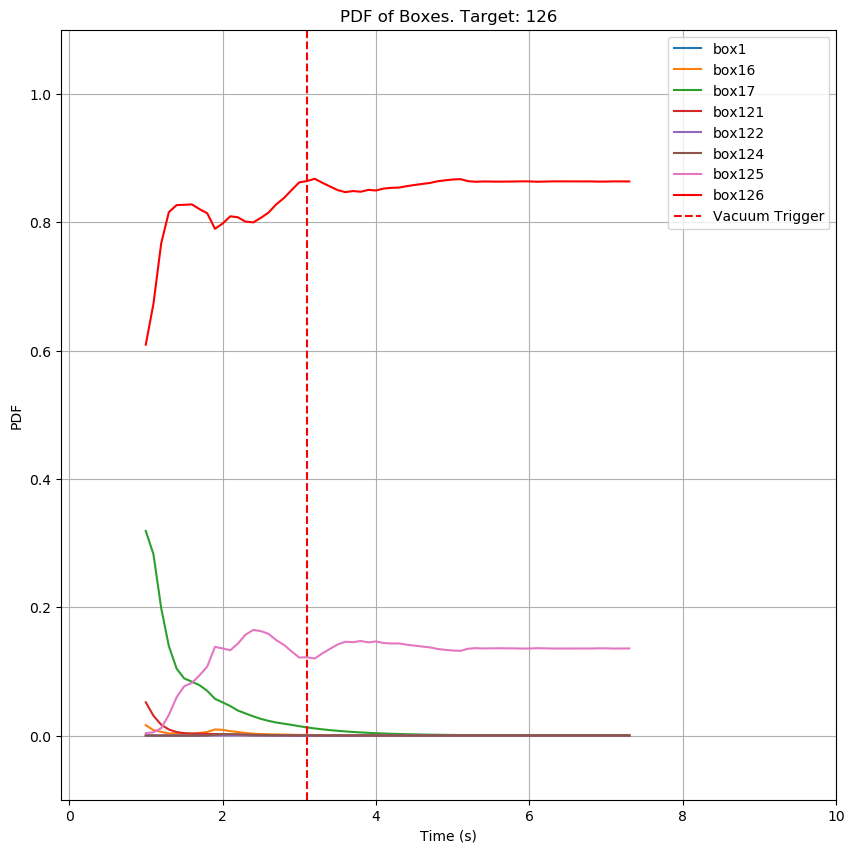

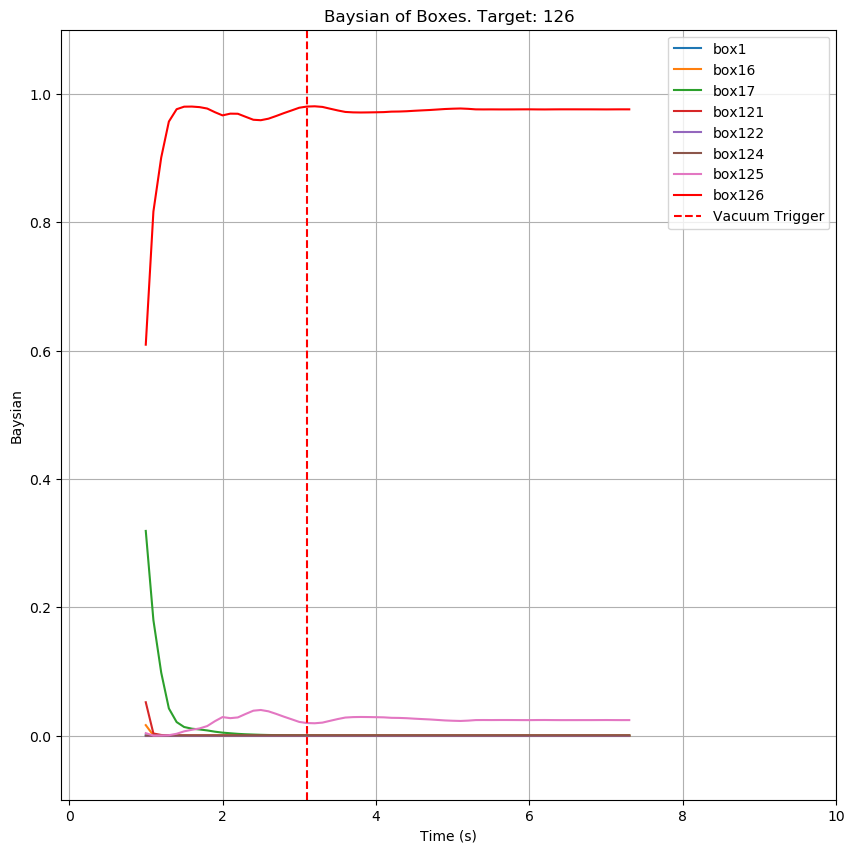

baysian0      baysian1      baysian2      baysian3      baysian4  \
10  4.321837e-05  1.623781e-02  3.189095e-01  5.192122e-02  1.385628e-14   
11  2.421871e-09  2.747391e-04  1.798611e-01  3.211809e-03  5.347150e-28   
12  1.024358e-09  8.672748e-05  9.811165e-02  9.130548e-04  5.085969e-27   
13  1.952619e-09  2.937729e-05  4.228515e-02  2.435488e-04  2.386643e-24   
14  1.321317e-08  1.756374e-05  2.102343e-02  7.466560e-05  6.478704e-21   
..           ...           ...           ...           ...           ...   
69  8.511888e-13  6.564018e-11  6.726805e-07  2.125811e-13  5.534638e-13   
70  8.511457e-13  6.563686e-11  6.726465e-07  2.125703e-13  5.534358e-13   
71  8.512070e-13  6.564158e-11  6.726949e-07  2.125856e-13  5.534757e-13   
72  8.512477e-13  6.564472e-11  6.727271e-07  2.125958e-13  5.535021e-13   
73  8.512306e-13  6.564340e-11  6.727136e-07  2.125915e-13  5.534910e-13   

        baysian5  baysian6  baysian7      baysian8  
10  2.110612e-09  0.003732  0.609156  1.382872e-12  
11  1.237102e-17  0.000037  0.816615  1.259791e-24  
12  3.146347e-17  0.000101  0.900787  2.652731e-25  
13  3.858611e-16  0.000568  0.956874  2.694823e-25  
14  1.491992e-14  0.002780  0.976104  1.786243e-24  
..           ...       ...       ...           ...  
69  3.278776e-12  0.024143  0.975857  3.008560e-34  
70  3.278610e-12  0.024192  0.975807  3.008408e-34  
71  3.278846e-12  0.024122  0.975878  3.008625e-34  
72  3.279003e-12  0.024075  0.975924  3.008768e-34  
73  3.278937e-12  0.024095  0.975905  3.008708e-34  

[64 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      4.321837e-05          0.016238          0.318910      5.192122e-02   
11      2.811192e-05          0.008488          0.282929      3.103222e-02   
12      2.086904e-05          0.005852          0.198602      1.685099e-02   
13      6.119188e-05          0.003283          0.139246      9.452341e-03   
14      1.491891e-04          0.003696          0.104315      5.457643e-03   
..               ...               ...               ...               ...   
69      8.062737e-07          0.000007          0.000717      4.029321e-07   
70      8.063393e-07          0.000007          0.000717      4.029648e-07   
71      8.066001e-07          0.000007          0.000717      4.030952e-07   
72      8.065564e-07          0.000007          0.000717      4.030734e-07   
73      8.065089e-07          0.000007          0.000717      4.030496e-07   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      1.385628e-14      2.110612e-09          0.003732          0.609156   
11      1.935904e-14      2.940392e-09          0.005016          0.672507   
12      1.504635e-13      6.128338e-09          0.011548          0.767126   
13      1.037373e-11      4.117816e-08          0.032190          0.815767   
14      4.314963e-10      2.503360e-07          0.059671          0.826711   
..               ...               ...               ...               ...   
69      6.501509e-07      1.582433e-06          0.135971          0.863302   
70      6.502038e-07      1.582562e-06          0.135901          0.863372   
71      6.504141e-07      1.583074e-06          0.135621          0.863651   
72      6.503789e-07      1.582988e-06          0.135668          0.863604   
73      6.503405e-07      1.582895e-06          0.135719          0.863553   

    field.boxes8.pdf  
10      1.382872e-12  
11      4.570086e-13  
12      3.324377e-13  
13      5.301500e-13  
14      2.327908e-12  
..               ...  
69      1.515824e-17  
70      1.515948e-17  
71      1.516438e-17  
72      1.516356e-17  
73      1.516267e-17  

[64 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box126_data4.csv


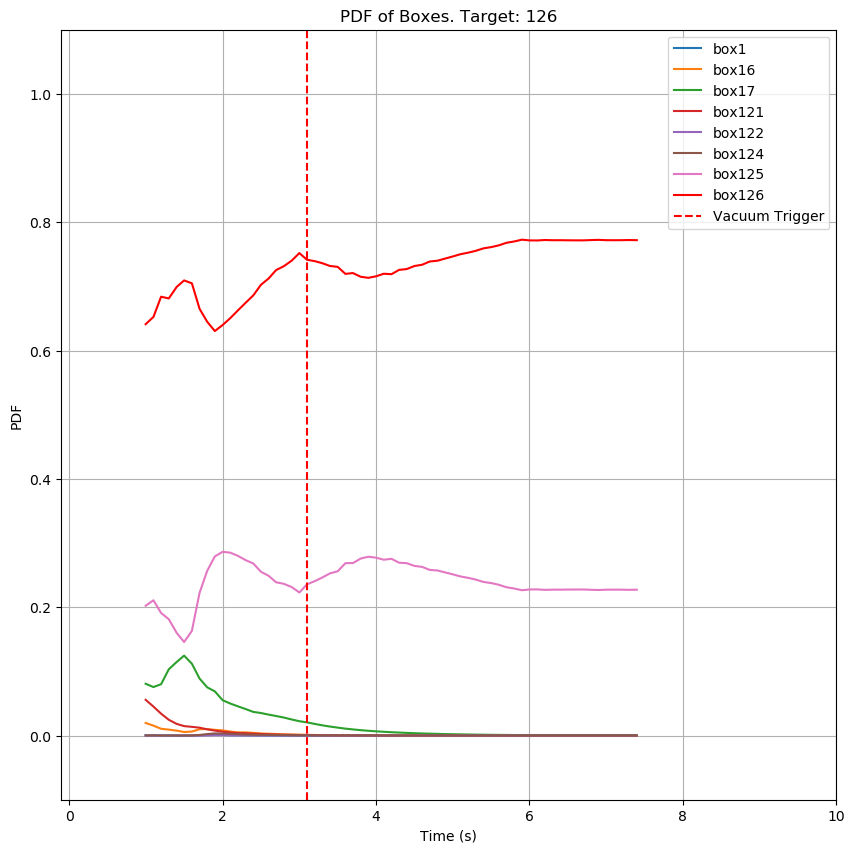

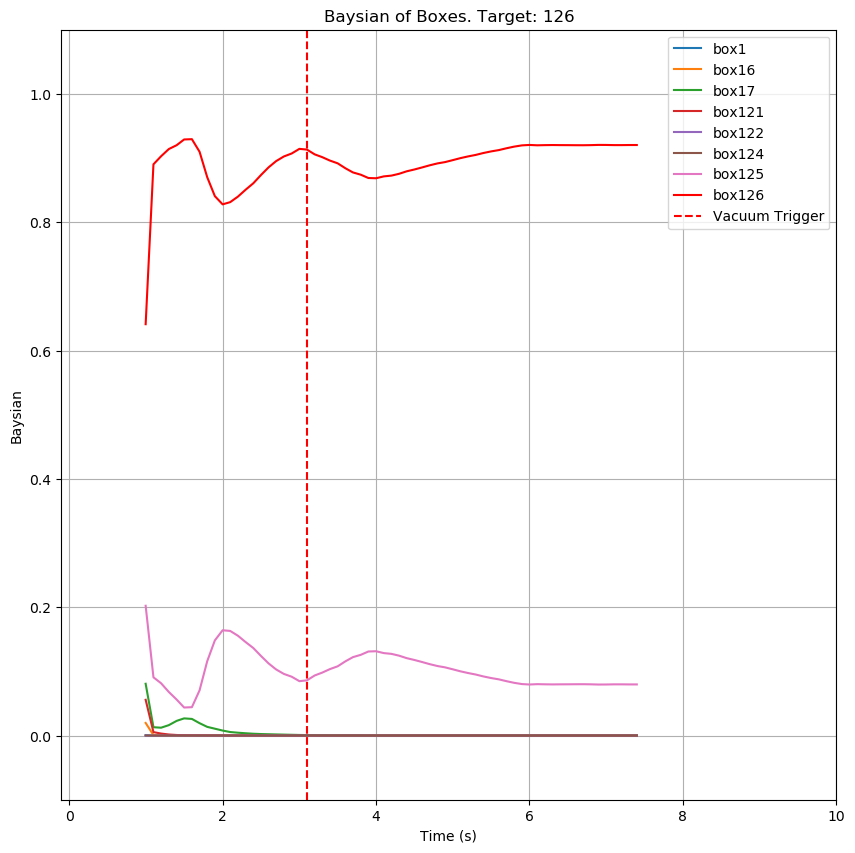

baysian0      baysian1      baysian2      baysian3      baysian4  \
10  4.483178e-04  1.964718e-02  8.071600e-02  5.571484e-02  2.349697e-06   
11  2.972979e-07  6.460892e-04  1.298517e-02  5.350879e-03  3.058203e-11   
12  9.295627e-08  3.306919e-04  1.223874e-02  3.115218e-03  3.080403e-11   
13  7.506897e-08  1.922464e-04  1.622135e-02  1.642265e-03  7.409933e-12   
14  7.946960e-08  1.375156e-04  2.288925e-02  8.626575e-04  1.712654e-12   
..           ...           ...           ...           ...           ...   
70  3.700769e-15  2.174541e-11  6.506462e-07  3.069589e-12  2.018745e-13   
71  3.699802e-15  2.173973e-11  6.504762e-07  3.068787e-12  2.018217e-13   
72  3.699781e-15  2.173960e-11  6.504724e-07  3.068769e-12  2.018205e-13   
73  3.700287e-15  2.174258e-11  6.505614e-07  3.069189e-12  2.018482e-13   
74  3.700348e-15  2.174293e-11  6.505721e-07  3.069240e-12  2.018515e-13   

        baysian5  baysian6  baysian7      baysian8  
10  1.311635e-04  0.202255  0.641085  1.803452e-07  
11  6.498007e-08  0.090765  0.890252  1.865683e-13  
12  7.457593e-08  0.081483  0.902832  2.780037e-13  
13  2.862434e-08  0.067929  0.914015  4.994299e-14  
14  9.848470e-09  0.056055  0.920055  6.546590e-15  
..           ...       ...       ...           ...  
70  1.198499e-11  0.079575  0.920424  4.012839e-31  
71  1.198186e-11  0.079815  0.920184  4.011791e-31  
72  1.198179e-11  0.079821  0.920179  4.011767e-31  
73  1.198343e-11  0.079695  0.920305  4.012316e-31  
74  1.198363e-11  0.079680  0.920320  4.012383e-31  

[65 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      4.483178e-04          0.019647          0.080716          0.055715   
11      3.115673e-04          0.015450          0.075585          0.045123   
12      1.474637e-04          0.010579          0.080031          0.034123   
13      2.595041e-04          0.009264          0.103323          0.024534   
14      1.585304e-04          0.007685          0.114681          0.018202   
..               ...               ...               ...               ...   
70      4.895330e-08          0.000004          0.000649          0.000001   
71      4.894825e-08          0.000004          0.000649          0.000001   
72      4.895248e-08          0.000004          0.000649          0.000001   
73      4.896734e-08          0.000004          0.000649          0.000001   
74      4.895479e-08          0.000004          0.000649          0.000001   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      2.349697e-06          0.000131          0.202255          0.641085   
11      6.115057e-06          0.000233          0.210847          0.652444   
12      2.489805e-06          0.000158          0.191012          0.683946   
13      1.517112e-06          0.000092          0.181287          0.681240   
14      5.843965e-07          0.000055          0.160069          0.699149   
..               ...               ...               ...               ...   
70      3.615569e-07          0.000003          0.227320          0.772023   
71      3.615196e-07          0.000003          0.227400          0.771943   
72      3.615509e-07          0.000003          0.227333          0.772010   
73      3.616606e-07          0.000003          0.227098          0.772244   
74      3.615679e-07          0.000003          0.227296          0.772046   

    field.boxes8.pdf  
10      1.803452e-07  
11      4.860482e-07  
12      2.827024e-07  
13      9.005623e-08  
14      3.763198e-08  
..               ...  
70      5.097554e-16  
71      5.097028e-16  
72      5.097469e-16  
73      5.099017e-16  
74      5.097709e-16  

[65 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box16_data0.csv


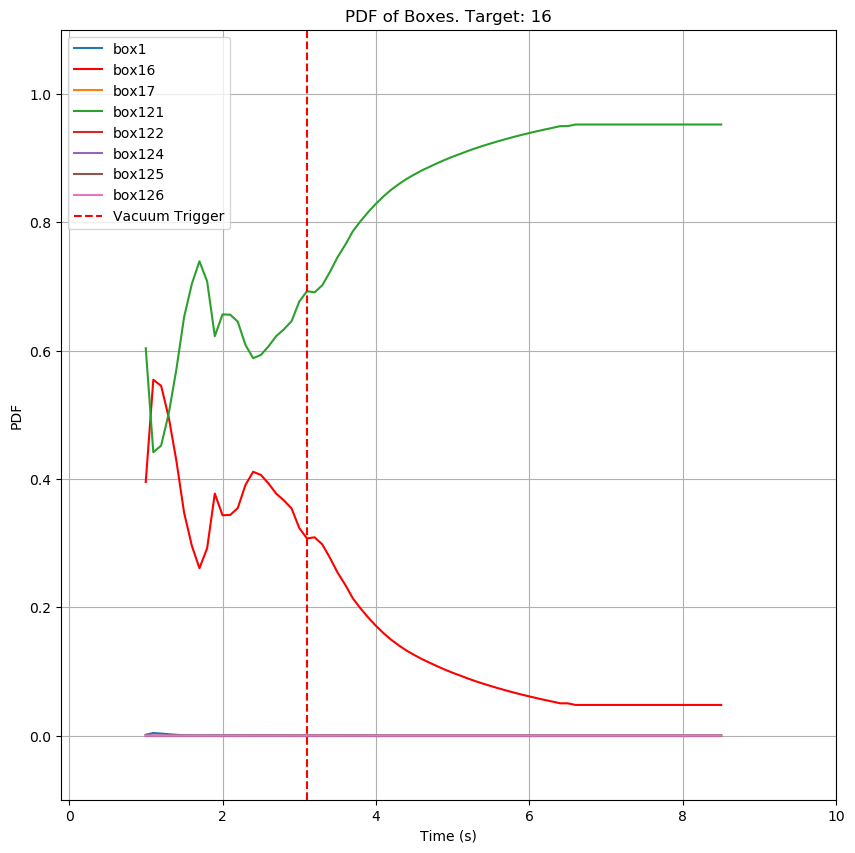

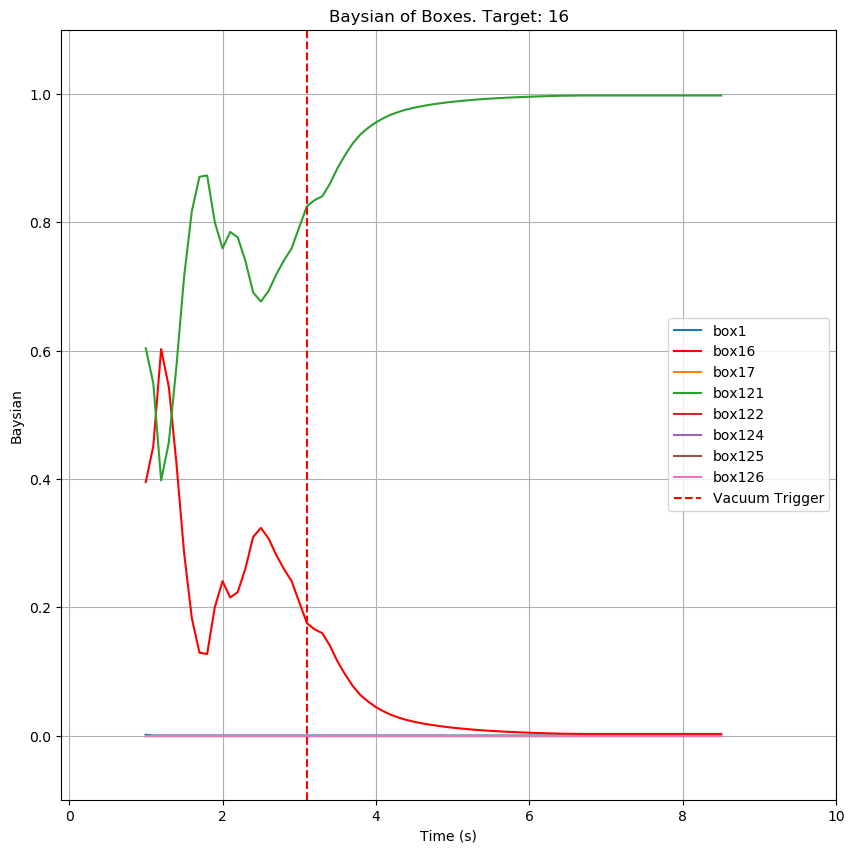

baysian0  baysian1      baysian2  baysian3      baysian4  \
10  1.313265e-03  0.395032  6.416896e-21  0.603655  4.941423e-33   
11  1.069583e-05  0.451080  1.034446e-39  0.548909  9.330694e-65   
12  2.447555e-05  0.602330  3.115214e-38  0.397646  1.361840e-63   
13  1.300526e-05  0.542858  3.160565e-36  0.457129  7.982856e-58   
14  4.966417e-06  0.424241  1.316899e-34  0.575754  1.923202e-51   
..           ...       ...           ...       ...           ...   
81  3.137558e-15  0.002505  1.305471e-44  0.997495  5.864141e-35   
82  3.137558e-15  0.002505  1.305471e-44  0.997495  5.864141e-35   
83  3.137558e-15  0.002505  1.305471e-44  0.997495  5.864141e-35   
84  3.137558e-15  0.002505  1.305471e-44  0.997495  5.864141e-35   
85  3.137558e-15  0.002505  1.305471e-44  0.997495  5.864141e-35   

        baysian5      baysian6      baysian7      baysian8  
10  2.431465e-33  1.717126e-12  3.277815e-13  1.000000e-10  
11  5.875061e-65  6.163979e-24  5.258617e-25  2.059337e-20  
12  1.561923e-63  9.356338e-24  2.070292e-24  1.993023e-20  
13  1.997795e-58  1.186566e-21  1.407984e-22  1.612189e-51  
14  5.870418e-53  4.608592e-19  1.487069e-20  1.176889e-81  
..           ...           ...           ...           ...  
81  1.659840e-48  1.467428e-10  9.701699e-20  1.099996e-20  
82  1.659840e-48  1.467428e-10  9.701699e-20  1.099996e-20  
83  1.659840e-48  1.467428e-10  9.701699e-20  1.099996e-20  
84  1.659840e-48  1.467428e-10  9.701699e-20  1.099996e-20  
85  1.659840e-48  1.467428e-10  9.701699e-20  1.099996e-20  

[76 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      1.313265e-03          0.395032      6.416896e-21          0.603655   
11      3.954892e-03          0.554491      7.828085e-20          0.441555   
12      3.105170e-03          0.545039      1.996733e-19          0.451856   
13      2.081789e-03          0.495064      7.867699e-18          0.502854   
14      1.190266e-03          0.427551      8.351070e-18          0.571259   
..               ...               ...               ...               ...   
81      5.340726e-08          0.047719      1.089401e-22          0.952269   
82      5.340726e-08          0.047719      1.089401e-22          0.952269   
83      5.340726e-08          0.047719      1.089401e-22          0.952269   
84      5.340726e-08          0.047719      1.089401e-22          0.952269   
85      5.340726e-08          0.047719      1.089401e-22          0.952269   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      4.941423e-33      2.431465e-33      1.717126e-12      3.277815e-13   
11      9.169264e-33      1.173321e-32      1.743138e-12      7.790398e-13   
12      7.452107e-32      6.679289e-32      2.693158e-12      1.333397e-12   
13      5.324541e-27      1.486701e-27      2.189943e-10      5.248571e-11   
14      1.802105e-25      1.970075e-26      1.049960e-09      1.413603e-10   
..               ...               ...               ...               ...   
81      7.301407e-18      1.228393e-24      1.155002e-05      2.969807e-10   
82      7.301407e-18      1.228393e-24      1.155002e-05      2.969807e-10   
83      7.301407e-18      1.228393e-24      1.155002e-05      2.969807e-10   
84      7.301407e-18      1.228393e-24      1.155002e-05      2.969807e-10   
85      7.301407e-18      1.228393e-24      1.155002e-05      2.969807e-10   

    field.boxes8.pdf  
10      1.000000e-10  
11      1.000000e-10  
12      1.000000e-10  
13      8.013439e-42  
14      7.327471e-41  
..               ...  
81      1.000000e-10  
82      1.000000e-10  
83      1.000000e-10  
84      1.000000e-10  
85      1.000000e-10  

[76 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box16_data1.csv


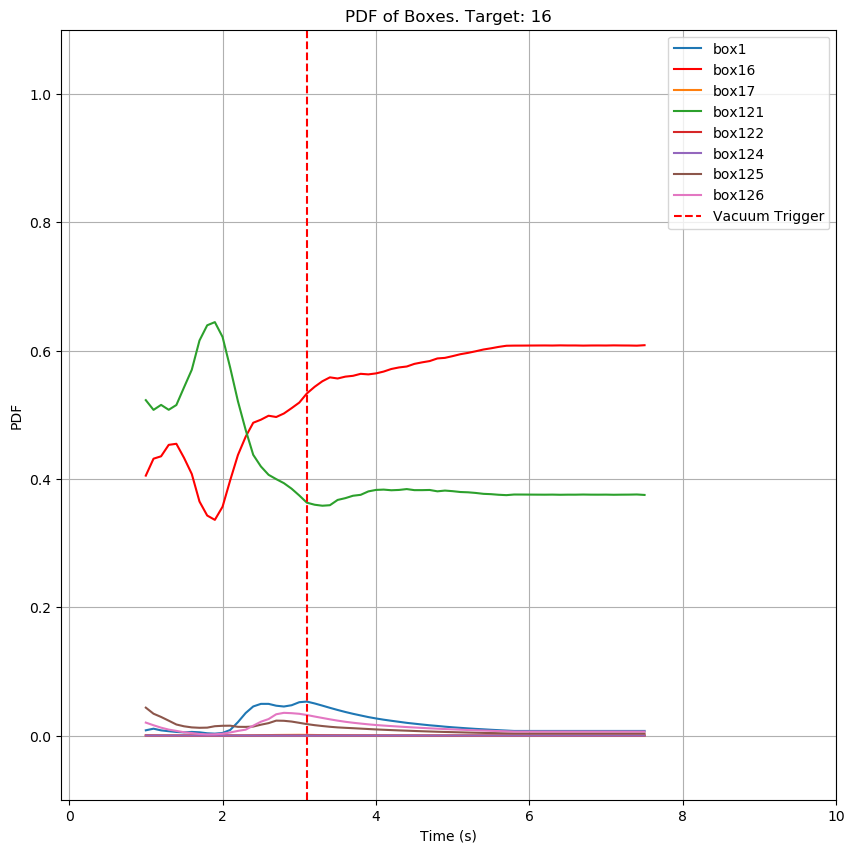

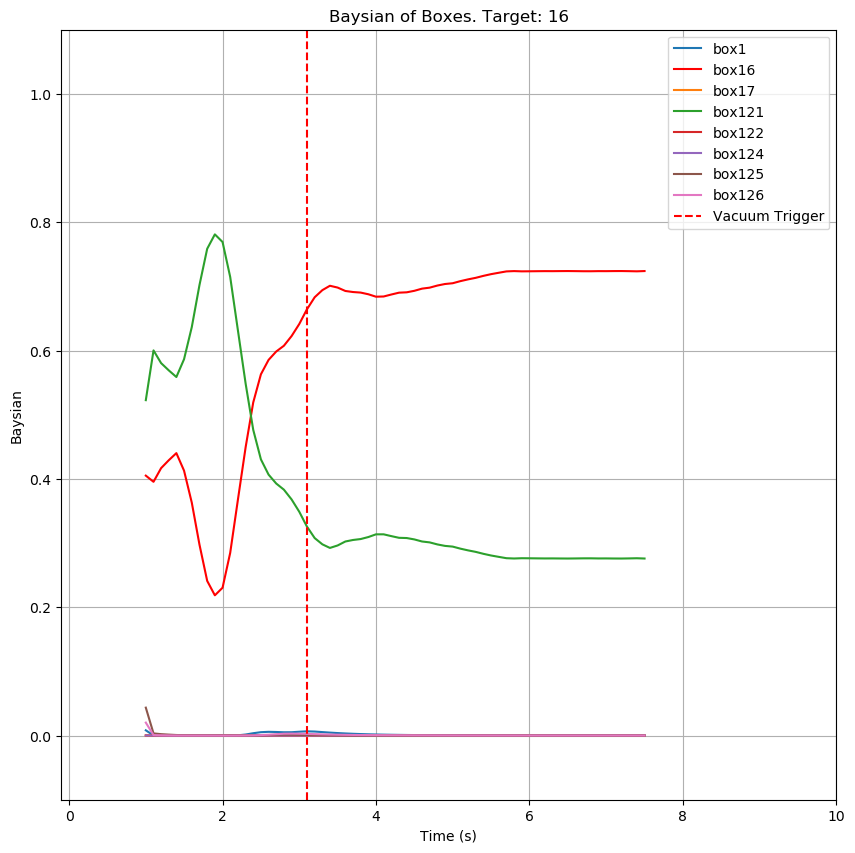

baysian0  baysian1      baysian2  baysian3      baysian4      baysian5  \
10  0.008180  0.405087  7.248701e-05  0.522692  2.024120e-04  6.601347e-05   
11  0.000198  0.395463  9.693072e-09  0.600256  4.491024e-08  4.413885e-09   
12  0.000192  0.416734  2.087654e-09  0.580446  1.128948e-08  9.207989e-10   
13  0.000119  0.428979  4.917193e-10  0.569191  3.070156e-09  1.927082e-10   
14  0.000082  0.440146  2.435332e-10  0.558774  8.302946e-10  4.322497e-11   
..       ...       ...           ...       ...           ...           ...   
71  0.000101  0.723866  1.837534e-10  0.275936  7.767513e-16  9.348186e-15   
72  0.000101  0.723920  1.837671e-10  0.275882  7.768092e-16  9.348883e-15   
73  0.000101  0.723730  1.837188e-10  0.276073  7.766049e-16  9.346425e-15   
74  0.000101  0.723477  1.836547e-10  0.276325  7.763339e-16  9.343163e-15   
75  0.000101  0.723903  1.837626e-10  0.275900  7.767901e-16  9.348653e-15   

    baysian6  baysian7      baysian8  
10  0.043500  0.020200  1.061660e-08  
11  0.003350  0.000734  6.681660e-17  
12  0.002191  0.000438  3.969105e-18  
13  0.001464  0.000248  1.867351e-19  
14  0.000854  0.000144  1.139428e-20  
..       ...       ...           ...  
71  0.000021  0.000076  5.562241e-25  
72  0.000021  0.000076  5.562655e-25  
73  0.000021  0.000076  5.561193e-25  
74  0.000021  0.000076  5.559252e-25  
75  0.000021  0.000076  5.562518e-25  

[66 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10          0.008180          0.405087          0.000072          0.522692   
11          0.010700          0.431471          0.000059          0.507559   
12          0.008069          0.435221          0.000016          0.515322   
13          0.006771          0.453036          0.000014          0.507676   
14          0.005639          0.454704          0.000008          0.515128   
..               ...               ...               ...               ...   
71          0.007168          0.608068          0.000010          0.375255   
72          0.007167          0.607919          0.000010          0.375409   
73          0.007166          0.607851          0.000010          0.375479   
74          0.007163          0.607630          0.000010          0.375705   
75          0.007172          0.608336          0.000010          0.374980   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      2.024120e-04      6.601347e-05          0.043500          0.020200   
11      9.806287e-05      2.955181e-05          0.034034          0.016049   
12      5.187677e-05      1.404055e-05          0.029008          0.012298   
13      2.720162e-05      6.308457e-06          0.023194          0.009276   
14      1.428574e-05      3.206837e-06          0.017235          0.007268   
..               ...               ...               ...               ...   
71      1.991884e-08      6.910140e-08          0.003274          0.006224   
72      1.991395e-08      6.908442e-08          0.003273          0.006223   
73      1.991172e-08      6.907668e-08          0.003273          0.006222   
74      1.990450e-08      6.905164e-08          0.003272          0.006220   
75      1.992762e-08      6.913185e-08          0.003275          0.006227   

    field.boxes8.pdf  
10      1.061660e-08  
11      2.781599e-09  
12      6.429861e-10  
13      1.334847e-10  
14      3.995037e-11  
..               ...  
71      5.330255e-13  
72      5.328946e-13  
73      5.328349e-13  
74      5.326417e-13  
75      5.332605e-13  

[66 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box16_data2.csv


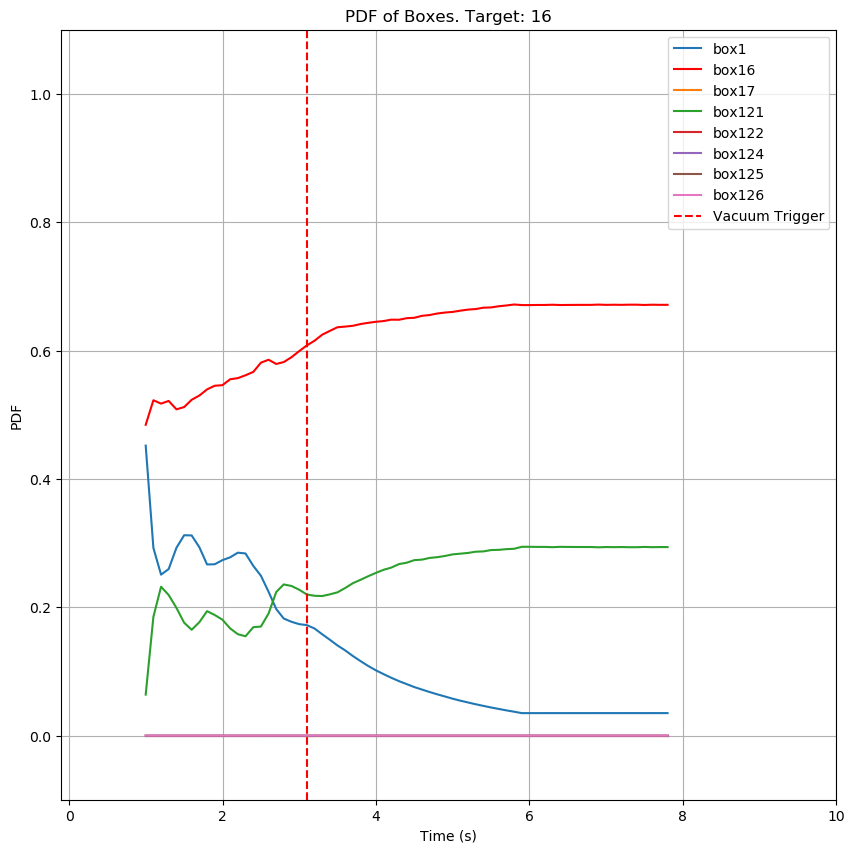

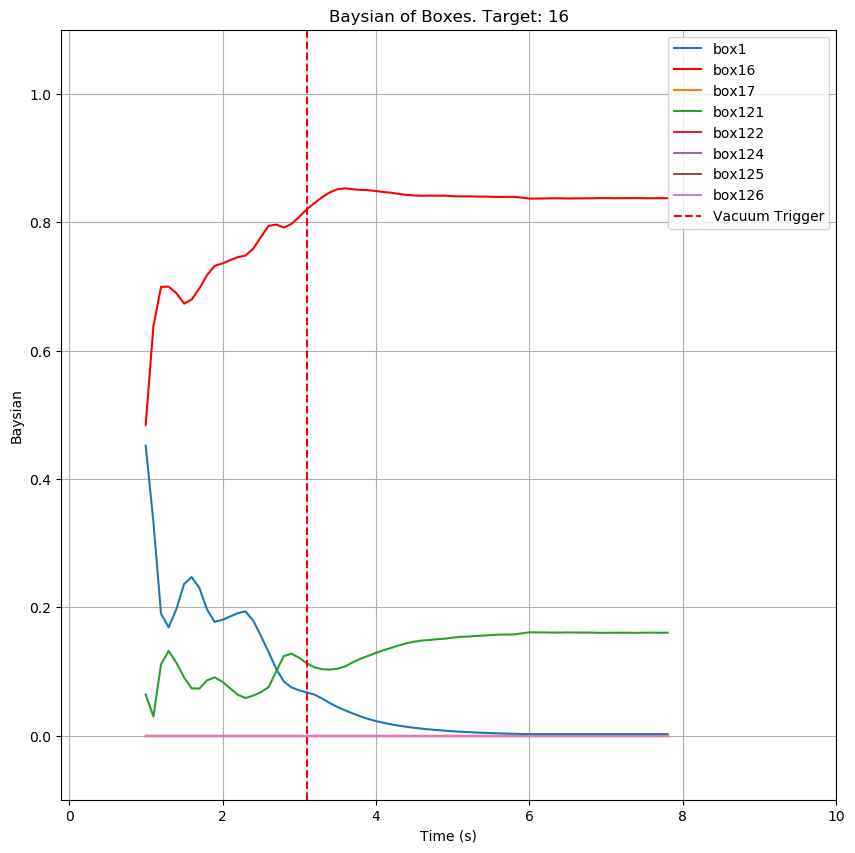

baysian0  baysian1      baysian2  baysian3      baysian4      baysian5  \
10  0.451874  0.484287  3.297130e-21  0.063839  1.000000e-10  1.000000e-10   
11  0.332812  0.637430  6.074929e-34  0.029758  6.545698e-44  1.353809e-40   
12  0.189689  0.699293  3.126809e-23  0.111018  6.377279e-59  4.996383e-53   
13  0.168720  0.699549  3.602214e-19  0.131730  1.272153e-49  2.653792e-44   
14  0.197440  0.689292  1.164536e-18  0.113268  3.785952e-50  2.334009e-44   
..       ...       ...           ...       ...           ...           ...   
74  0.002275  0.837670  4.990022e-22  0.160055  1.676284e-54  1.657165e-49   
75  0.002274  0.837362  4.988191e-22  0.160363  1.675669e-54  1.656557e-49   
76  0.002274  0.837346  4.988092e-22  0.160380  1.675636e-54  1.656524e-49   
77  0.002275  0.837476  4.988870e-22  0.160249  1.675897e-54  1.656783e-49   
78  0.002274  0.837361  4.988181e-22  0.160365  1.675666e-54  1.656554e-49   

        baysian6      baysian7      baysian8  
10  7.385169e-20  4.747910e-17  1.000000e-10  
11  5.406426e-31  1.180096e-26  8.232665e-51  
12  2.320732e-20  1.258905e-17  6.589047e-71  
13  3.970678e-17  1.498197e-14  4.207627e-59  
14  2.272971e-17  1.800628e-14  9.755143e-59  
..           ...           ...           ...  
74  1.488174e-16  2.980924e-14  1.663597e-71  
75  1.487628e-16  2.979830e-14  1.662986e-71  
76  1.487598e-16  2.979771e-14  1.662953e-71  
77  1.487830e-16  2.980236e-14  1.663213e-71  
78  1.487625e-16  2.979825e-14  1.662983e-71  

[69 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10          0.451874          0.484287      3.297130e-21          0.063839   
11          0.292397          0.522542      7.314706e-14          0.185061   
12          0.250779          0.517321      1.652444e-10          0.231900   
13          0.259453          0.521484      8.406701e-10          0.219063   
14          0.292705          0.508414      5.328217e-10          0.198881   
..               ...               ...               ...               ...   
74          0.034994          0.671477      1.638875e-11          0.293529   
75          0.034971          0.671045      1.637821e-11          0.293983   
76          0.034993          0.671452      1.638815e-11          0.293555   
77          0.034981          0.671237      1.638289e-11          0.293782   
78          0.034984          0.671282      1.638401e-11          0.293734   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      1.000000e-10      1.000000e-10      7.385169e-20      4.747910e-17   
11      2.598650e-34      5.374637e-31      2.906308e-12      9.867485e-11   
12      9.486585e-26      3.593592e-23      3.086780e-09      4.931838e-08   
13      5.171450e-25      2.847875e-22      4.960687e-09      1.171502e-07   
14      2.815902e-26      3.152364e-23      1.762410e-09      5.912020e-08   
..               ...               ...               ...               ...   
74      9.498790e-28      2.986602e-25      8.949965e-09      1.266689e-07   
75      9.492684e-28      2.984682e-25      8.944212e-09      1.265875e-07   
76      9.498445e-28      2.986494e-25      8.949640e-09      1.266643e-07   
77      9.495398e-28      2.985536e-25      8.946769e-09      1.266237e-07   
78      9.496043e-28      2.985739e-25      8.947377e-09      1.266323e-07   

    field.boxes8.pdf  
10      1.000000e-10  
11      3.268377e-41  
12      7.793143e-31  
13      2.082128e-29  
14      1.802108e-30  
..               ...  
74      2.992392e-36  
75      2.990469e-36  
76      2.992284e-36  
77      2.991324e-36  
78      2.991527e-36  

[69 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box16_data3.csv


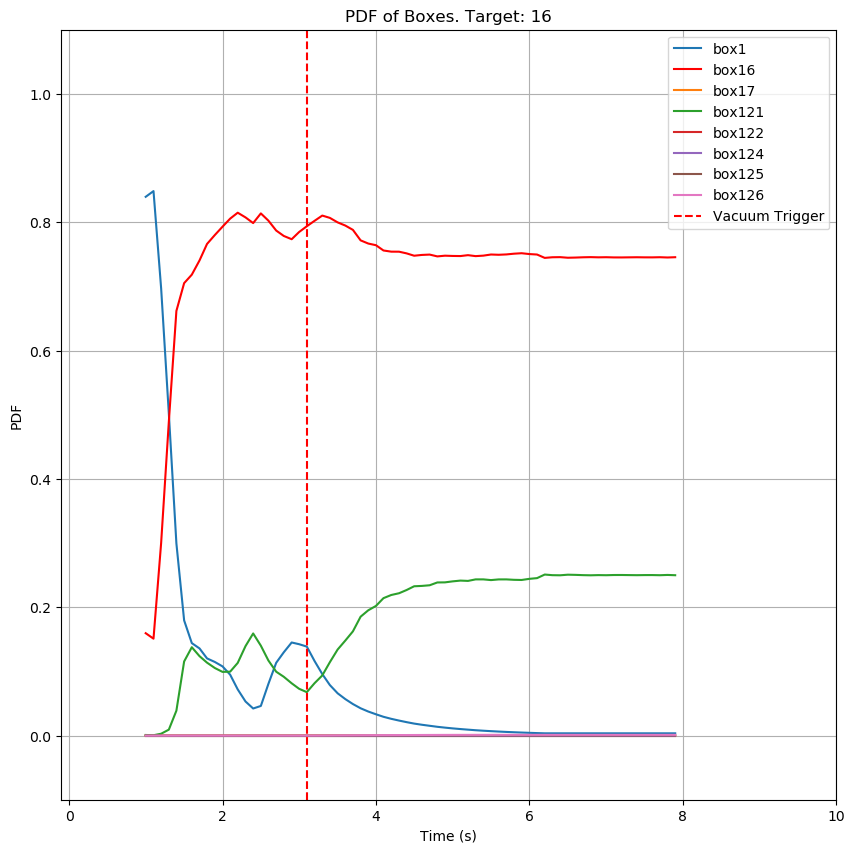

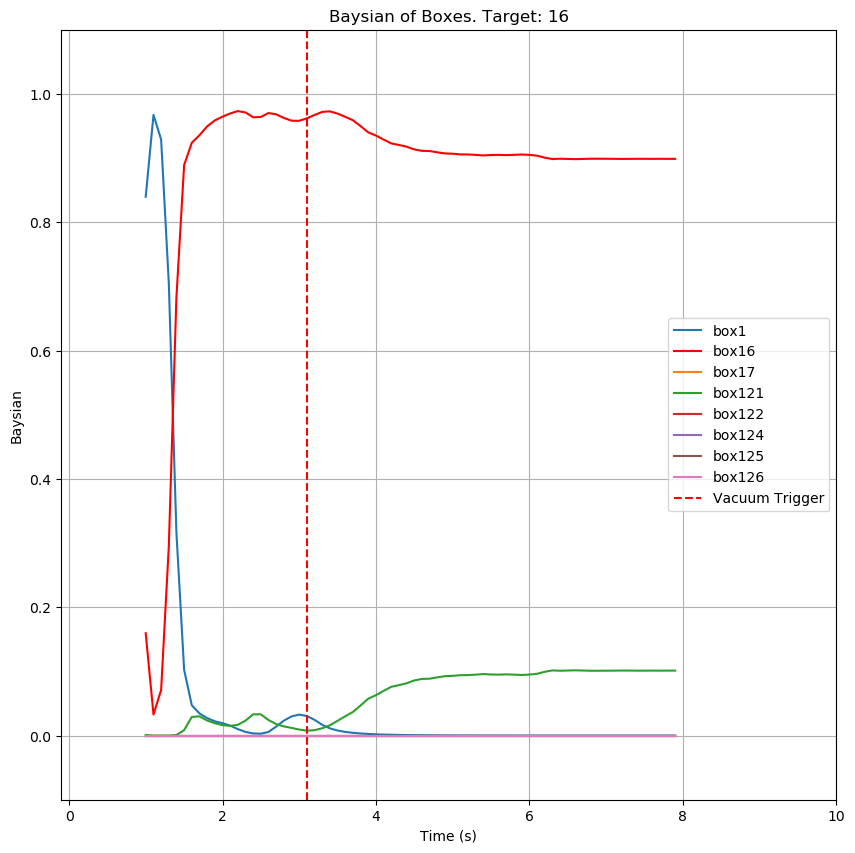

baysian0  baysian1      baysian2      baysian3      baysian4  \
10  0.839615  0.159500  1.164211e-12  8.841029e-04  1.000000e-10   
11  0.967299  0.032701  2.967066e-23  5.886573e-07  1.357760e-20   
12  0.928821  0.071177  1.690071e-19  2.202253e-06  2.695259e-46   
13  0.704429  0.295518  1.283979e-15  5.303629e-05  3.054347e-66   
14  0.316911  0.682336  4.064938e-13  7.532234e-04  3.389483e-53   
..       ...       ...           ...           ...           ...   
75  0.000020  0.898840  1.862158e-11  1.011386e-01  1.632592e-23   
76  0.000020  0.898748  1.861968e-11  1.012304e-01  1.632426e-23   
77  0.000020  0.898847  1.862173e-11  1.011315e-01  1.632605e-23   
78  0.000020  0.898761  1.861994e-11  1.012177e-01  1.632449e-23   
79  0.000020  0.898768  1.862010e-11  1.012103e-01  1.632462e-23   

        baysian5      baysian6      baysian7      baysian8  
10  7.304862e-36  1.834147e-19  2.291464e-13  1.995477e-40  
11  2.607655e-69  5.788301e-38  3.041295e-25  4.964148e-77  
12  2.836186e-60  6.718082e-34  8.867661e-22  6.408272e-66  
13  7.848589e-49  1.686889e-27  2.495367e-17  2.260961e-53  
14  1.004225e-39  5.707488e-22  6.330209e-14  3.809483e-44  
..           ...           ...           ...           ...  
75  2.377743e-19  7.050208e-09  1.986016e-06  7.908887e-30  
76  2.377500e-19  7.049489e-09  1.985814e-06  7.908080e-30  
77  2.377762e-19  7.050264e-09  1.986032e-06  7.908950e-30  
78  2.377534e-19  7.049588e-09  1.985842e-06  7.908191e-30  
79  2.377553e-19  7.049646e-09  1.985858e-06  7.908256e-30  

[70 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10          0.839615          0.159500      1.164211e-12          0.000884   
11          0.848510          0.150999      1.877036e-11          0.000490   
12          0.697001          0.300139      5.733119e-09          0.002859   
13          0.501864          0.488926      1.112114e-07          0.009210   
14          0.299439          0.661777      1.733251e-06          0.038781   
..               ...               ...               ...               ...   
75          0.003480          0.745250      3.392102e-06          0.250093   
76          0.003480          0.745218      3.391957e-06          0.250125   
77          0.003481          0.745452      3.393024e-06          0.249889   
78          0.003479          0.745041      3.391152e-06          0.250303   
79          0.003481          0.745467      3.393093e-06          0.249874   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      1.000000e-10      7.304862e-36      1.834147e-19      2.291464e-13   
11      1.000000e-10      2.629149e-34      2.324310e-19      9.775133e-13   
12      1.716165e-36      6.868757e-27      1.840390e-15      5.776238e-10   
13      8.837746e-31      5.674082e-23      4.551543e-13      2.145218e-08   
14      1.818648e-23      8.392519e-18      5.946250e-10      1.399276e-06   
..               ...               ...               ...               ...   
75      3.176139e-12      3.833038e-10      6.600269e-05      1.107776e-03   
76      3.176003e-12      3.832873e-10      6.599986e-05      1.107729e-03   
77      3.177003e-12      3.834080e-10      6.602063e-05      1.108077e-03   
78      3.175250e-12      3.831965e-10      6.598421e-05      1.107466e-03   
79      3.177067e-12      3.834157e-10      6.602197e-05      1.108100e-03   

    field.boxes8.pdf  
10      1.995477e-40  
11      1.832210e-37  
12      2.227021e-29  
13      5.041396e-25  
14      3.583207e-20  
..               ...  
75      2.210642e-15  
76      2.210547e-15  
77      2.211243e-15  
78      2.210023e-15  
79      2.211287e-15  

[70 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box16_data4.csv


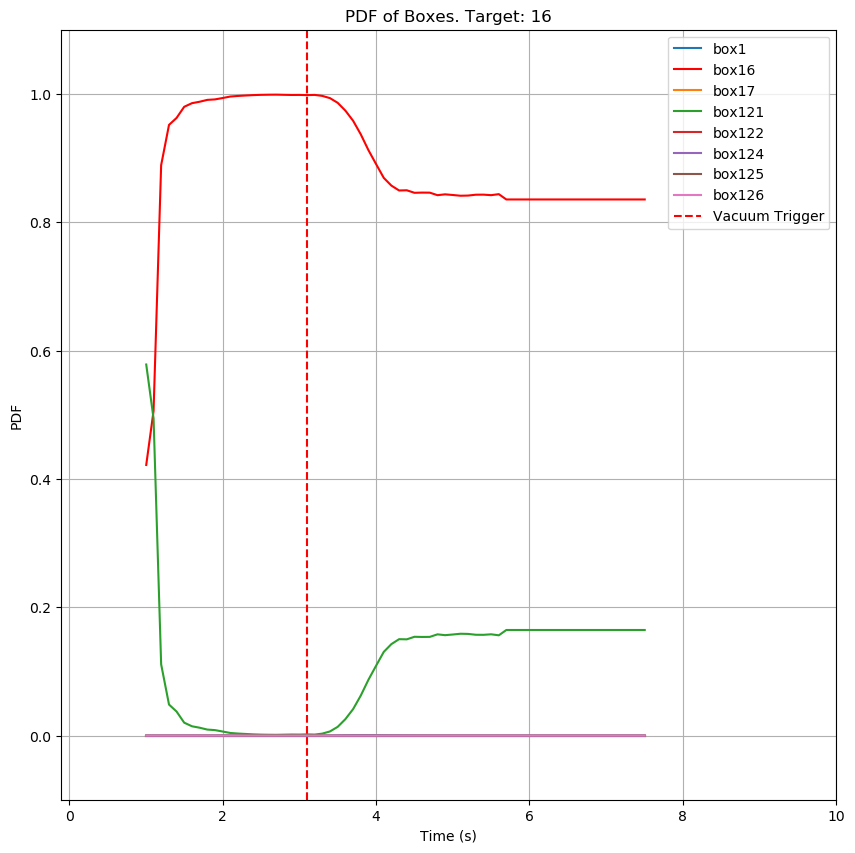

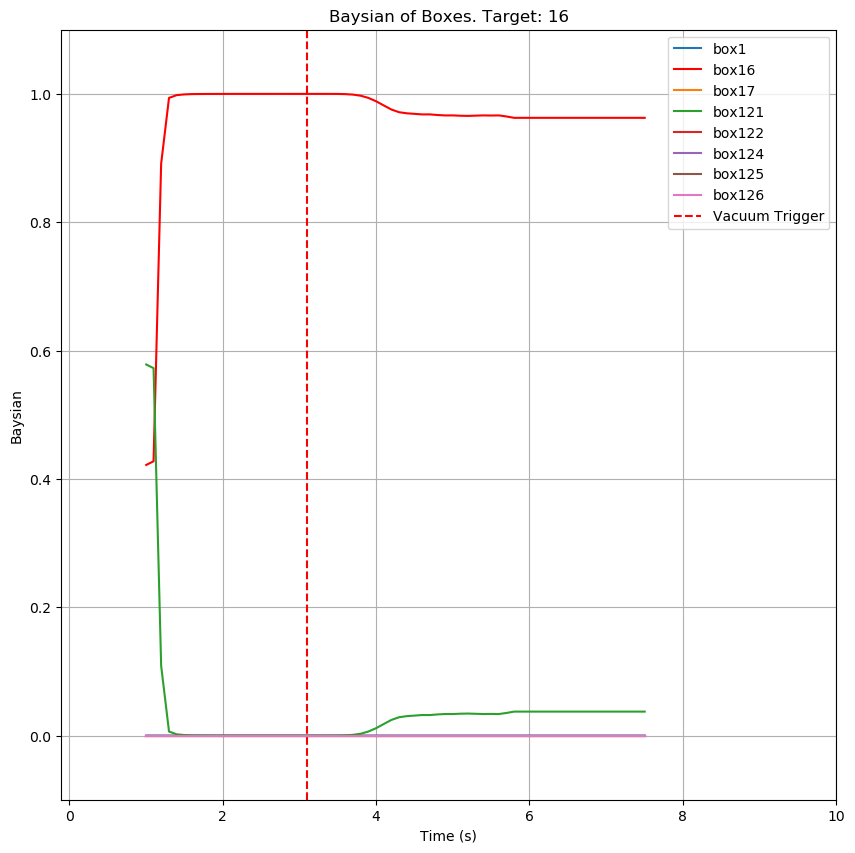

baysian0  baysian1      baysian2  baysian3      baysian4  \
10  1.230802e-17  0.421724  1.000000e-10  0.578276  1.000000e-10   
11  1.935756e-32  0.427454  2.003678e-20  0.572546  2.003678e-20   
12  1.065371e-21  0.891274  1.315871e-43  0.108726  6.279695e-51   
13  1.577702e-11  0.993700  2.186484e-60  0.006300  3.677606e-78   
14  2.976636e-10  0.998026  2.751536e-51  0.001974  4.338530e-68   
..           ...       ...           ...       ...           ...   
71  6.278906e-10  0.962677  3.951006e-35  0.037323  4.717920e-42   
72  6.278906e-10  0.962677  3.951006e-35  0.037323  4.717920e-42   
73  6.278906e-10  0.962677  3.951006e-35  0.037323  4.717920e-42   
74  6.278906e-10  0.962677  3.951006e-35  0.037323  4.717920e-42   
75  6.278906e-10  0.962677  3.951006e-35  0.037323  4.717920e-42   

        baysian5      baysian6      baysian7      baysian8  
10  1.000000e-10  1.394908e-14  2.734616e-27  1.000000e-10  
11  2.003678e-20  8.003478e-29  8.045631e-53  2.003678e-20  
12  1.981920e-20  1.043879e-26  8.908604e-41  1.981920e-20  
13  2.673765e-50  8.200908e-24  1.399449e-27  1.174567e-20  
14  1.257164e-73  2.584605e-21  2.119934e-23  1.089588e-20  
..           ...           ...           ...           ...  
71  8.420841e-47  4.114017e-12  3.623960e-14  6.472999e-89  
72  8.420841e-47  4.114017e-12  3.623960e-14  6.472999e-89  
73  8.420841e-47  4.114017e-12  3.623960e-14  6.472999e-89  
74  8.420841e-47  4.114017e-12  3.623960e-14  6.472999e-89  
75  8.420841e-47  4.114017e-12  3.623960e-14  6.472999e-89  

[66 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      1.230802e-17          0.421724      1.000000e-10          0.578276   
11      7.849359e-16          0.505863      1.000000e-10          0.494137   
12      6.848262e-07          0.888980      6.639371e-34          0.111020   
13      1.961402e-05          0.951668      2.803765e-27          0.048312   
14      1.392826e-05          0.962485      9.006817e-25          0.037501   
..               ...               ...               ...               ...   
71      2.133702e-05          0.835472      5.352363e-18          0.164504   
72      2.133702e-05          0.835472      5.352363e-18          0.164504   
73      2.133702e-05          0.835472      5.352363e-18          0.164504   
74      2.133702e-05          0.835472      5.352363e-18          0.164504   
75      2.133702e-05          0.835472      5.352363e-18          0.164504   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      1.000000e-10      1.000000e-10      1.394908e-14      2.734616e-27   
11      1.000000e-10      1.000000e-10      2.863552e-15      1.468371e-26   
12      3.168490e-41      1.000000e-10      1.839327e-12      3.061172e-15   
13      9.881774e-38      2.276383e-40      3.795991e-12      3.892166e-13   
14      4.029447e-31      5.068557e-34      6.248946e-10      4.998835e-11   
..               ...               ...               ...               ...   
71      1.849554e-21      7.813929e-24      1.727129e-06      1.621002e-07   
72      1.849554e-21      7.813929e-24      1.727129e-06      1.621002e-07   
73      1.849554e-21      7.813929e-24      1.727129e-06      1.621002e-07   
74      1.849554e-21      7.813929e-24      1.727129e-06      1.621002e-07   
75      1.849554e-21      7.813929e-24      1.727129e-06      1.621002e-07   

    field.boxes8.pdf  
10      1.000000e-10  
11      1.000000e-10  
12      1.000000e-10  
13      1.000000e-10  
14      1.000000e-10  
..               ...  
71      6.850850e-45  
72      6.850850e-45  
73      6.850850e-45  
74      6.850850e-45  
75      6.850850e-45  

[66 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box17_data0.csv


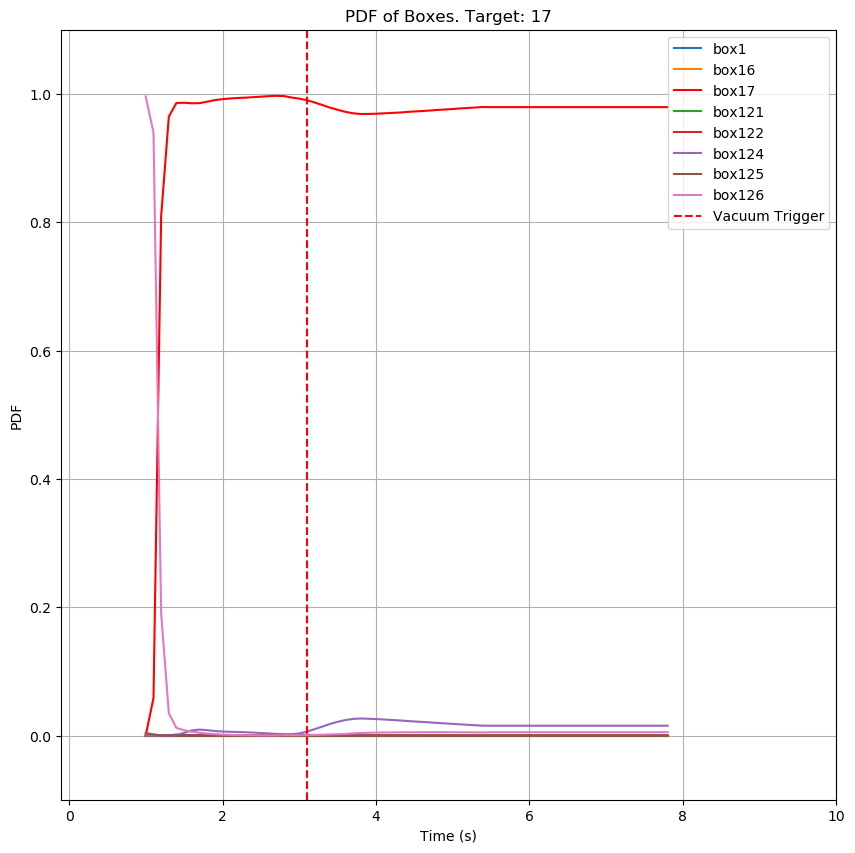

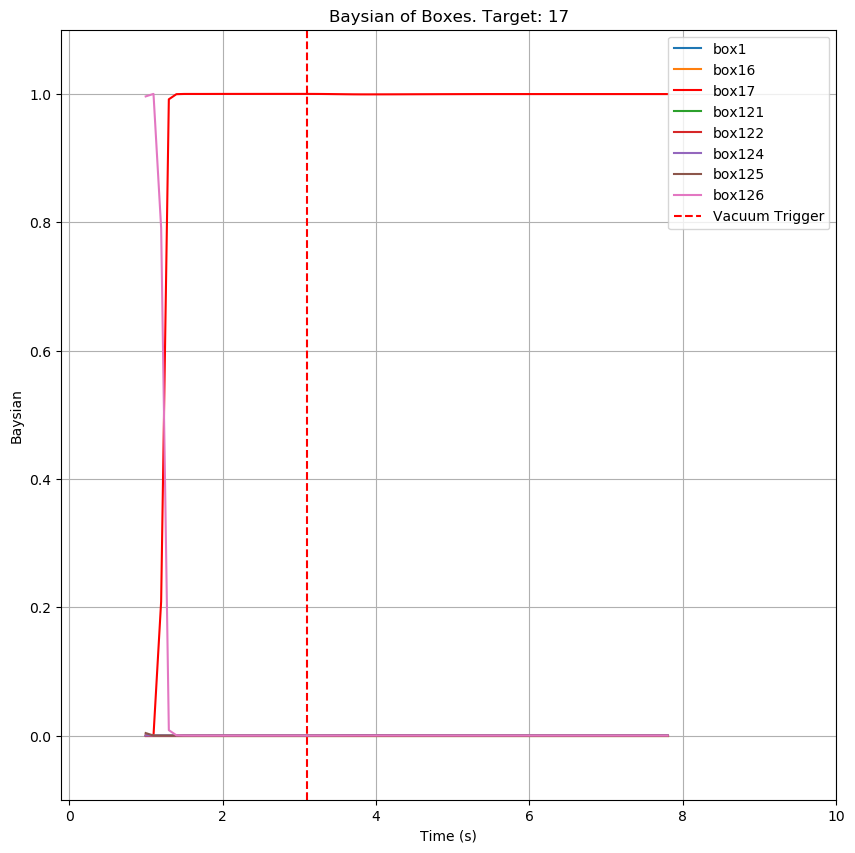

baysian0      baysian1      baysian2      baysian3      baysian4  \
10  2.396302e-19  3.225654e-31  1.329026e-05  2.824598e-40  7.667836e-40   
11  4.061160e-28  4.353166e-46  8.297331e-07  8.089763e-60  5.708858e-61   
12  2.651890e-13  1.157900e-23  2.089846e-01  2.654522e-32  6.446711e-33   
13  2.740378e-08  1.790651e-16  9.915694e-01  1.414091e-24  2.952635e-20   
14  9.466582e-07  6.128657e-15  9.995642e-01  1.521874e-23  3.563397e-14   
..           ...           ...           ...           ...           ...   
74  6.607971e-10  1.212954e-17  9.997266e-01  1.026139e-26  5.425017e-09   
75  6.607971e-10  1.212954e-17  9.997266e-01  1.026139e-26  5.425017e-09   
76  6.607971e-10  1.212954e-17  9.997266e-01  1.026139e-26  5.425017e-09   
77  6.607971e-10  1.212954e-17  9.997266e-01  1.026139e-26  5.425017e-09   
78  6.607971e-10  1.212954e-17  9.997266e-01  1.026139e-26  5.425017e-09   

        baysian5      baysian6  baysian7      baysian8  
10  1.204946e-39  3.907078e-03  0.996080  1.000000e-10  
11  1.822492e-58  7.767248e-06  0.999991  1.068347e-20  
12  4.316948e-28  1.644695e-06  0.791014  1.986077e-30  
13  3.836662e-15  5.078195e-09  0.008431  3.138839e-32  
14  3.017760e-09  1.022410e-10  0.000435  9.444019e-19  
..           ...           ...       ...           ...  
74  2.453155e-04  3.472352e-12  0.000028  1.205042e-10  
75  2.453155e-04  3.472352e-12  0.000028  1.205042e-10  
76  2.453155e-04  3.472352e-12  0.000028  1.205042e-10  
77  2.453155e-04  3.472352e-12  0.000028  1.205042e-10  
78  2.453155e-04  3.472352e-12  0.000028  1.205042e-10  

[69 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      2.396302e-19      3.225654e-31          0.000013      2.824598e-40   
11      1.586340e-09      1.263209e-15          0.058438      2.680815e-20   
12      3.782973e-05      2.074292e-09          0.809274      2.240750e-13   
13      5.702704e-04      6.795863e-08          0.964564      4.968068e-12   
14      1.579276e-03      8.579584e-08          0.985882      2.914317e-12   
..               ...               ...               ...               ...   
74      2.517886e-05      3.411333e-09          0.979361      9.922133e-14   
75      2.517886e-05      3.411333e-09          0.979361      9.922133e-14   
76      2.517886e-05      3.411333e-09          0.979361      9.922133e-14   
77      2.517886e-05      3.411333e-09          0.979361      9.922133e-14   
78      2.517886e-05      3.411333e-09          0.979361      9.922133e-14   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      7.667836e-40      1.204946e-39          0.003907          0.996080   
11      6.968900e-22      1.415748e-19          0.001861          0.939702   
12      2.093379e-12      6.900249e-10          0.000200          0.190488   
13      1.110364e-08      4.377159e-06          0.000020          0.034841   
14      3.053123e-06      6.559004e-04          0.000005          0.011874   
..               ...               ...               ...               ...   
74      7.214439e-05      1.534138e-02          0.000002          0.005188   
75      7.214439e-05      1.534138e-02          0.000002          0.005188   
76      7.214439e-05      1.534138e-02          0.000002          0.005188   
77      7.214439e-05      1.534138e-02          0.000002          0.005188   
78      7.214439e-05      1.534138e-02          0.000002          0.005188   

    field.boxes8.pdf  
10      1.000000e-10  
11      1.000000e-10  
12      4.494382e-21  
13      5.497973e-12  
14      1.634180e-07  
..               ...  
74      1.075234e-05  
75      1.075234e-05  
76      1.075234e-05  
77      1.075234e-05  
78      1.075234e-05  

[69 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box17_data1.csv


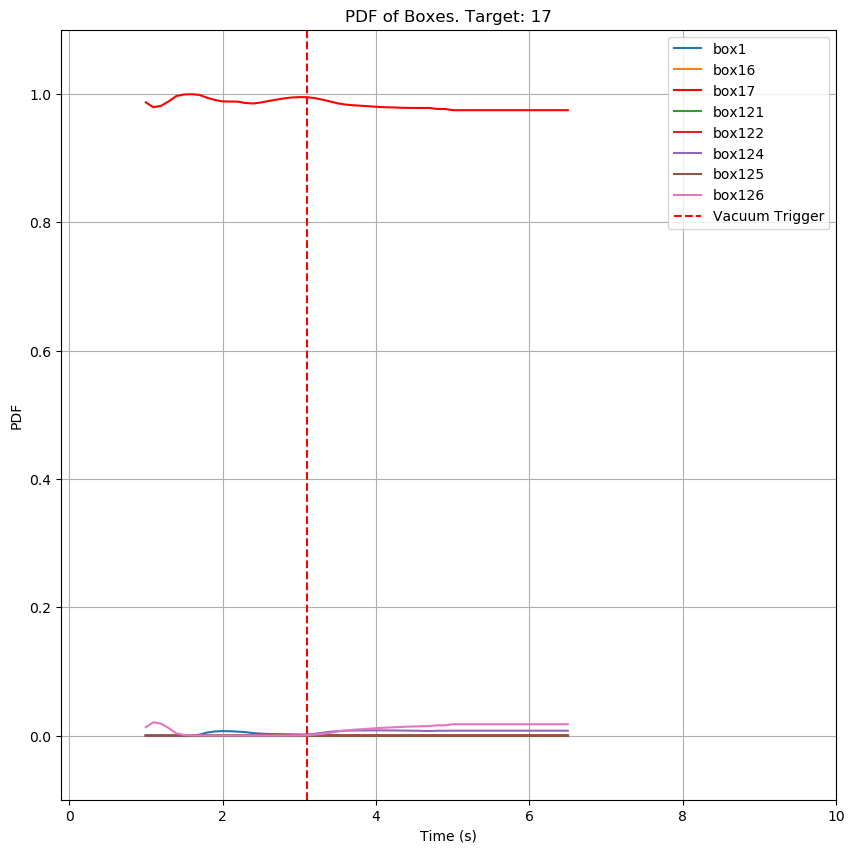

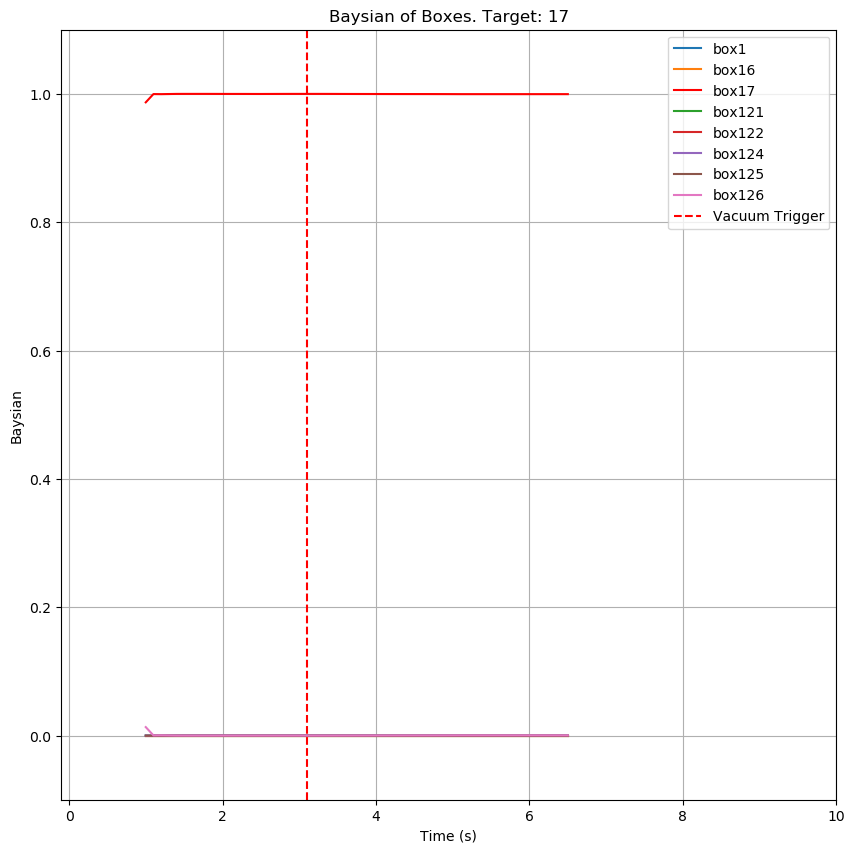

baysian0      baysian1  baysian2      baysian3      baysian4  \
10  4.014389e-08  3.387093e-14  0.986814  1.176871e-19  1.838022e-13   
11  7.630409e-15  3.104426e-26  0.999716  1.051538e-36  2.111053e-27   
12  2.388177e-14  2.257655e-25  0.999598  1.548793e-35  5.357969e-30   
13  9.230483e-15  1.046105e-26  0.999780  1.223403e-37  7.685098e-32   
14  1.825366e-14  1.242890e-26  0.999961  1.093297e-38  8.619259e-30   
15  2.167342e-12  4.306249e-24  0.999997  1.194041e-36  1.360709e-25   
16  1.435794e-09  7.858734e-21  1.000000  2.232480e-33  1.430191e-22   
17  2.298363e-07  3.337085e-18  1.000000  7.990811e-31  8.446848e-21   
18  6.507869e-06  1.240547e-16  0.999993  1.637164e-29  3.007382e-20   
19  3.025010e-05  6.137803e-16  0.999966  4.854749e-29  1.232377e-20   
20  4.534197e-05  8.617153e-16  0.999940  4.221140e-29  1.129166e-21   
21  4.791539e-05  5.661428e-16  0.999928  1.246137e-29  8.332476e-23   
22  4.206852e-05  2.494238e-16  0.999927  2.026007e-30  5.822531e-24   
23  3.371154e-05  7.219903e-17  0.999912  1.598109e-31  1.027269e-24   
24  2.103476e-05  1.661947e-17  0.999877  1.301580e-32  1.555545e-24   
25  1.162783e-05  4.919041e-18  0.999868  2.179411e-33  4.069414e-24   
26  7.439881e-06  2.536768e-18  0.999900  8.771299e-34  5.706963e-24   
27  5.543488e-06  2.538826e-18  0.999935  1.166512e-33  1.072495e-23   
28  4.608542e-06  9.046633e-18  0.999961  2.308150e-32  1.498388e-22   
29  3.839782e-06  1.234070e-16  0.999978  1.016577e-29  3.491847e-20   
30  3.086324e-06  1.851765e-15  0.999987  6.280840e-27  1.333762e-17   
31  2.306161e-06  1.571827e-14  0.999992  1.215395e-24  2.029835e-15   
32  1.647595e-06  8.446704e-14  0.999991  8.827859e-23  1.203396e-13   
33  1.195345e-06  3.114066e-13  0.999982  2.613908e-21  2.798499e-12   
34  8.656939e-07  7.522101e-13  0.999962  2.925412e-20  2.669528e-11   
35  6.269372e-07  1.244599e-12  0.999929  1.358802e-19  1.141894e-10   
36  4.525159e-07  1.502304e-12  0.999893  3.051412e-19  2.590086e-10   
37  3.240523e-07  1.474271e-12  0.999864  4.313414e-19  4.058820e-10   
38  2.306344e-07  1.297162e-12  0.999844  4.804224e-19  5.310716e-10   
39  1.634488e-07  1.075316e-12  0.999827  4.710573e-19  6.332277e-10   
40  1.158548e-07  8.998231e-13  0.999806  4.729135e-19  7.668858e-10   
41  8.149310e-08  7.275750e-13  0.999786  4.463450e-19  9.097281e-10   
42  5.690095e-08  5.501082e-13  0.999772  3.664211e-19  9.891106e-10   
43  3.979317e-08  4.123372e-13  0.999758  2.941196e-19  1.045097e-09   
44  2.787838e-08  3.090487e-13  0.999745  2.354151e-19  1.090901e-09   
45  1.954306e-08  2.268707e-13  0.999735  1.794186e-19  1.088265e-09   
46  1.368198e-08  1.629741e-13  0.999728  1.304572e-19  1.048440e-09   
47  9.585459e-09  1.163195e-13  0.999723  9.336499e-20  9.927057e-10   
48  6.566190e-09  8.412875e-14  0.999699  7.354171e-20  1.178450e-09   
49  5.369782e-09  7.197174e-14  0.999676  6.845719e-20  1.442351e-09   
50  4.519210e-09  6.765094e-14  0.999645  7.387196e-20  1.665798e-09   
51  3.803355e-09  6.358933e-14  0.999612  7.971476e-20  1.923854e-09   
52  3.803355e-09  6.358933e-14  0.999612  7.971476e-20  1.923854e-09   
53  3.803355e-09  6.358933e-14  0.999612  7.971476e-20  1.923854e-09   
54  3.803355e-09  6.358933e-14  0.999612  7.971476e-20  1.923854e-09   
55  3.803355e-09  6.358933e-14  0.999612  7.971476e-20  1.923854e-09   
56  3.803355e-09  6.358933e-14  0.999612  7.971476e-20  1.923854e-09   
57  3.803355e-09  6.358933e-14  0.999612  7.971476e-20  1.923854e-09   
58  3.803355e-09  6.358933e-14  0.999612  7.971476e-20  1.923854e-09   
59  3.803355e-09  6.358933e-14  0.999612  7.971476e-20  1.923854e-09   
60  3.803355e-09  6.358933e-14  0.999612  7.971476e-20  1.923854e-09   
61  3.803355e-09  6.358933e-14  0.999612  7.971476e-20  1.923854e-09   
62  3.803355e-09  6.358933e-14  0.999612  7.971476e-20  1.923854e-09   
63  3.803355e-09  6.358933e-14  0.999612  7.971476e-20  1.923854e-09   
64  3.803355e-09  6.358933e-14  0.999612  7.9714

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      4.014389e-08      3.387093e-14          0.986814      1.176871e-19   
11      1.837225e-07      8.859071e-13          0.979210      8.636352e-18   
12      1.249722e-07      2.450071e-13          0.981429      1.724139e-18   
13      7.167198e-08      4.143192e-14          0.988516      6.885502e-20   
14      2.509204e-07      2.955515e-13          0.996632      1.564365e-19   
15      8.600567e-06      1.450780e-11          0.999079      7.600057e-18   
16      1.667061e-04      5.409254e-10          0.999509      2.933305e-16   
17      1.375878e-03      6.156625e-09          0.998450      2.718607e-15   
18      4.694111e-03      1.999701e-08          0.993952      5.976406e-15   
19      6.344832e-03      3.022000e-08          0.990527      7.997852e-15   
20      6.996398e-03      2.791667e-08          0.988330      5.167145e-15   
21      6.688780e-03      1.980655e-08          0.988128      2.355383e-15   
22      6.139974e-03      1.229378e-08          0.987896      8.397221e-16   
23      5.347453e-03      5.719802e-09          0.985793      1.853556e-16   
24      3.820062e-03      2.821733e-09          0.985011      6.819382e-17   
25      2.958341e-03      1.694278e-09          0.986557      3.106092e-17   
26      2.453805e-03      1.460893e-09          0.988910      2.755319e-17   
27      2.213988e-03      1.703126e-09          0.990939      4.149060e-17   
28      2.048150e-03      5.226533e-09          0.992910      5.473788e-16   
29      1.850993e-03      2.331234e-08          0.994354      1.833632e-14   
30      1.649653e-03      7.858792e-08          0.994969      3.388920e-13   
31      1.383719e-03      1.979702e-07          0.994804      3.549824e-12   
32      1.176797e-03      4.216834e-07          0.993476      2.457806e-11   
33      1.000210e-03      7.271783e-07          0.991139      1.047230e-10   
34      8.478117e-04      1.013268e-06          0.988269      2.736346e-10   
35      7.201053e-04      1.196124e-06          0.985293      4.835670e-10   
36      6.089496e-04      1.217097e-06          0.983403      6.114877e-10   
37      5.141138e-04      1.170247e-06          0.982280      6.814889e-10   
38      4.325955e-04      1.068892e-06          0.981555      6.798008e-10   
39      3.638193e-04      9.686982e-07          0.980836      6.672339e-10   
40      3.061142e-04      8.929435e-07          0.979884      6.813322e-10   
41      2.555155e-04      7.820483e-07          0.979292      6.287695e-10   
42      2.135395e-04      6.745134e-07          0.978960      5.588111e-10   
43      1.785517e-04      5.857275e-07          0.978507      5.043044e-10   
44      1.494870e-04      5.051623e-07          0.978194      4.469318e-10   
45      1.251131e-04      4.297947e-07          0.978078      3.841844e-10   
46      1.046406e-04      3.628367e-07          0.978053      3.249242e-10   
47      8.765070e-05      3.067494e-07          0.978048      2.749442e-10   
48      7.156532e-05      2.620024e-07          0.976459      2.555253e-10   
49      7.156532e-05      2.620024e-07          0.976459      2.555253e-10   
50      6.011607e-05      2.458098e-07          0.974592      2.752178e-10   
51      6.011607e-05      2.458098e-07          0.974592      2.752178e-10   
52      6.011607e-05      2.458098e-07          0.974592      2.752178e-10   
53      6.011607e-05      2.458098e-07          0.974592      2.752178e-10   
54      6.011607e-05      2.458098e-07          0.974592      2.752178e-10   
55      6.011607e-05      2.458098e-07          0.974592      2.752178e-10   
56      6.011607e-05      2.458098e-07          0.974592      2.752178e-10   
57      6.011607e-05      2.458098e-07          0.974592      2.752178e-10   
58      6.011607e-05      2.458098e-07          0.974592      2.752178e-10   
59      6.011607e-05      2.458098e-07          0.974592      2.752178e-10   
60      6.011607e-05      

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box17_data2.csv


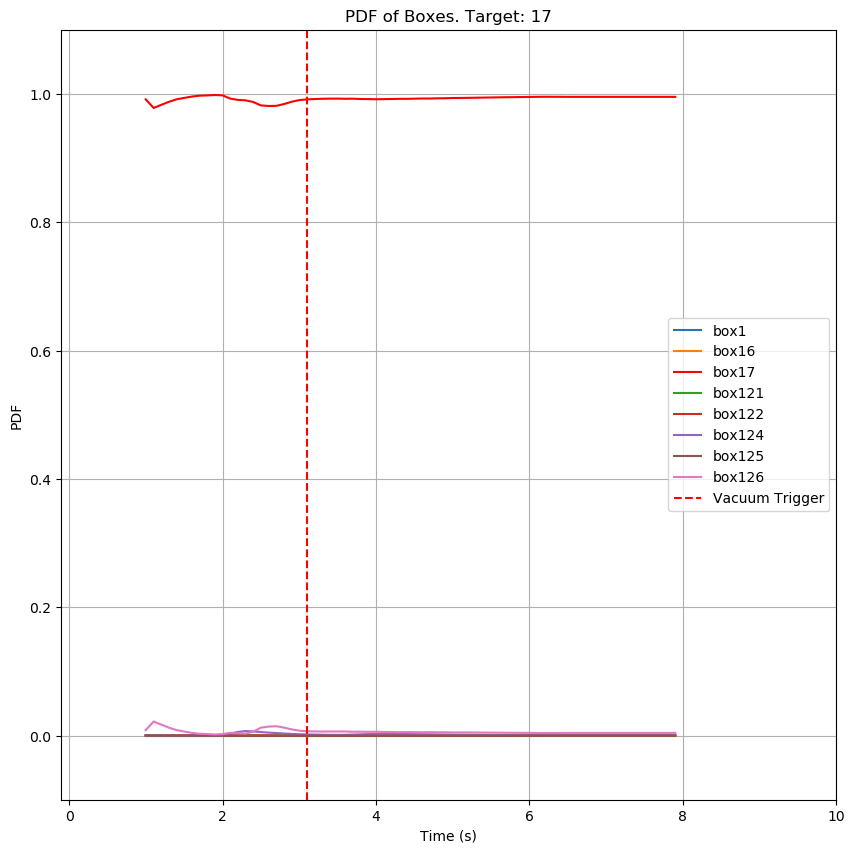

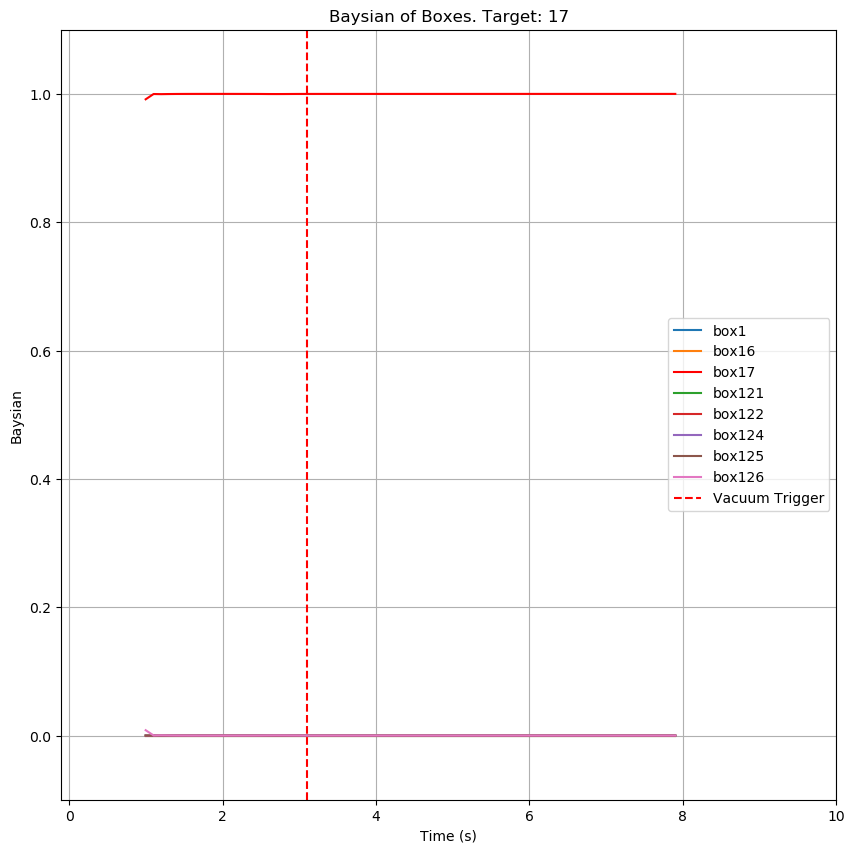

baysian0      baysian1  baysian2      baysian3      baysian4  \
10  9.396189e-05  1.017804e-06  0.991564  5.842417e-10  4.975259e-12   
11  4.834870e-09  1.916293e-12  0.999812  3.739261e-18  5.267357e-23   
12  2.307696e-09  1.614184e-12  0.999609  8.229492e-18  3.702725e-22   
13  8.629555e-10  2.281910e-13  0.999781  3.601093e-19  1.680216e-22   
14  2.416394e-10  5.024070e-14  0.999892  3.854572e-20  5.110718e-24   
..           ...           ...       ...           ...           ...   
75  9.773108e-18  4.820031e-24  0.999983  5.673372e-32  1.009794e-13   
76  9.773108e-18  4.820031e-24  0.999983  5.673372e-32  1.009794e-13   
77  9.773108e-18  4.820031e-24  0.999983  5.673372e-32  1.009794e-13   
78  9.773108e-18  4.820031e-24  0.999983  5.673372e-32  1.009794e-13   
79  9.773108e-18  4.820031e-24  0.999983  5.673372e-32  1.009794e-13   

        baysian5      baysian6  baysian7      baysian8  
10  9.076865e-07  4.515204e-07  0.008339  1.620254e-08  
11  5.812659e-13  2.270498e-12  0.000188  4.793718e-17  
12  1.423040e-12  1.653045e-11  0.000391  2.922108e-17  
13  1.674503e-12  3.863690e-12  0.000219  3.223097e-17  
14  3.145542e-13  5.254568e-13  0.000108  7.684564e-18  
..           ...           ...       ...           ...  
75  2.564606e-07  2.471759e-12  0.000017  4.663623e-17  
76  2.564606e-07  2.471759e-12  0.000017  4.663623e-17  
77  2.564606e-07  2.471759e-12  0.000017  4.663623e-17  
78  2.564606e-07  2.471759e-12  0.000017  4.663623e-17  
79  2.564606e-07  2.471759e-12  0.000017  4.663623e-17  

[70 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      9.396189e-05      1.017804e-06          0.991564      5.842417e-10   
11      4.991141e-05      1.826269e-06          0.978057      6.208119e-09   
12      4.446002e-05      8.499225e-07          0.982781      1.274688e-09   
13      1.884271e-05      2.606416e-07          0.987581      2.742554e-10   
14      1.255840e-05      1.887652e-07          0.991495      1.376357e-10   
..               ...               ...               ...               ...   
75      3.111724e-09      2.185293e-12          0.995362      2.370857e-16   
76      3.111724e-09      2.185293e-12          0.995362      2.370857e-16   
77      3.111724e-09      2.185293e-12          0.995362      2.370857e-16   
78      3.111724e-09      2.185293e-12          0.995362      2.370857e-16   
79      3.111724e-09      2.185293e-12          0.995362      2.370857e-16   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      4.975259e-12      9.076865e-07      4.515204e-07          0.008339   
11      1.026937e-11      6.211634e-07      4.877650e-06          0.021885   
12      3.467115e-11      2.202937e-06      3.258853e-06          0.017168   
13      4.704585e-12      7.379186e-07      1.150965e-06          0.012398   
14      1.063826e-12      4.174428e-07      4.470796e-07          0.008491   
..               ...               ...               ...               ...   
75      3.163014e-07      5.040750e-04      1.564904e-06          0.004132   
76      3.163014e-07      5.040750e-04      1.564904e-06          0.004132   
77      3.163014e-07      5.040750e-04      1.564904e-06          0.004132   
78      3.163014e-07      5.040750e-04      1.564904e-06          0.004132   
79      3.163014e-07      5.040750e-04      1.564904e-06          0.004132   

    field.boxes8.pdf  
10      1.620254e-08  
11      2.869831e-09  
12      9.791083e-09  
13      3.195709e-09  
14      2.354843e-09  
..               ...  
75      6.797457e-09  
76      6.797457e-09  
77      6.797457e-09  
78      6.797457e-09  
79      6.797457e-09  

[70 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box17_data3.csv


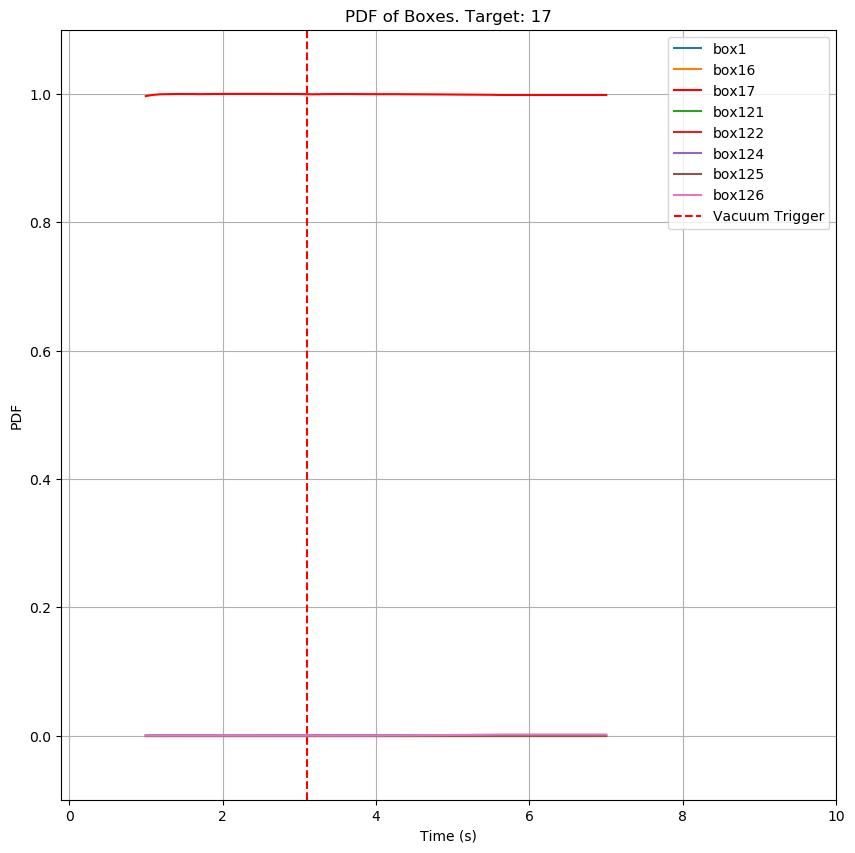

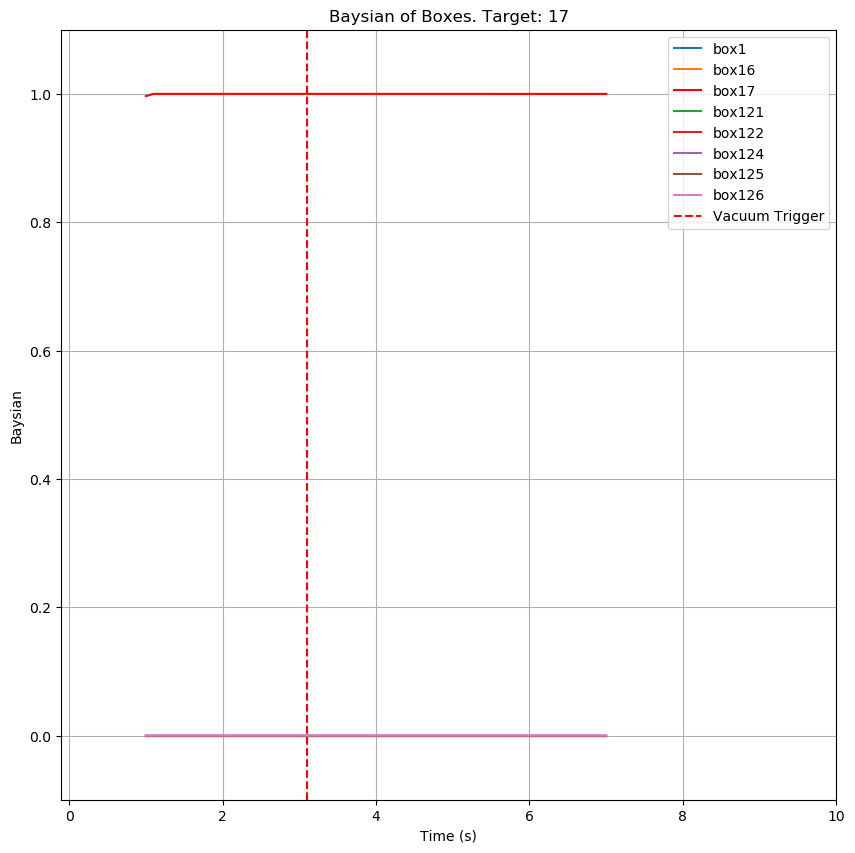

baysian0      baysian1  baysian2      baysian3      baysian4  \
10  8.773902e-08  1.708806e-26  0.996539  1.000000e-10  6.924044e-38   
11  1.772603e-15  1.107652e-44  0.999995  3.221623e-42  4.291027e-55   
12  3.027660e-16  8.185556e-34  0.999999  2.187677e-56  1.294424e-30   
13  5.859904e-17  2.909293e-30  1.000000  5.463436e-48  3.060033e-25   
14  1.209135e-17  1.694860e-30  1.000000  7.988850e-48  3.556425e-25   
..           ...           ...       ...           ...           ...   
66  5.140534e-23  1.795520e-25  0.999997  1.452874e-32  3.727280e-22   
67  5.140534e-23  1.795520e-25  0.999997  1.452874e-32  3.727280e-22   
68  5.140534e-23  1.795520e-25  0.999997  1.452874e-32  3.727280e-22   
69  5.140534e-23  1.795520e-25  0.999997  1.452874e-32  3.727280e-22   
70  5.140534e-23  1.795520e-25  0.999997  1.452874e-32  3.727280e-22   

        baysian5      baysian6      baysian7      baysian8  
10  2.720775e-13  9.556063e-43  2.412101e-16  3.461177e-03  
11  6.499451e-19  6.470790e-64  1.452138e-24  5.089067e-06  
12  1.202841e-10  7.353666e-37  8.331132e-15  7.692714e-07  
13  5.256018e-09  2.243257e-29  5.927677e-12  1.415091e-07  
14  5.398336e-09  8.438078e-29  1.133191e-11  3.875904e-08  
..           ...           ...           ...           ...  
66  1.082071e-09  3.722138e-15  2.661270e-06  8.509921e-16  
67  1.082071e-09  3.722138e-15  2.661270e-06  8.509921e-16  
68  1.082071e-09  3.722138e-15  2.661270e-06  8.509921e-16  
69  1.082071e-09  3.722138e-15  2.661270e-06  8.509921e-16  
70  1.082071e-09  3.722138e-15  2.661270e-06  8.509921e-16  

[61 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      8.773902e-08      1.708806e-26          0.996539      1.000000e-10   
11      2.010380e-08      6.450153e-19          0.998534      3.205783e-32   
12      1.502941e-08      1.266459e-15          0.999423      6.810233e-25   
13      3.895239e-09      2.294996e-15          0.999622      8.014739e-24   
14      3.102347e-09      7.380771e-16          0.999802      9.961958e-25   
..               ...               ...               ...               ...   
66      7.157848e-12      4.230323e-13          0.998338      1.203351e-16   
67      7.157848e-12      4.230323e-13          0.998338      1.203351e-16   
68      7.157848e-12      4.230323e-13          0.998338      1.203351e-16   
69      7.157848e-12      4.230323e-13          0.998338      1.203351e-16   
70      7.157848e-12      4.230323e-13          0.998338      1.203351e-16   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      6.924044e-38      2.720775e-13      9.556063e-43      2.412101e-16   
11      6.166815e-18      2.377078e-06      6.738106e-22      5.990620e-09   
12      2.094732e-13      5.049839e-05      1.089128e-15      1.387858e-06   
13      1.459430e-12      1.039836e-04      2.057717e-14      4.267022e-06   
14      2.435456e-13      5.188537e-05      4.098338e-15      2.654165e-06   
..               ...               ...               ...               ...   
66      1.927411e-11      3.284024e-05      6.090804e-08      1.628632e-03   
67      1.927411e-11      3.284024e-05      6.090804e-08      1.628632e-03   
68      1.927411e-11      3.284024e-05      6.090804e-08      1.628632e-03   
69      1.927411e-11      3.284024e-05      6.090804e-08      1.628632e-03   
70      1.927411e-11      3.284024e-05      6.090804e-08      1.628632e-03   

    field.boxes8.pdf  
10      3.461177e-03  
11      1.463099e-03  
12      5.247092e-04  
13      2.694333e-04  
14      1.437711e-04  
..               ...  
66      2.912334e-08  
67      2.912334e-08  
68      2.912334e-08  
69      2.912334e-08  
70      2.912334e-08  

[61 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box17_data5.csv


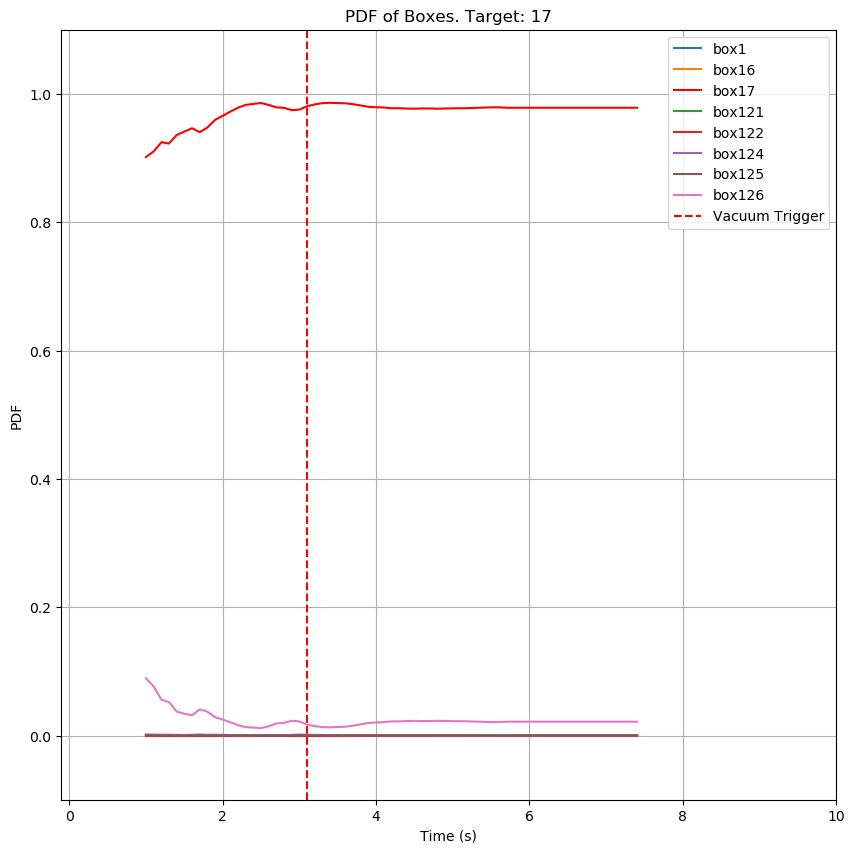

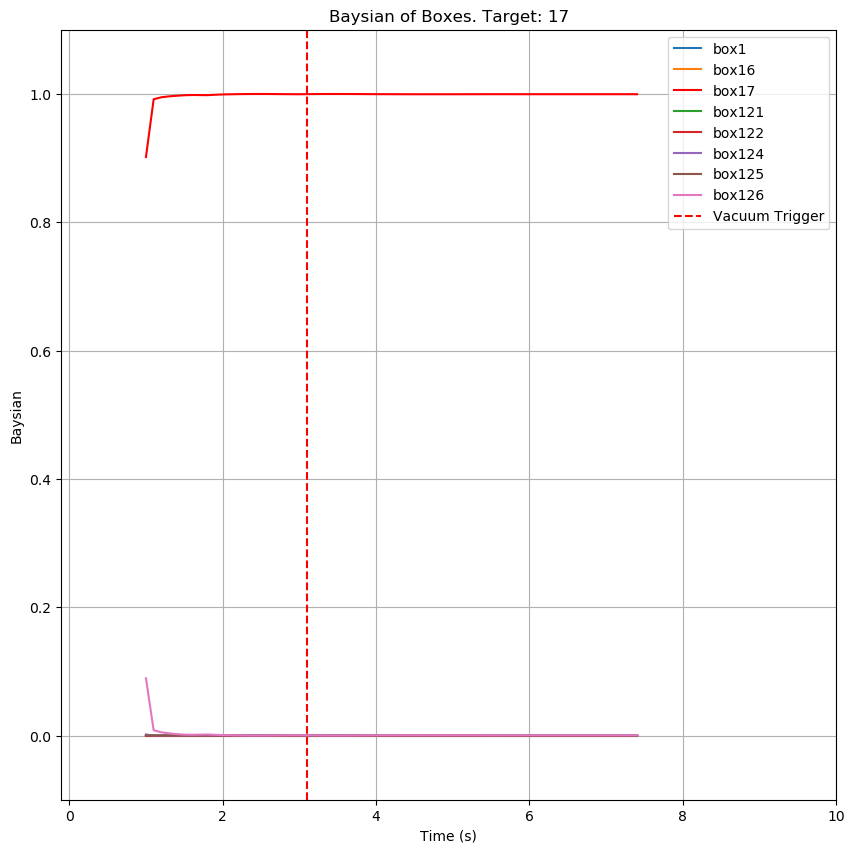

baysian0      baysian1  baysian2      baysian3      baysian4  \
10  3.654135e-04  1.048619e-03  0.901587  4.846981e-06  1.599640e-08   
11  9.431042e-08  1.877226e-06  0.991670  5.952497e-11  5.654583e-17   
12  6.145073e-08  1.843753e-06  0.994750  4.640725e-11  8.270371e-18   
13  5.865287e-08  8.709567e-07  0.996140  7.215053e-12  4.257859e-18   
14  2.907071e-08  3.736111e-07  0.997071  9.880959e-13  1.111761e-18   
..           ...           ...       ...           ...           ...   
70  2.522311e-19  3.604633e-16  0.999513  1.833487e-19  1.743464e-24   
71  2.522311e-19  3.604633e-16  0.999513  1.833487e-19  1.743464e-24   
72  2.522311e-19  3.604633e-16  0.999513  1.833487e-19  1.743464e-24   
73  2.522311e-19  3.604633e-16  0.999513  1.833487e-19  1.743464e-24   
74  2.522311e-19  3.604633e-16  0.999513  1.833487e-19  1.743464e-24   

        baysian5      baysian6  baysian7      baysian8  
10  1.707509e-03  1.523381e-05  0.089226  6.045523e-03  
11  2.016344e-06  1.868092e-10  0.008250  7.552396e-05  
12  1.366871e-06  5.278161e-11  0.005039  2.076455e-04  
13  1.729942e-06  1.079250e-11  0.003400  4.571917e-04  
14  1.547342e-06  2.023371e-12  0.002262  6.656259e-04  
..           ...           ...       ...           ...  
70  2.429277e-10  3.552696e-12  0.000487  3.087171e-12  
71  2.429277e-10  3.552696e-12  0.000487  3.087171e-12  
72  2.429277e-10  3.552696e-12  0.000487  3.087171e-12  
73  2.429277e-10  3.552696e-12  0.000487  3.087171e-12  
74  2.429277e-10  3.552696e-12  0.000487  3.087171e-12  

[65 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10      3.654135e-04      1.048619e-03          0.901587      4.846981e-06   
11      2.136303e-04      1.481790e-03          0.910432      1.016519e-05   
12      2.434665e-04      1.053152e-03          0.924786      3.864072e-06   
13      2.063268e-04      7.082898e-04          0.922539      1.599189e-06   
14      1.220018e-04      4.567465e-04          0.935853      5.350145e-07   
..               ...               ...               ...               ...   
70      4.914948e-10      1.858019e-08          0.978394      4.190429e-10   
71      4.914948e-10      1.858019e-08          0.978394      4.190429e-10   
72      4.914948e-10      1.858019e-08          0.978394      4.190429e-10   
73      4.914948e-10      1.858019e-08          0.978394      4.190429e-10   
74      4.914948e-10      1.858019e-08          0.978394      4.190429e-10   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      1.599640e-08          0.001708      1.523381e-05          0.089226   
11      2.925944e-09          0.000977      1.015027e-05          0.076534   
12      2.392401e-09          0.001184      4.401290e-06          0.055729   
13      1.524274e-09          0.001252      2.100137e-06          0.052253   
14      6.315603e-10          0.001070      8.342464e-07          0.037479   
..               ...               ...               ...               ...   
70      1.292189e-12          0.000015      1.844585e-06          0.021587   
71      1.292189e-12          0.000015      1.844585e-06          0.021587   
72      1.292189e-12          0.000015      1.844585e-06          0.021587   
73      1.292189e-12          0.000015      1.844585e-06          0.021587   
74      1.292189e-12          0.000015      1.844585e-06          0.021587   

    field.boxes8.pdf  
10          0.006046  
11          0.010340  
12          0.016996  
13          0.023038  
14          0.025018  
..               ...  
70          0.000002  
71          0.000002  
72          0.000002  
73          0.000002  
74          0.000002  

[65 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box1_data0.csv


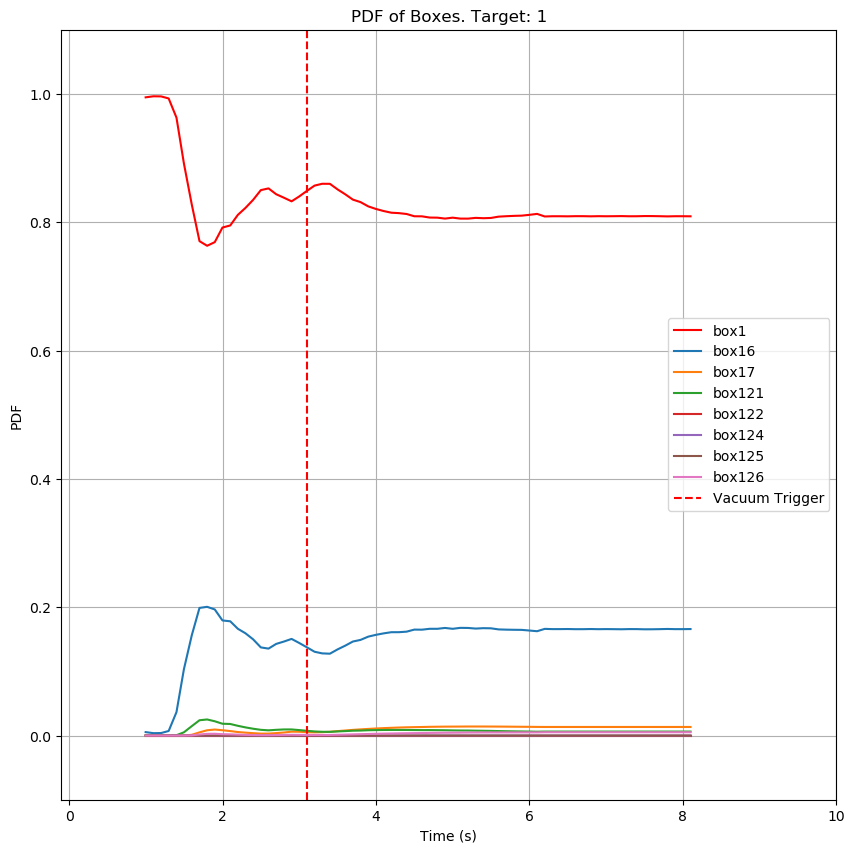

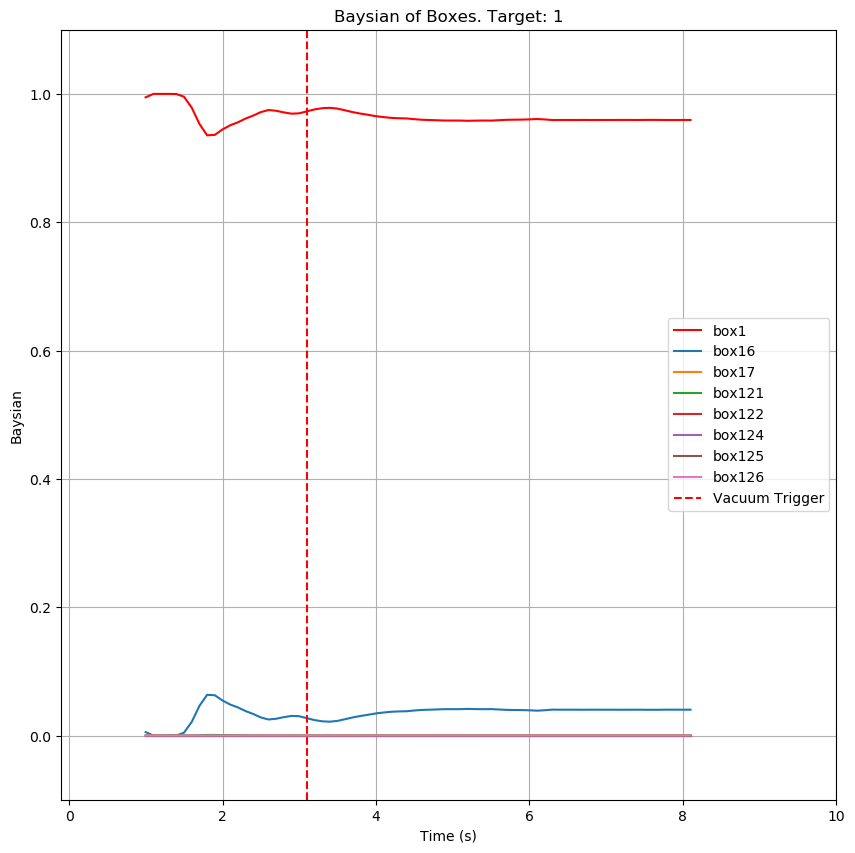

baysian0  baysian1      baysian2      baysian3      baysian4  \
10  0.994627  0.005363  1.263327e-19  9.783036e-06  1.000000e-10   
11  0.999980  0.000020  4.840370e-39  3.792984e-11  1.009145e-20   
12  0.999985  0.000015  1.698185e-38  1.195034e-11  1.007678e-20   
13  0.999972  0.000028  5.069965e-33  5.051561e-11  7.916588e-51   
14  0.999729  0.000271  8.520137e-23  8.682996e-09  1.688816e-65   
..       ...       ...           ...           ...           ...   
77  0.959424  0.040219  2.621671e-04  5.630738e-05  3.200119e-15   
78  0.959284  0.040358  2.621291e-04  5.629922e-05  3.199655e-15   
79  0.959281  0.040361  2.621283e-04  5.629904e-05  3.199645e-15   
80  0.959358  0.040285  2.621493e-04  5.630355e-05  3.199901e-15   
81  0.959319  0.040323  2.621387e-04  5.630127e-05  3.199772e-15   

        baysian5      baysian6      baysian7      baysian8  
10  1.000000e-10  2.606221e-24  3.896603e-19  1.000000e-10  
11  1.009145e-20  5.221770e-49  1.905729e-38  1.009145e-20  
12  1.007678e-20  9.763564e-50  1.028528e-38  1.007678e-20  
13  2.749941e-44  2.513463e-44  5.745164e-34  1.320487e-48  
14  1.618631e-54  4.225428e-32  3.533534e-24  5.373117e-61  
..           ...           ...           ...           ...  
77  3.539108e-11  7.399231e-09  3.879837e-05  7.977391e-13  
78  3.538595e-11  7.398158e-09  3.879274e-05  7.976234e-13  
79  3.538584e-11  7.398134e-09  3.879262e-05  7.976209e-13  
80  3.538867e-11  7.398727e-09  3.879572e-05  7.976847e-13  
81  3.538724e-11  7.398428e-09  3.879416e-05  7.976525e-13  

[72 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10          0.994627          0.005363      1.263327e-19          0.000010   
11          0.996271          0.003725      3.796725e-20          0.000004   
12          0.996080          0.003917      4.438680e-19          0.000003   
13          0.992876          0.007107      1.129673e-14          0.000016   
14          0.962985          0.036502      7.213170e-09          0.000513   
..               ...               ...               ...               ...   
77          0.809357          0.165840      1.337901e-02          0.006200   
78          0.809083          0.166123      1.337448e-02          0.006198   
79          0.809346          0.165851      1.337884e-02          0.006200   
80          0.809349          0.165848      1.337888e-02          0.006200   
81          0.809212          0.165989      1.337662e-02          0.006199   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      1.000000e-10      1.000000e-10      2.606221e-24      3.896603e-19   
11      1.000000e-10      1.000000e-10      1.985422e-25      4.846424e-20   
12      1.000000e-10      1.000000e-10      4.880154e-25      2.106070e-19   
13      7.829601e-41      2.719725e-34      5.093785e-20      2.697934e-15   
14      2.062885e-25      5.691873e-21      7.933456e-13      1.252594e-09   
..               ...               ...               ...               ...   
77      4.674315e-08      4.915660e-06      7.107685e-05      5.146851e-03   
78      4.672730e-08      4.913994e-06      7.105276e-05      5.145107e-03   
79      4.674254e-08      4.915596e-06      7.107592e-05      5.146784e-03   
80      4.674270e-08      4.915613e-06      7.107617e-05      5.146802e-03   
81      4.673478e-08      4.914780e-06      7.106412e-05      5.145930e-03   

    field.boxes8.pdf  
10      1.000000e-10  
11      1.000000e-10  
12      1.000000e-10  
13      1.305977e-38  
14      3.934802e-23  
..               ...  
77      7.380152e-07  
78      7.377651e-07  
79      7.380056e-07  
80      7.380082e-07  
81      7.378831e-07  

[72 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box1_data1.csv


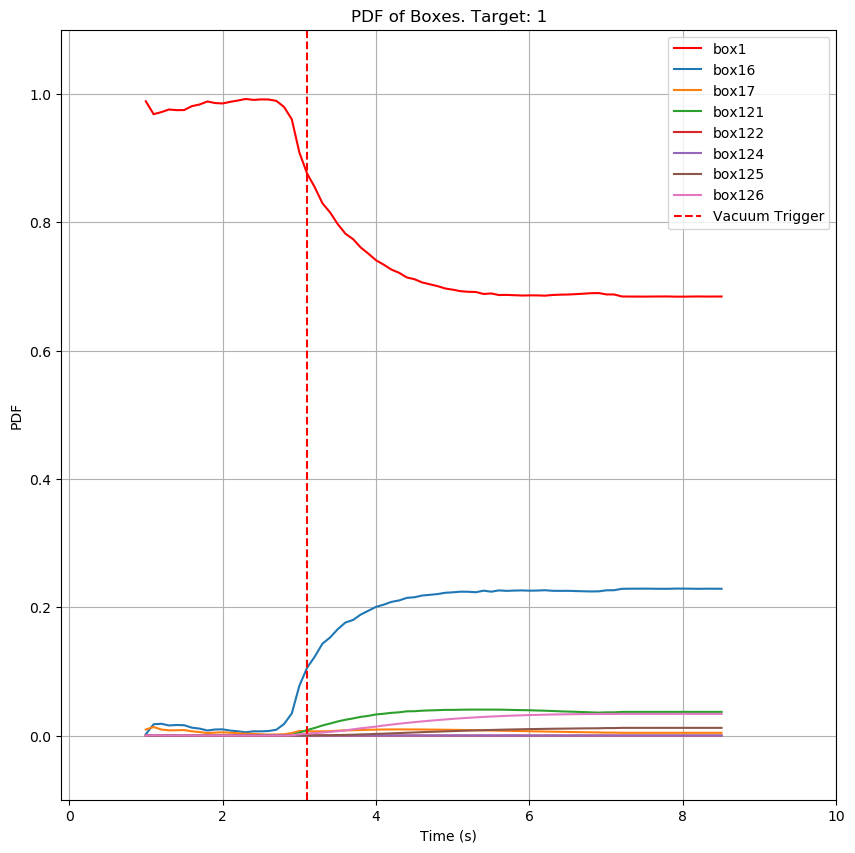

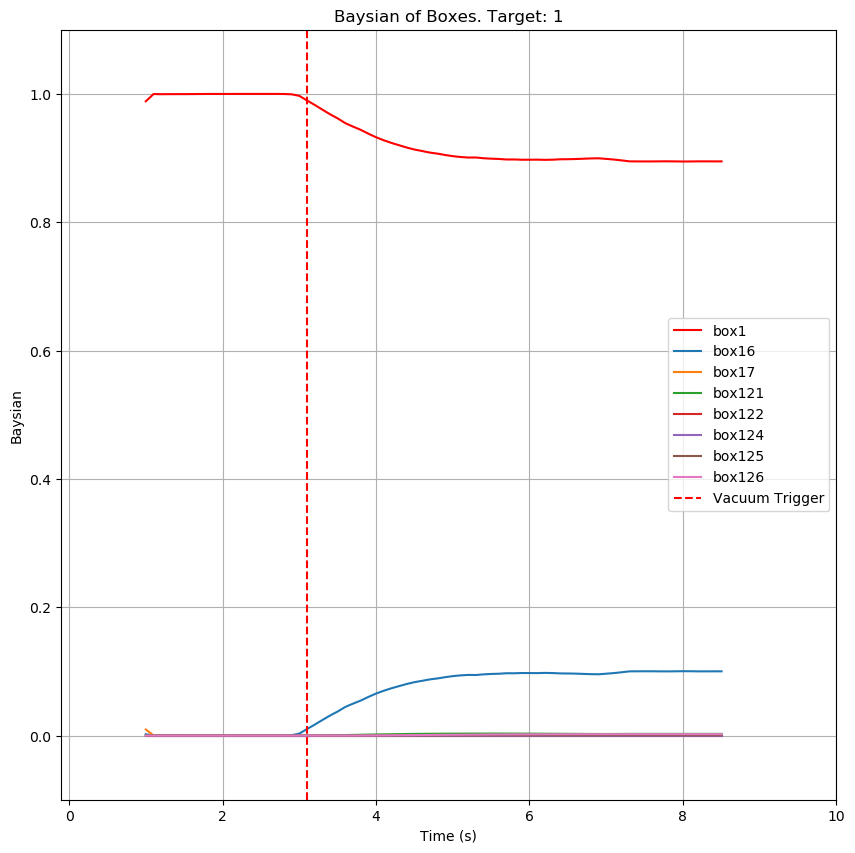

baysian0  baysian1  baysian2      baysian3      baysian4      baysian5  \
10  0.988460  0.002044  0.009453  3.631466e-06  9.613335e-12  7.852829e-08   
11  0.999832  0.000038  0.000131  1.174908e-09  4.489125e-20  1.437313e-13   
12  0.999525  0.000343  0.000132  1.050450e-07  1.268046e-17  1.731907e-12   
13  0.999616  0.000304  0.000080  7.996667e-08  3.438486e-18  5.058901e-13   
14  0.999657  0.000272  0.000071  6.821952e-08  2.290691e-18  3.933013e-13   
..       ...       ...       ...           ...           ...           ...   
81  0.894696  0.100215  0.000035  2.602215e-03  1.295365e-09  1.450202e-09   
82  0.894857  0.100052  0.000035  2.602684e-03  1.295599e-09  1.450464e-09   
83  0.894858  0.100051  0.000035  2.602687e-03  1.295600e-09  1.450465e-09   
84  0.894785  0.100124  0.000035  2.602476e-03  1.295495e-09  1.450348e-09   
85  0.894837  0.100073  0.000035  2.602626e-03  1.295570e-09  1.450431e-09   

        baysian6      baysian7      baysian8  
10  1.048526e-08  2.997139e-05  9.279856e-06  
11  2.781572e-14  1.335336e-08  1.548960e-10  
12  5.103598e-12  1.466123e-07  1.312336e-10  
13  2.404602e-12  8.381242e-08  3.731149e-11  
14  2.266741e-12  7.788662e-08  2.472566e-11  
..           ...           ...           ...  
81  2.754221e-04  2.177093e-03  3.408564e-16  
82  2.754718e-04  2.177486e-03  3.409180e-16  
83  2.754721e-04  2.177488e-03  3.409183e-16  
84  2.754498e-04  2.177311e-03  3.408907e-16  
85  2.754656e-04  2.177437e-03  3.409103e-16  

[76 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10          0.988460          0.002044          0.009453          0.000004   
11          0.968394          0.017610          0.013239          0.000310   
12          0.971623          0.018318          0.009406          0.000319   
13          0.975679          0.015734          0.008098          0.000238   
14          0.974653          0.016459          0.008306          0.000273   
..               ...               ...               ...               ...   
81          0.684134          0.228889          0.004276          0.036896   
82          0.684313          0.228688          0.004277          0.036905   
83          0.684136          0.228888          0.004276          0.036896   
84          0.684186          0.228831          0.004277          0.036898   
85          0.684226          0.228786          0.004277          0.036901   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      9.613335e-12      7.852829e-08      1.048526e-08          0.000030   
11      4.470663e-09      1.752305e-06      2.539776e-06          0.000427   
12      2.670050e-09      9.304030e-07      1.891635e-06          0.000324   
13      1.221291e-09      5.156517e-07      1.205528e-06          0.000246   
14      1.784239e-09      7.255624e-07      1.788672e-06          0.000302   
..               ...               ...               ...               ...   
81      2.603154e-05      2.754343e-05      1.200337e-02          0.033748   
82      2.603833e-05      2.755062e-05      1.200650e-02          0.033756   
83      2.603159e-05      2.754348e-05      1.200339e-02          0.033748   
84      2.603351e-05      2.754551e-05      1.200428e-02          0.033750   
85      2.603501e-05      2.754711e-05      1.200497e-02          0.033752   

    field.boxes8.pdf  
10      9.279856e-06  
11      1.598024e-05  
12      7.730682e-06  
13      4.577160e-06  
14      5.138751e-06  
..               ...  
81      1.335333e-08  
82      1.335681e-08  
83      1.335335e-08  
84      1.335434e-08  
85      1.335511e-08  

[76 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box1_data2.csv


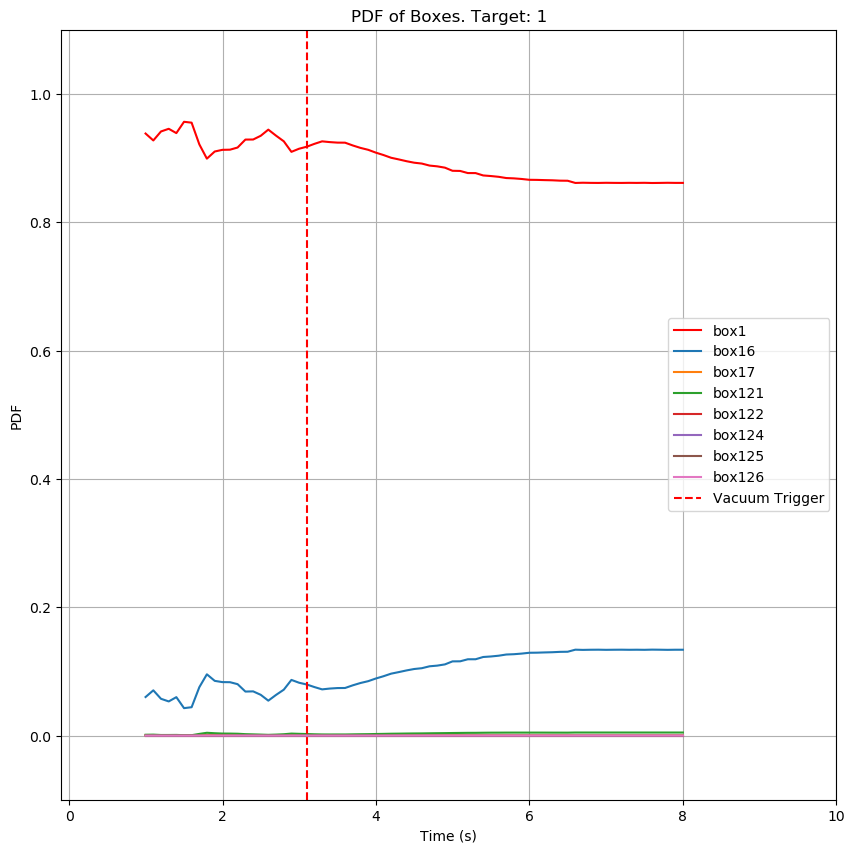

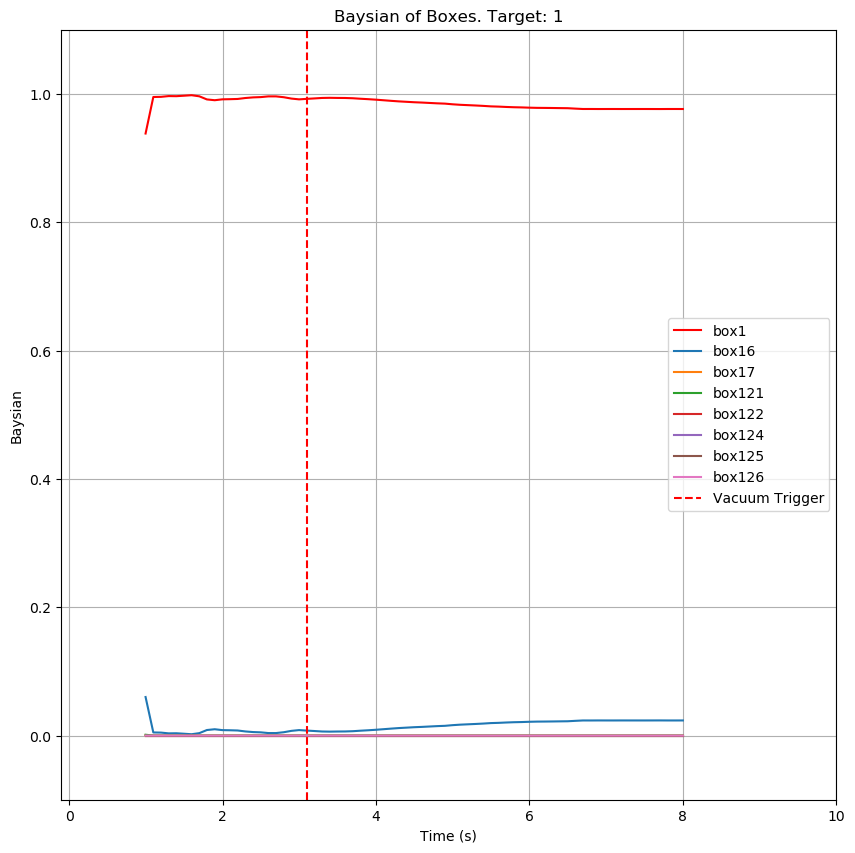

baysian0  baysian1      baysian2      baysian3      baysian4  \
10  0.938214  0.060052  4.579774e-04  1.263687e-03  6.762645e-17   
11  0.995158  0.004839  3.435064e-07  2.067804e-06  1.104486e-32   
12  0.995395  0.004603  2.859210e-07  1.429939e-06  1.252706e-33   
13  0.996587  0.003412  1.347292e-07  8.738383e-07  8.040382e-35   
14  0.996426  0.003573  9.667306e-08  9.847441e-07  1.907252e-34   
..       ...       ...           ...           ...           ...   
76  0.976419  0.023551  2.432459e-08  2.943425e-05  2.282837e-29   
77  0.976387  0.023584  2.432379e-08  2.943328e-05  2.282762e-29   
78  0.976451  0.023520  2.432539e-08  2.943521e-05  2.282911e-29   
79  0.976458  0.023513  2.432556e-08  2.943542e-05  2.282928e-29   
80  0.976426  0.023545  2.432476e-08  2.943445e-05  2.282852e-29   

        baysian5      baysian6      baysian7      baysian8  
10  4.179840e-12  7.141840e-09  1.160550e-05  2.188814e-11  
11  3.695477e-23  9.434817e-17  2.352647e-10  1.344686e-21  
12  9.663076e-24  3.330256e-17  1.452366e-10  5.181855e-22  
13  1.261114e-24  7.793387e-18  5.165130e-11  4.243140e-23  
14  1.185493e-24  1.018019e-17  4.846317e-11  1.777515e-23  
..           ...           ...           ...           ...  
76  5.170813e-23  2.605074e-13  1.161175e-08  1.192419e-28  
77  5.170642e-23  2.604988e-13  1.161137e-08  1.192380e-28  
78  5.170981e-23  2.605158e-13  1.161213e-08  1.192458e-28  
79  5.171017e-23  2.605177e-13  1.161221e-08  1.192467e-28  
80  5.170847e-23  2.605091e-13  1.161183e-08  1.192427e-28  

[71 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10          0.938214          0.060052          0.000458          0.001264   
11          0.927435          0.070461          0.000656          0.001431   
12          0.941428          0.057306          0.000382          0.000877   
13          0.945602          0.053186          0.000315          0.000890   
14          0.938878          0.059856          0.000274          0.000985   
..               ...               ...               ...               ...   
76          0.861136          0.133906          0.000136          0.004728   
77          0.861260          0.133781          0.000136          0.004729   
78          0.861456          0.133584          0.000136          0.004730   
79          0.861294          0.133746          0.000136          0.004729   
80          0.861295          0.133746          0.000136          0.004729   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      6.762645e-17      4.179840e-12      7.141840e-09          0.000012   
11      1.428029e-16      7.730437e-12      1.155092e-08          0.000018   
12      7.694618e-18      1.096444e-12      2.528925e-09          0.000007   
13      9.334048e-18      1.027421e-12      2.752775e-09          0.000006   
14      1.820584e-17      1.028072e-12      3.295019e-09          0.000007   
..               ...               ...               ...               ...   
76      4.163810e-15      6.266613e-12      4.447986e-07          0.000094   
77      4.164410e-15      6.267515e-12      4.448627e-07          0.000094   
78      4.165361e-15      6.268946e-12      4.449643e-07          0.000094   
79      4.164577e-15      6.267767e-12      4.448806e-07          0.000094   
80      4.164580e-15      6.267771e-12      4.448809e-07          0.000094   

    field.boxes8.pdf  
10      2.188814e-11  
11      5.371622e-11  
12      8.461643e-12  
13      4.479330e-12  
14      3.535680e-12  
..               ...  
76      9.516296e-15  
77      9.517667e-15  
78      9.519840e-15  
79      9.518050e-15  
80      9.518056e-15  

[71 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box1_data3.csv


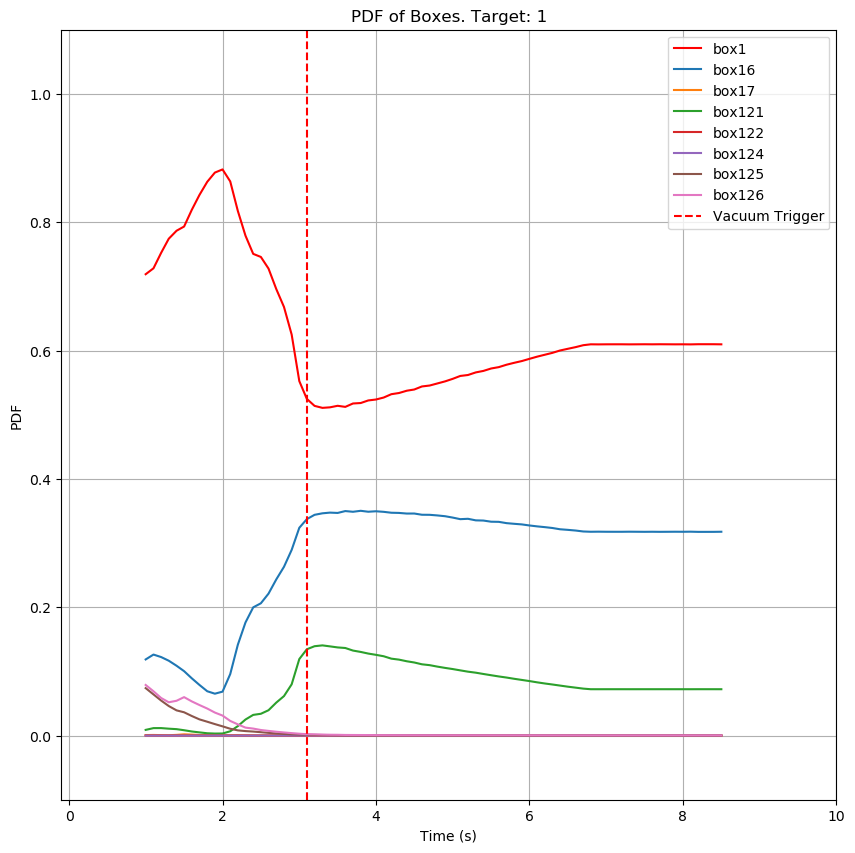

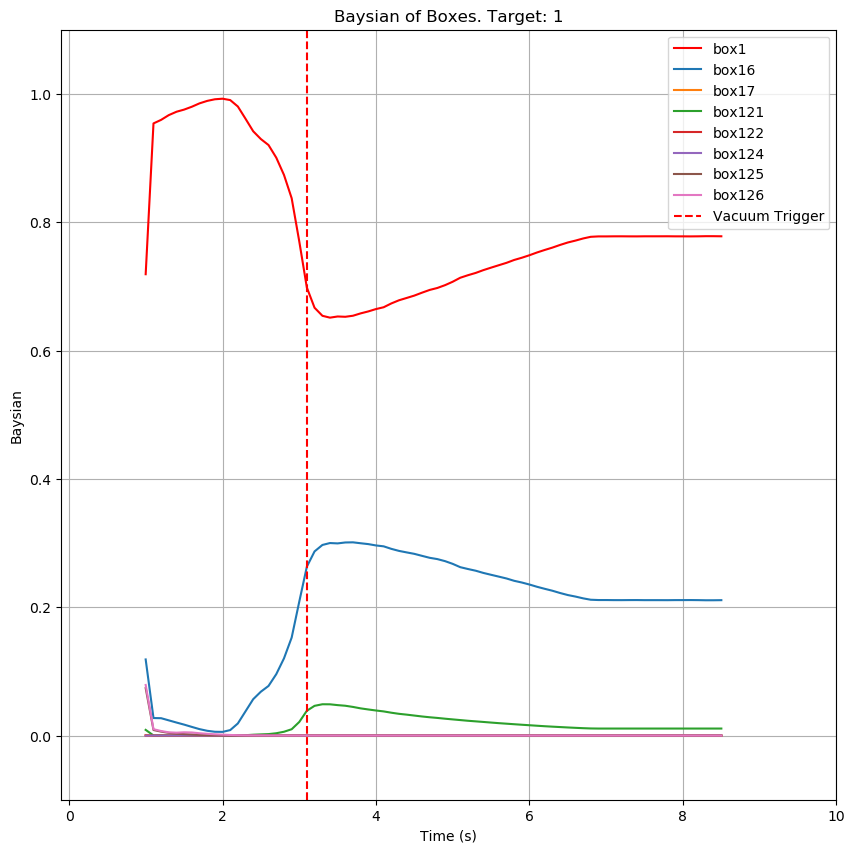

baysian0  baysian1      baysian2  baysian3      baysian4      baysian5  \
10  0.718958  0.118617  7.820002e-04  0.008845  3.414277e-05  4.100389e-06   
11  0.953987  0.027280  1.295460e-06  0.000187  1.099357e-09  1.606252e-11   
12  0.959509  0.027051  1.125746e-06  0.000236  2.316165e-10  4.198051e-12   
13  0.966894  0.023690  6.082944e-07  0.000207  5.402415e-11  9.924539e-13   
14  0.972213  0.020248  8.679493e-07  0.000171  3.420492e-11  8.211376e-13   
..       ...       ...           ...       ...           ...           ...   
81  0.777915  0.211173  9.812971e-13  0.010912  2.988829e-26  2.998613e-26   
82  0.778028  0.211059  9.814386e-13  0.010913  2.989259e-26  2.999045e-26   
83  0.778245  0.210839  9.817125e-13  0.010916  2.990094e-26  2.999882e-26   
84  0.778227  0.210857  9.816903e-13  0.010916  2.990026e-26  2.999814e-26   
85  0.778083  0.211003  9.815081e-13  0.010914  2.989471e-26  2.999258e-26   

        baysian6      baysian7      baysian8  
10  7.391572e-02  7.884454e-02  1.680299e-12  
11  8.633424e-03  9.910778e-03  4.212674e-24  
12  6.127777e-03  7.074784e-03  1.283784e-24  
13  4.167734e-03  5.040531e-03  1.289573e-25  
14  2.880741e-03  4.486949e-03  1.620013e-25  
..           ...           ...           ...  
81  5.467248e-08  1.870164e-07  5.183379e-43  
82  5.468036e-08  1.870433e-07  5.184126e-43  
83  5.469563e-08  1.870955e-07  5.185573e-43  
84  5.469439e-08  1.870913e-07  5.185456e-43  
85  5.468424e-08  1.870566e-07  5.184493e-43  

[76 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10          0.718958          0.118617      7.820002e-04          0.008845   
11          0.728187          0.126214      9.091194e-04          0.011588   
12          0.752188          0.122346      7.068704e-04          0.011632   
13          0.774272          0.116631      5.183405e-04          0.010713   
14          0.786741          0.108774      1.049163e-03          0.009981   
..               ...               ...               ...               ...   
81          0.609614          0.317725      6.846824e-07          0.072200   
82          0.609874          0.317434      6.849745e-07          0.072231   
83          0.609870          0.317438      6.849701e-07          0.072230   
84          0.609854          0.317457      6.849512e-07          0.072228   
85          0.609700          0.317629      6.847788e-07          0.072210   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      3.414277e-05      4.100389e-06          0.073916          0.078845   
11      1.767029e-05      2.149772e-06          0.064099          0.068983   
12      7.482489e-06      1.114745e-06          0.054572          0.058546   
13      4.348936e-06      5.362607e-07          0.046001          0.051859   
14      4.927986e-06      9.594093e-07          0.039237          0.054211   
..               ...               ...               ...               ...   
81      1.194922e-13      1.196876e-13          0.000162          0.000299   
82      1.195431e-13      1.197386e-13          0.000162          0.000299   
83      1.195424e-13      1.197379e-13          0.000162          0.000299   
84      1.195391e-13      1.197346e-13          0.000162          0.000299   
85      1.195090e-13      1.197044e-13          0.000162          0.000299   

    field.boxes8.pdf  
10      1.680299e-12  
11      1.375863e-12  
12      5.326440e-13  
13      1.458310e-13  
14      6.960371e-13  
..               ...  
81      4.976172e-22  
82      4.978295e-22  
83      4.978263e-22  
84      4.978125e-22  
85      4.976872e-22  

[76 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
/home/workspace/src/log_file/post_processed/box1_data4.csv


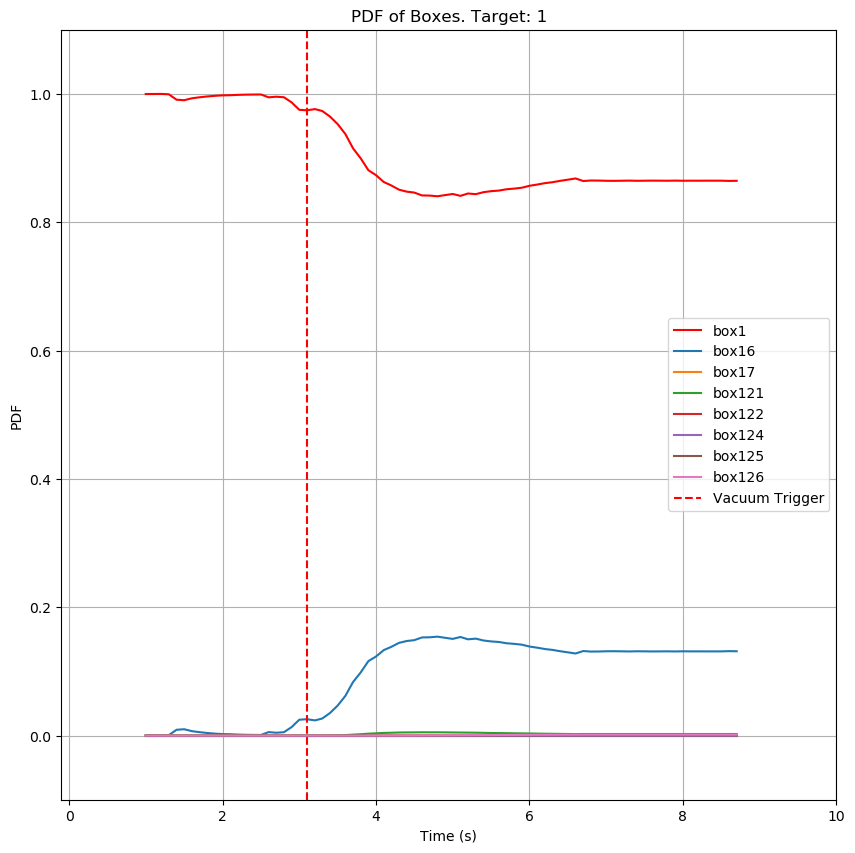

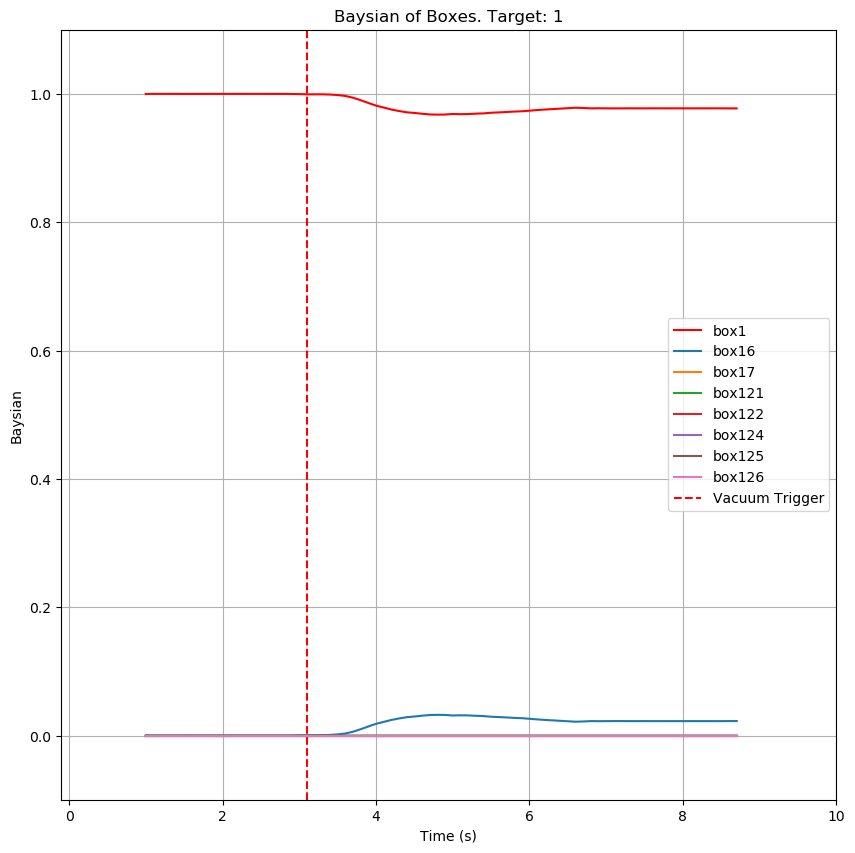

baysian0      baysian1      baysian2      baysian3      baysian4  \
10  0.999777  2.233724e-04  4.714648e-09  1.069659e-08  1.412108e-34   
11  1.000000  3.756279e-08  8.557645e-18  2.591795e-17  2.694009e-71   
12  1.000000  9.773759e-09  6.513984e-19  8.189021e-19  4.814952e-77   
13  1.000000  3.539540e-08  8.328591e-19  2.433524e-17  4.314801e-73   
14  0.999994  5.536350e-06  2.654847e-16  2.059132e-12  3.998588e-57   
..       ...           ...           ...           ...           ...   
83  0.977488  2.250193e-02  5.770014e-12  7.624762e-06  1.249042e-20   
84  0.977501  2.248921e-02  5.770089e-12  7.624861e-06  1.249059e-20   
85  0.977496  2.249368e-02  5.770062e-12  7.624826e-06  1.249053e-20   
86  0.977425  2.256484e-02  5.769642e-12  7.624271e-06  1.248962e-20   
87  0.977394  2.259605e-02  5.769458e-12  7.624027e-06  1.248922e-20   

        baysian5      baysian6      baysian7      baysian8  
10  2.560528e-25  2.863707e-19  2.185626e-12  5.275636e-24  
11  1.124187e-51  2.205716e-39  5.468022e-25  1.091443e-48  
12  1.159833e-55  9.026461e-43  5.212682e-27  6.160717e-52  
13  4.061604e-54  2.164398e-40  8.339674e-26  9.018947e-52  
14  6.371614e-44  2.323041e-30  3.650891e-20  3.512779e-45  
..           ...           ...           ...           ...  
83  1.117911e-21  1.022849e-07  2.520329e-06  3.579413e-39  
84  1.117925e-21  1.022862e-07  2.520362e-06  3.579460e-39  
85  1.117920e-21  1.022857e-07  2.520350e-06  3.579443e-39  
86  1.117839e-21  1.022783e-07  2.520167e-06  3.579183e-39  
87  1.117803e-21  1.022750e-07  2.520086e-06  3.579069e-39  

[78 rows x 9 columns]

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
10          0.999777          0.000223      4.714648e-09      1.069659e-08   
11          0.999832          0.000168      1.814408e-09      2.422062e-09   
12          0.999942          0.000058      3.589331e-10      3.380247e-10   
13          0.999391          0.000608      2.318827e-09      7.194451e-08   
14          0.990961          0.009011      1.133876e-07      2.834530e-05   
..               ...               ...               ...               ...   
83          0.864748          0.131166      2.100983e-06      2.415167e-03   
84          0.864750          0.131164      2.100987e-06      2.415172e-03   
85          0.864725          0.131189      2.100927e-06      2.415103e-03   
86          0.864383          0.131533      2.100095e-06      2.414147e-03   
87          0.864565          0.131351      2.100537e-06      2.414655e-03   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
10      1.412108e-34      2.560528e-25      2.863707e-19      2.185626e-12   
11      1.907046e-37      4.388733e-27      7.699296e-21      2.500831e-13   
12      2.524252e-40      2.642154e-29      1.172110e-22      2.083908e-14   
13      1.708199e-33      1.536207e-25      1.845352e-18      3.999271e-12   
14      2.318263e-24      4.107657e-19      1.246729e-12      9.040918e-09   
..               ...               ...               ...               ...   
83      9.775133e-11      2.924406e-11      2.797305e-04      1.388554e-03   
84      9.775152e-11      2.924412e-11      2.797310e-04      1.388556e-03   
85      9.774872e-11      2.924328e-11      2.797230e-04      1.388517e-03   
86      9.771004e-11      2.923171e-11      2.796123e-04      1.387967e-03   
87      9.773058e-11      2.923785e-11      2.796711e-04      1.388259e-03   

    field.boxes8.pdf  
10      5.275636e-24  
11      2.068026e-25  
12      2.978358e-27  
13      3.026142e-25  
14      1.149624e-20  
..               ...  
83      5.232870e-20  
84      5.232881e-20  
85      5.232731e-20  
86      5.230660e-20  
87      5.231760e-20  

[78 rows x 9 columns]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [8]:
root_dir = "/home/workspace/src/log_file/post_processed"

# 데이터 로드
files = sorted(os.listdir(root_dir))

small_value = 1e-10


# 데이터프레임 생성
for i, file in enumerate(files):
    data = pd.read_csv(root_dir + "/" + file)

    data = data.replace(0.0, small_value)

    data = data[10:]

    print(root_dir + "/" + file)

    target_id = data["desired_box"].iloc[0]

    # PDF 확률 보간
    for i in range(9):
        data[f"field.boxes{i}.pdf"] = data[f"field.boxes{i}.pdf"].fillna(method="ffill")

    # 새로운 컬럼 생성
    for i in range(9):
        # 이전 인덱스 값과 현재 인덱스 값 계산
        prev_values = data[f"field.boxes{i}.pdf"].shift(
            1, fill_value=(1.0 / 9.0)
        )  # 첫 번째 행의 이전 값은 1로 채움
        current_values = data[f"field.boxes{i}.pdf"]

        # 정규화 계산
        product = prev_values * current_values
        normalization = product.sum()

        # 새로운 컬럼 생성
        data[f"baysian{i}"] = product  # 0으로 나누는 경우 처리

    # 정규화 수행 (각 필드 값을 그 행의 모든 .pdf 값의 합으로 나눔)
    baysian_columns = [f"baysian{i}" for i in range(9)]

    # 존재하는 필드만 필터링
    baysian_columns = [col for col in baysian_columns if col in data.columns]

    df_sum = data[baysian_columns].sum(axis=1)  # 각 행의 .pdf 값 합

    for col in baysian_columns:
        data[col] = data[col] / df_sum

    plot = True

    if plot:

        # 그래프 그리기
        plt.figure(figsize=(10, 10))

        # 각 박스의 PDF 그래프 그리기
        for i in range(len(desired_box_values)):
            box_id = data[f"field.boxes{i}.id"].iloc[0]
            plt.plot(
                data["%time"].to_numpy(),
                data[f"field.boxes{i}.pdf"].to_numpy(),
                label=f"box{box_id}",
                c="r" if box_id == target_id else None,
            )

        # 수직선 추가
        plt.axvline(
            x=trigger_times[-1], color="red", linestyle="--", label="Vacuum Trigger"
        )

        plt.legend()

        plt.xlim(-0.1, 10.0)
        plt.ylim(-0.1, 1.1)

        plt.xlabel("Time (s)")
        plt.ylabel("PDF")

        plt.title(f"PDF of Boxes. Target: {target_id}")

        plt.grid()
        plt.show()

        # 그래프 그리기
        plt.figure(figsize=(10, 10))

        # 각 박스의 베이지안 그래프 그리기
        for i in range(len(desired_box_values)):
            box_id = data[f"field.boxes{i}.id"].iloc[0]
            plt.plot(
                data["%time"].to_numpy(),
                data[f"baysian{i}"].to_numpy(),
                label=f"box{box_id}",
                c="r" if box_id == target_id else None,
            )

        # 수직선 추가
        plt.axvline(
            x=trigger_times[-1], color="red", linestyle="--", label="Vacuum Trigger"
        )

        plt.legend()

        plt.xlim(-0.1, 10.0)
        plt.ylim(-0.1, 1.1)

        plt.xlabel("Time (s)")
        plt.ylabel("Baysian")

        plt.title(f"Baysian of Boxes. Target: {target_id}")

        plt.grid()
        plt.show()

        baysian_columns = [f"baysian{i}" for i in range(9)]
        pdf_columns = [f"field.boxes{i}.pdf" for i in range(9)]

        display(data[baysian_columns])
        display(data[pdf_columns])

        print("@" * 100)

    # break

In [7]:
data = pd.read_csv("/home/workspace/src/log_file/post_processed/box121_data2.csv")

pdf_columns = [f"field.boxes{i}.pdf" for i in range(9)]

data = data[pdf_columns]

data

field.boxes0.pdf  field.boxes1.pdf  field.boxes2.pdf  field.boxes3.pdf  \
0           0.111111      1.111111e-01      1.111111e-01          0.111111   
1                NaN               NaN               NaN               NaN   
2           0.000000      9.950228e-24      2.323446e-10          0.984940   
3           0.000000      1.445252e-34      1.306972e-12          0.000177   
4           0.000000      0.000000e+00      4.145745e-17          0.000015   
..               ...               ...               ...               ...   
73          0.000089      7.628099e-02      5.419636e-05          0.915739   
74          0.000089      7.628099e-02      5.419636e-05          0.915739   
75          0.000089      7.628099e-02      5.419636e-05          0.915739   
76          0.000089      7.628099e-02      5.419636e-05          0.915739   
77          0.000089      7.628099e-02      5.419636e-05          0.915739   

    field.boxes4.pdf  field.boxes5.pdf  field.boxes6.pdf  field.boxes7.pdf  \
0       1.111111e-01      1.111111e-01      1.111111e-01          0.111111   
1                NaN               NaN               NaN               NaN   
2       0.000000e+00      0.000000e+00      1.747249e-12          0.015060   
3       0.000000e+00      0.000000e+00      1.083884e-07          0.999823   
4       0.000000e+00      0.000000e+00      1.178098e-06          0.999984   
..               ...               ...               ...               ...   
73      1.385570e-11      3.168335e-09      2.426166e-03          0.005411   
74      1.385570e-11      3.168335e-09      2.426166e-03          0.005411   
75      1.385570e-11      3.168335e-09      2.426166e-03          0.005411   
76      1.385570e-11      3.168335e-09      2.426166e-03          0.005411   
77      1.385570e-11      3.168335e-09      2.426166e-03          0.005411   

    field.boxes8.pdf  
0       1.111111e-01  
1                NaN  
2       0.000000e+00  
3       0.000000e+00  
4       0.000000e+00  
..               ...  
73      7.084054e-13  
74      7.084054e-13  
75      7.084054e-13  
76      7.084054e-13  
77      7.084054e-13  

[78 rows x 9 columns]